## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

##### Perform class balancing with :
- With Skew Treatment and Without Balancing(`NO BALANCE`)
- With Skew Treatment and Balancing Via Random Over sampelling(`RANDOM OVERSAMPLING`)
- With Balancing Via SMOTE(`SMOTE`)
- With Balancing Via ADASYN(`ADASYN`)

## NO BALANCE

In [1]:
# !pip install -U pip


# !pip install hyperopt

# !pip install xgboost

# !pip install hyperopt

# !pip install imblearn

# !pip install --upgrade seaborn

# !pip install -U scikit-learn


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os

import warnings
warnings.filterwarnings('ignore')

In [3]:
import sklearn
import math

from scipy.stats import shapiro
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler


from sklearn.model_selection import train_test_split

In [4]:
np.linspace(0.1, 1.0, 10, endpoint=True)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

## Exploratory data analysis

In [5]:
df = pd.read_csv('creditcard.csv')
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [6]:
#observe the different feature type present in the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe().T

count          mean           std         min           25%  \
Time    284807.0  9.481386e+04  47488.145955    0.000000  54201.500000   
V1      284807.0  3.919560e-15      1.958696  -56.407510     -0.920373   
V2      284807.0  5.688174e-16      1.651309  -72.715728     -0.598550   
V3      284807.0 -8.769071e-15      1.516255  -48.325589     -0.890365   
V4      284807.0  2.782312e-15      1.415869   -5.683171     -0.848640   
V5      284807.0 -1.552563e-15      1.380247 -113.743307     -0.691597   
V6      284807.0  2.010663e-15      1.332271  -26.160506     -0.768296   
V7      284807.0 -1.694249e-15      1.237094  -43.557242     -0.554076   
V8      284807.0 -1.927028e-16      1.194353  -73.216718     -0.208630   
V9      284807.0 -3.137024e-15      1.098632  -13.434066     -0.643098   
V10     284807.0  1.768627e-15      1.088850  -24.588262     -0.535426   
V11     284807.0  9.170318e-16      1.020713   -4.797473     -0.762494   
V12     284807.0 -1.810658e-15      0.999201  -18.683715     -0.405571   
V13     284807.0  1.693438e-15      0.995274   -5.791881     -0.648539   
V14     284807.0  1.479045e-15      0.958596  -19.214325     -0.425574   
V15     284807.0  3.482336e-15      0.915316   -4.498945     -0.582884   
V16     284807.0  1.392007e-15      0.876253  -14.129855     -0.468037   
V17     284807.0 -7.528491e-16      0.849337  -25.162799     -0.483748   
V18     284807.0  4.328772e-16      0.838176   -9.498746     -0.498850   
V19     284807.0  9.049732e-16      0.814041   -7.213527     -0.456299   
V20     284807.0  5.085503e-16      0.770925  -54.497720     -0.211721   
V21     284807.0  1.537294e-16      0.734524  -34.830382     -0.228395   
V22     284807.0  7.959909e-16      0.725702  -10.933144     -0.542350   
V23     284807.0  5.367590e-16      0.624460  -44.807735     -0.161846   
V24     284807.0  4.458112e-15      0.605647   -2.836627     -0.354586   
V25     284807.0  1.453003e-15      0.521278  -10.295397     -0.317145   
V26     284807.0  1.699104e-15      0.482227   -2.604551     -0.326984   
V27     284807.0 -3.660161e-16      0.403632  -22.565679     -0.070840   
V28     284807.0 -1.206049e-16      0.330083  -15.430084     -0.052960   
Amount  284807.0  8.834962e+01    250.120109    0.000000      5.600000   
Class   284807.0  1.727486e-03      0.041527    0.000000      0.000000   

                 50%            75%            max  
Time    84692.000000  139320.500000  172792.000000  
V1          0.018109       1.315642       2.454930  
V2          0.065486       0.803724      22.057729  
V3          0.179846       1.027196       9.382558  
V4         -0.019847       0.743341      16.875344  
V5         -0.054336       0.611926      34.801666  
V6         -0.274187       0.398565      73.301626  
V7          0.040103       0.570436     120.589494  
V8          0.022358       0.327346      20.007208  
V9         -0.051429       0.597139      15.594995  
V10        -0.092917       0.453923      23.745136  
V11        -0.032757       0.739593      12.018913  
V12         0.140033       0.618238       7.848392  
V13        -0.013568       0.662505       7.126883  
V14         0.050601       0.493150      10.526766  
V15         0.048072       0.648821       8.877742  
V16         0.066413       0.523296      17.315112  
V17        -0.065676       0.399675       9.253526  
V18        -0.003636       0.500807       5.041069  
V19         0.003735       0.458949       5.591971  
V20        -0.062481       0.133041      39.420904  
V21        -0.029450       0.186377      27.202839  
V22         0.006782       0.528554      10.503090  
V23        -0.011193       0.147642      22.528412  
V24         0.040976       0.439527       4.584549  
V25         0.016594       0.350716       7.519589  
V26        -0.052139       0.240952       3.517346  
V27         0.001342       0.091045      31.612198  
V28         0.011244       0.078280      33.847808  
Amount     22.000000      77.165000   25691.160000  

### Amount==0

In [8]:
df[(df.Amount==0)&(df.Class==1)].shape

(27, 31)

In [9]:
df.shape

(284807, 31)

In [10]:
df[~((df.Amount==0)&(df.Class==1))].shape

(284780, 31)

`Observation:-There are 31 fraud cases with 0 transcation value. There can be various reasons for this like may be this was done to collect card information.`<br> `we will be considering these cases as frauds as reported by customer`

Here we will observe the distribution of our classes

In [11]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print('normal_share:',normal_share)
print('fraud_share:',fraud_share)

normal_share: 99.82725143693798
fraud_share: 0.1727485630620034


In [12]:
class_lst=['Non-Fraudulent', 'Fraudulent']
share_lst=[normal_share,fraud_share]
col_names=['Class','Percent']
df_percent=pd.DataFrame(data=list(zip(class_lst,share_lst)),columns=col_names)


normal_count=df[df.Class==0]['Class'].count()
fraud_count=df[df.Class==1]['Class'].count()
class_lst=['Non-Fraudulent', 'Fraudulent']
share_lst=[normal_count,fraud_count]
col_names=['Class','Count']

df_count=pd.DataFrame(data=list(zip(class_lst,share_lst)),columns=col_names)

In [13]:
df_percent

Class    Percent
0  Non-Fraudulent  99.827251
1      Fraudulent   0.172749

In [14]:
df_count

Class   Count
0  Non-Fraudulent  284315
1      Fraudulent     492

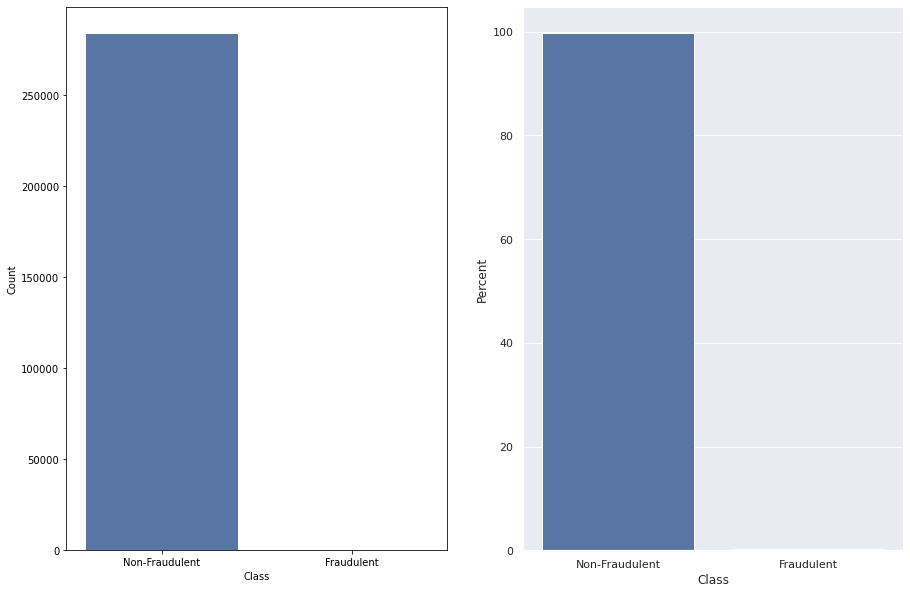

In [15]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
sns.set(style="darkgrid")
sns.barplot(x="Class",y='Count', data=df_count)

plt.subplot(1,2,2)
sns.set(style="darkgrid")
sns.barplot(x="Class",y='Percent', data=df_percent)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)

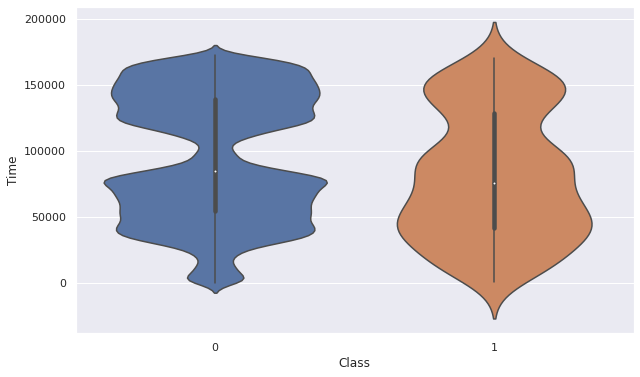

In [16]:
# Create a scatter plot to observe the distribution of classes with time
plt.figure(figsize=(10,6))

sns.set(style="darkgrid")
sns.violinplot(y = 'Time', x = 'Class', data = df)

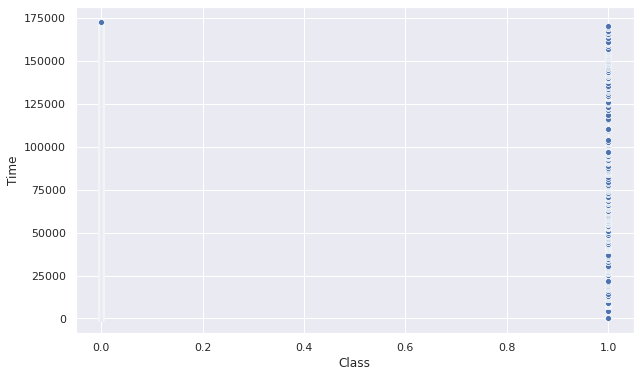

In [17]:
# Create a scatter plot to observe the distribution of classes with time
plt.figure(figsize=(10,6))

sns.set(style="darkgrid")
sns.scatterplot(y = 'Time', x = 'Class', data = df)

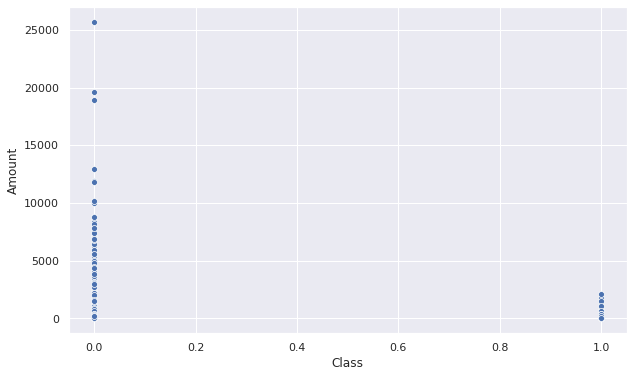

In [18]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.figure(figsize=(10,6))

sns.set(style="darkgrid")
sns.scatterplot(y = 'Amount', x = 'Class', data = df)

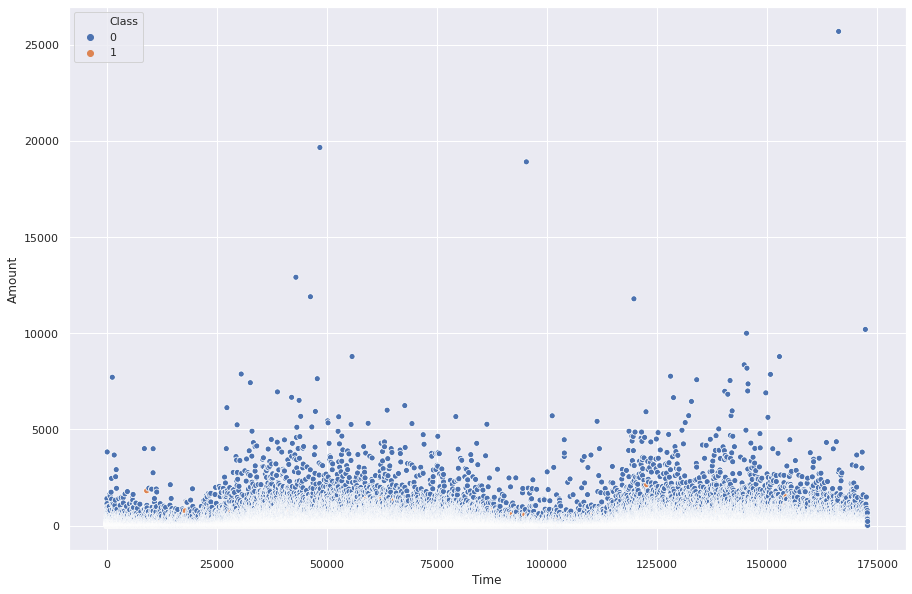

In [19]:
plt.figure(figsize=(15,10))

sns.set(style="darkgrid")
sns.scatterplot(y = 'Amount', x = 'Time',hue='Class', data = df)

In [20]:
# Drop unnecessary columns

#as the time provided is a relative column so its better to drop it
main_df=df.drop(['Time'],axis=1)

### Splitting the data into train & test data

In [21]:
y= main_df['Class']#class variable
X=main_df.drop(['Class'],axis=1)

In [22]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=100)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [23]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


### Plotting the distribution of a variable

In [24]:
# plot the histogram of a variable from the dataset to see the skewness

In [25]:
X_train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

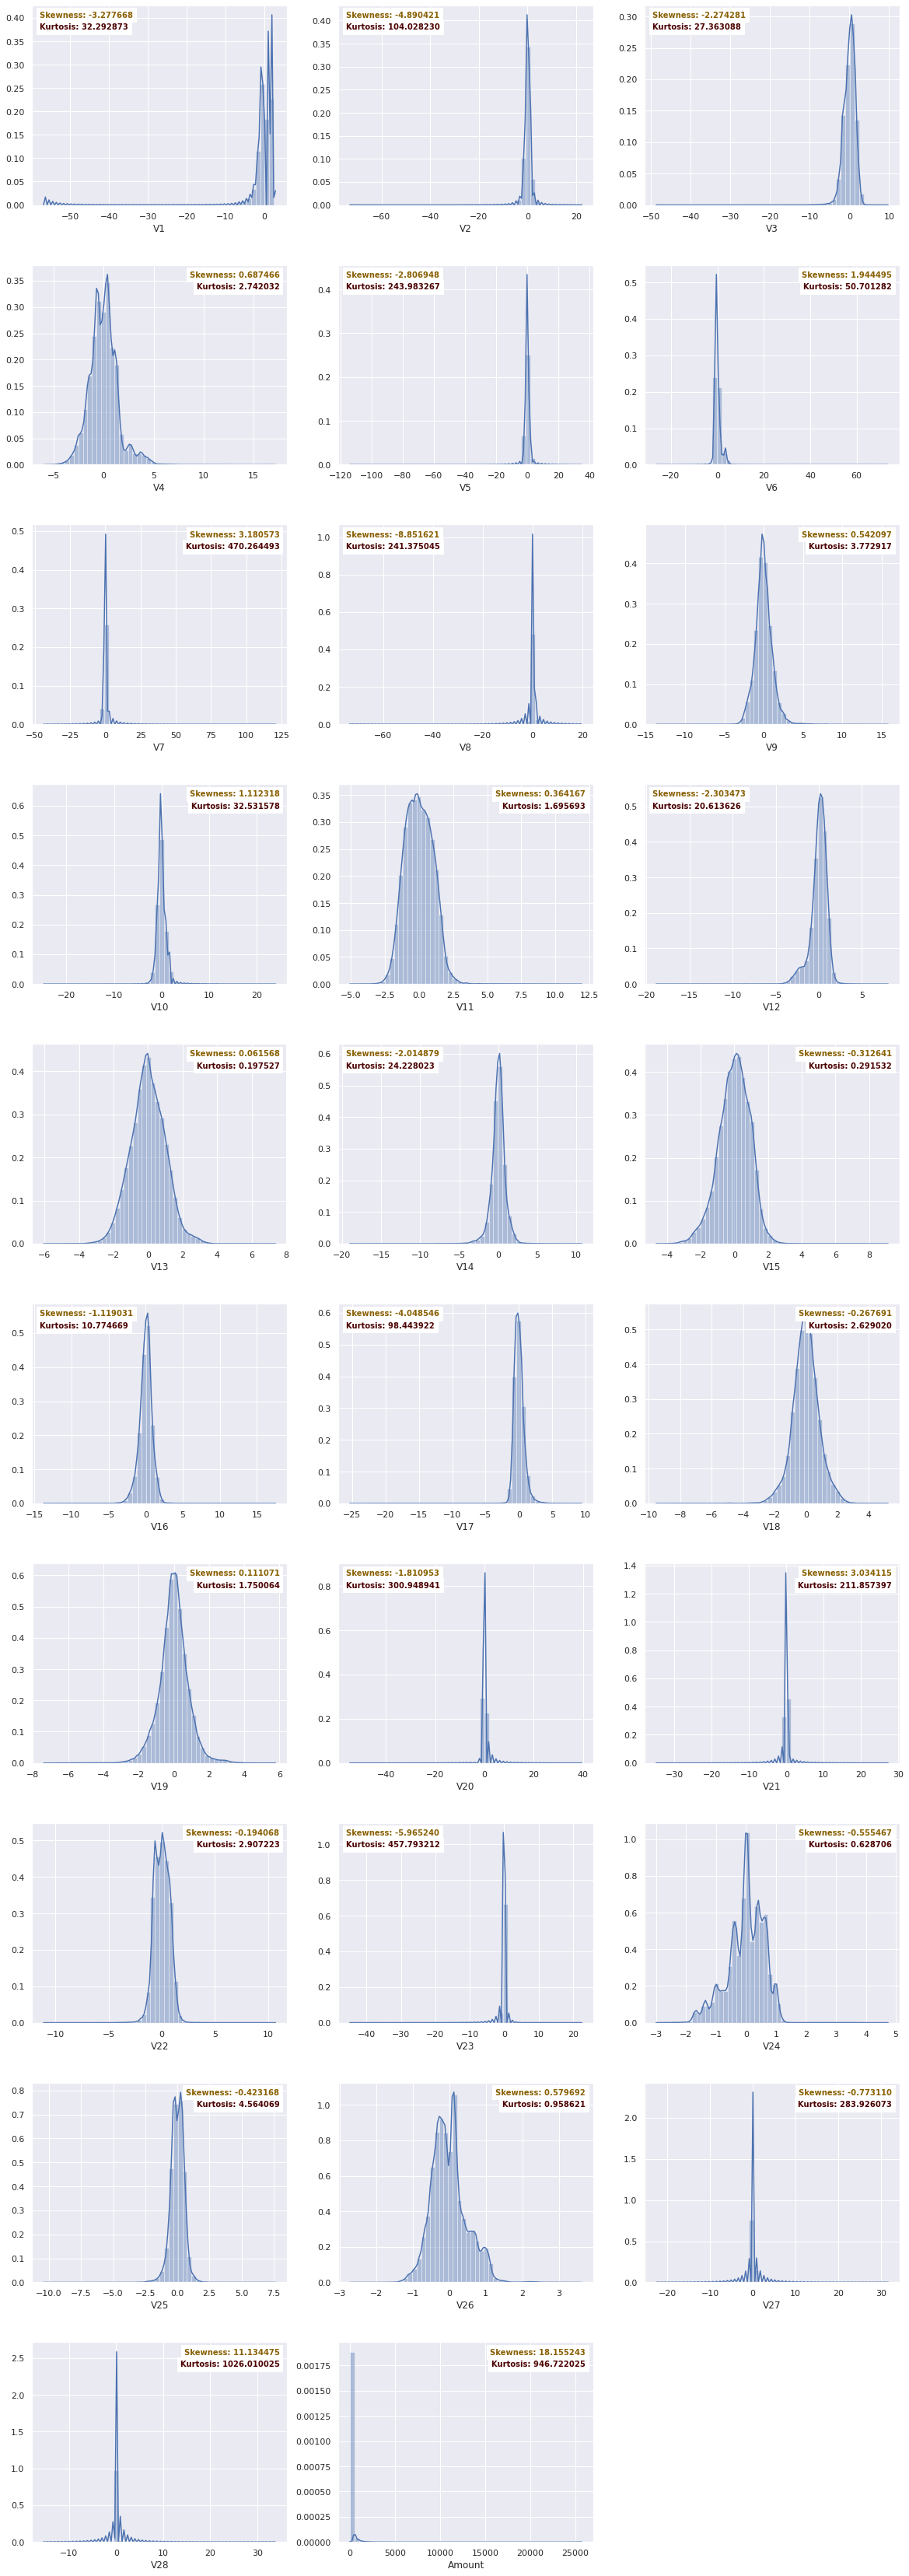

In [26]:
#inputs for subplot

only_vars=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

col_list=only_vars


#targetcol='Churn_Tag'
plot_df=X_train
numplots_eachrow=3
plot_data=plot_df[col_list]

# num plot calculations
numof_plots=[x+1 for x in range(0,len(col_list))]
col_rows=int(len(col_list)/numplots_eachrow)+1 if (len(col_list) % numplots_eachrow)!=0 else int(len(col_list)/numplots_eachrow)

#plot
plt.show()
ht=(len(numof_plots)%numplots_eachrow)+1
xfig=min(8*numplots_eachrow,15)
yfig=min(ht*8,15)

plt.figure(figsize=(20,60))
#f, axes = plt.subplots(col_rows,numplots_eachrow, sharex=True)

for i in numof_plots:
    numof_rows=col_rows
    numplots_echrow=numplots_eachrow
    subplot_num=i
    plt.subplot(numof_rows,numplots_echrow,subplot_num)
    g=sns.distplot(plot_df[col_list[i-1]])
    ax=g.axes
    check_val=plot_data.iloc[:,i-1].skew()

    if check_val<-1:
        ha='left'
        xval=0.03
    else:
        ha='right'
        xval=0.97

    stat, p = shapiro(plot_data.iloc[:,i-1])
    #print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.20
    if p > alpha:
          #print('Sample looks Gaussian (fail to reject H0)')
        gauss_var='Gaussian'
    else:
        #print('Sample does not look Gaussian (reject H0)')
        gauss_var='NOT Gaussian'

    ax.text(x=xval, y=0.97, transform=ax.transAxes, s="Skewness: %f" % plot_data.iloc[:,i-1].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment=ha,\
        backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=xval, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % plot_data.iloc[:,i-1].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment=ha,\
        backgroundcolor='white', color='xkcd:dried blood')
    # ax.text(x=xval, y=0.85, transform=ax.transAxes, s=gauss_var,\
    #     fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment=ha,\
    #     backgroundcolor='white', color='xkcd:poo brown')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [27]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

## Skewness Fix

In [28]:
# Using PowerTransformer to fix skewness, 
# we will be applying it to every variable as this will get applied if there is any skewness

pt = PowerTransformer(standardize=True,copy=False)
X_train_skew_df=pd.DataFrame(pt.fit_transform(X_train[col_list]))
X_train_skew_df.columns=col_list

In [29]:
# plot the histogram of a variable from the dataset again to see the result 

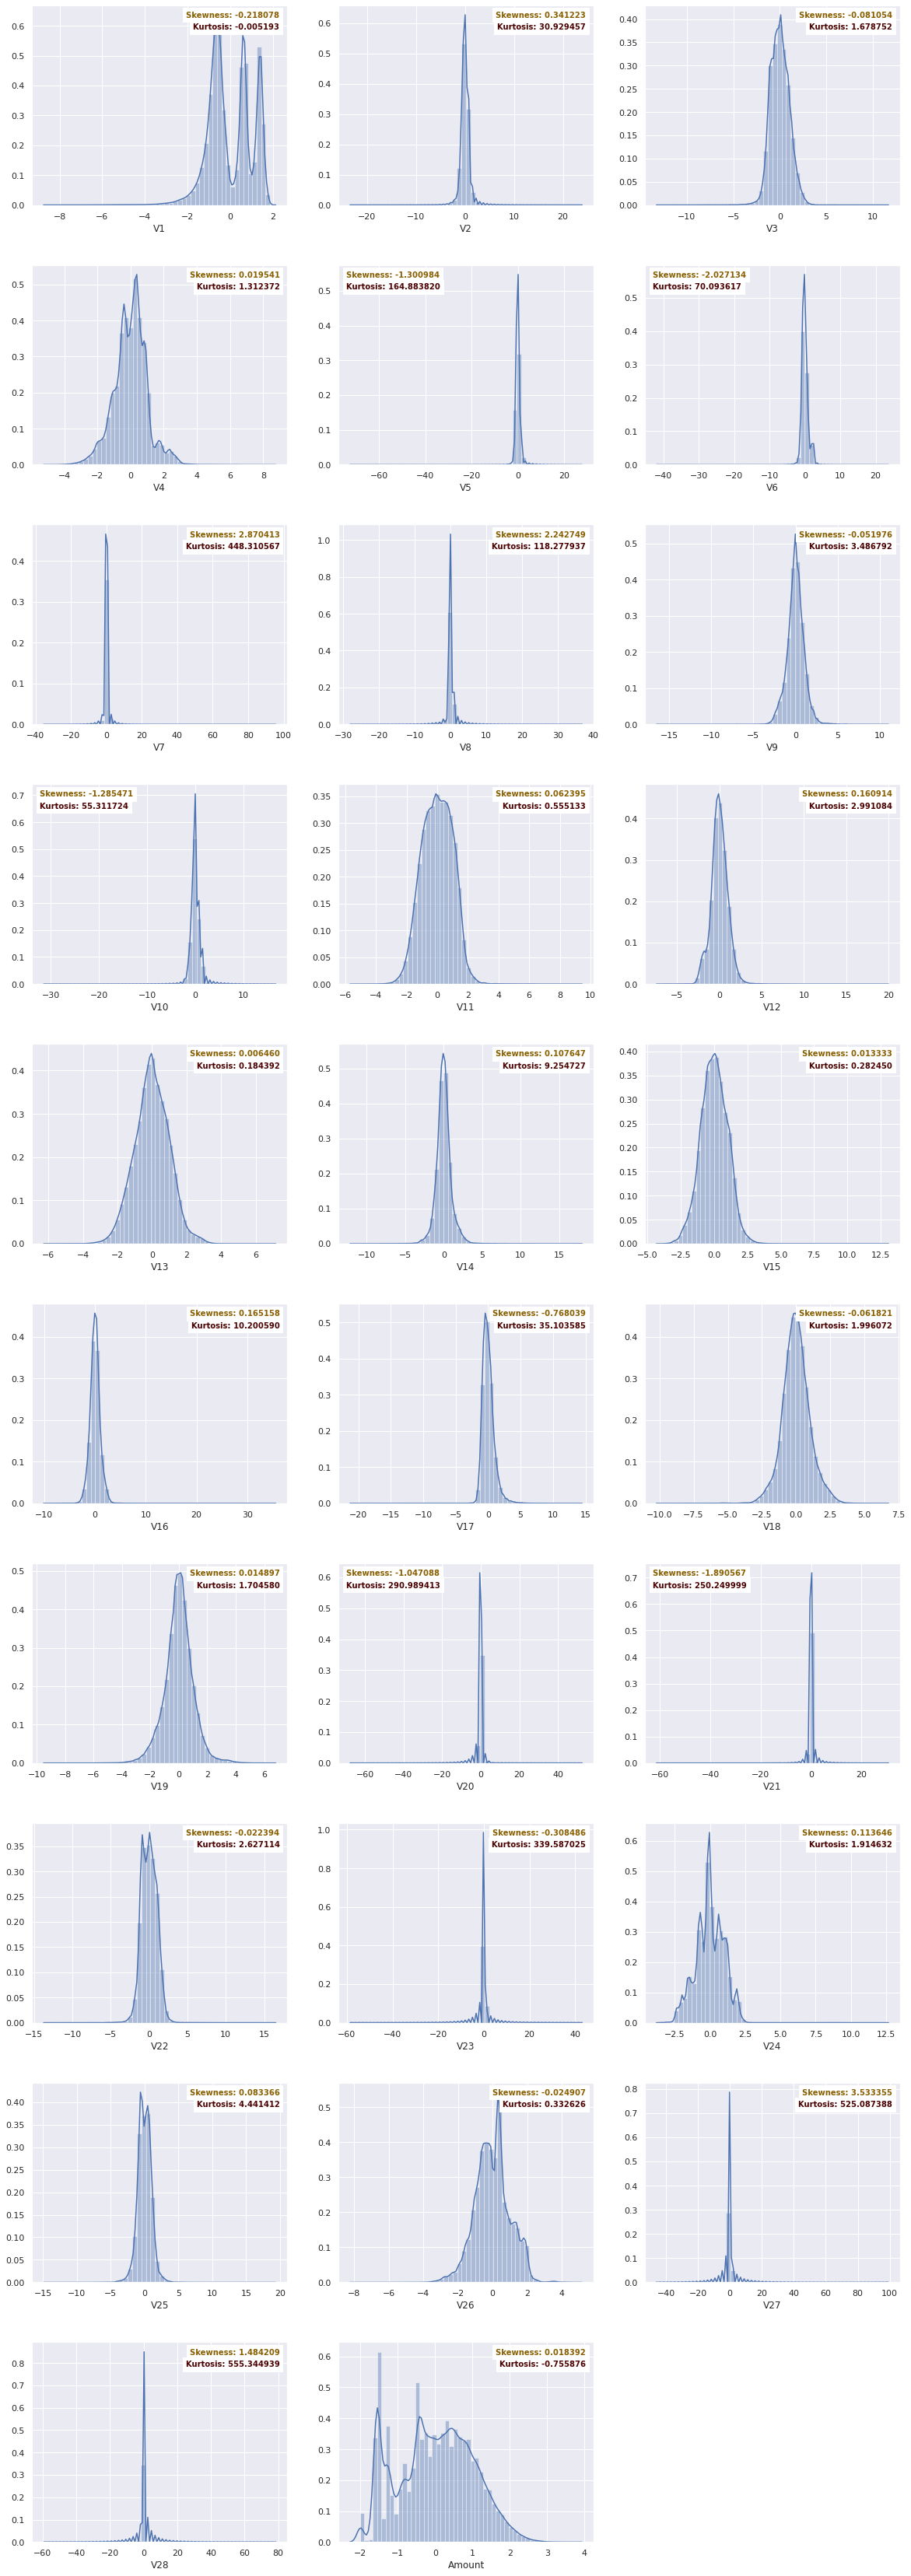

In [30]:
#inputs for subplot
col_list=only_vars
#targetcol='Churn_Tag'
plot_df=X_train_skew_df
numplots_eachrow=3
plot_data=plot_df[col_list]

# num plot calculations
numof_plots=[x+1 for x in range(0,len(col_list))]
col_rows=int(len(col_list)/numplots_eachrow)+1 if (len(col_list) % numplots_eachrow)!=0 else int(len(col_list)/numplots_eachrow)

#plot
plt.show()
ht=(len(numof_plots)%numplots_eachrow)+1
xfig=min(8*numplots_eachrow,15)
yfig=min(ht*8,15)

plt.figure(figsize=(20,60))
#f, axes = plt.subplots(col_rows,numplots_eachrow, sharex=True)

for i in numof_plots:
    numof_rows=col_rows
    numplots_echrow=numplots_eachrow
    subplot_num=i
    plt.subplot(numof_rows,numplots_echrow,subplot_num)
    g=sns.distplot(plot_df[col_list[i-1]])
    ax=g.axes
    check_val=plot_data.iloc[:,i-1].skew()

    if check_val<-1:
        ha='left'
        xval=0.03
    else:
        ha='right'
        xval=0.97

    stat, p = shapiro(plot_data.iloc[:,i-1])
    #print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.20
    if p > alpha:
        #print('Sample looks Gaussian (fail to reject H0)')
        gauss_var='Gaussian'
    else:
        #print('Sample does not look Gaussian (reject H0)')
        gauss_var='NOT Gaussian'

    ax.text(x=xval, y=0.97, transform=ax.transAxes, s="Skewness: %f" % plot_data.iloc[:,i-1].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment=ha,\
        backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=xval, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % plot_data.iloc[:,i-1].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment=ha,\
        backgroundcolor='white', color='xkcd:dried blood')
    # ax.text(x=xval, y=0.85, transform=ax.transAxes, s=gauss_var,\
    #     fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment=ha,\
    #     backgroundcolor='white', color='xkcd:poo brown')
    

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)

## Test dataset Transform

In [31]:
X_test_skew_df=pd.DataFrame(pt.transform(X_test[col_list]))
X_test_skew_df.columns=col_list

<br>

## Balancing scenarios

### Model building with balancing Classes

##### Perform class balancing with :
- `With Skew Treatment and Without Balancing`
- With Skew Treatment and Balancing Via Random Over sampelling
- With Balancing Via ADASYN
- With Balancing Via SMOTE

### Without Skew Treatment and Without Balancing

In [32]:
X_DS0_train=X_train_skew_df
y_DS0_train=y_train

In [33]:
classes=y_DS0_train.value_counts()
normal_share=classes[0]/y_DS0_train.count()*100
fraud_share=classes[1]/y_DS0_train.count()*100

print('Normal:',normal_share)
print('Fraud:',fraud_share)

Normal: 99.82619763435669
Fraud: 0.17380236564331014


In [34]:
print("Without Skew and Imbalance :(X_DS0_train,y_DS0_train)")
print(X_DS0_train.shape)
print(y_DS0_train.shape)

classes=y_DS0_train.value_counts()
normal_share=classes[0]/y_DS0_train.count()*100
fraud_share=classes[1]/y_DS0_train.count()*100

print('Ration(Fraud:Normal):',fraud_share,":",normal_share)
print('')

Without Skew and Imbalance :(X_DS0_train,y_DS0_train)
(227845, 29)
(227845,)
Ration(Fraud:Normal): 0.17380236564331014 : 99.82619763435669



# Model Building
- Build different models on the imbalanced dataset and see the result

### Tabel Summary

In [35]:
#model summary dataframe
Model_Name=[]
Thresold=[]
Train_ROC_score=[]
Test_ROC_score=[]
Total_Savings=[]

TP=[]
FP=[]
TN=[]
FN=[]
    
col_nams1=['Model_Name','Thresold','Train_ROC_score','Test_ROC_score','Total_Savings','TP','FP','TN','FN']

#dataframe-1
df_Model_Summary=pd.DataFrame(list(zip(Model_Name,Thresold,Train_ROC_score,Test_ROC_score,Total_Savings,
                             TP,FP,TN,FN)),
                         columns=col_nams1)

#dataframe-1
def add_new_row(val_1,val_2,val_3,val_4,val_5,val_6,val_7,val_8,val_9,dataframe=df_Model_Summary):
    Model_Name=[str(val_1)]
    Thresold=[str(val_2)]
    Train_ROC_score=[str(val_3)]
    Test_ROC_score=[str(val_4)]
    Total_Savings=[str(val_5)]
    
    TP=[str(val_6)]
    FP=[str(val_7)]
    TN=[str(val_8)]
    FN=[str(val_9)]
    
    df=dataframe
    df=df.drop_duplicates()
    insert_at=df.shape[0]
    df.loc[insert_at]=Model_Name+Thresold+Train_ROC_score+Test_ROC_score+Total_Savings+TP+FP+TN+FN
    df=df.drop_duplicates()
    return(df)
    

### Using hyperopt Tuning

In [36]:
# !pip install hyperopt

In [37]:
#import
from hyperopt import fmin,tpe,hp,STATUS_OK,Trials

### Stratifed Kfold

In [38]:
#import
from sklearn.model_selection import StratifiedKFold

In [39]:
#initiate
skfold=StratifiedKFold(n_splits=5,shuffle=False,random_state=100)

### ROC Curve

In [40]:
#ROC function
from sklearn import metrics
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    #return fpr, tpr, thresholds

## Randon Forest

### Hyperopt Tuning

In [41]:
%%time

X_trn=X_DS0_train
y_trn=y_DS0_train

X_tst=X_test_skew_df
y_tst=y_test

#defining
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
def hyperopt_train_test(params):
    clf=RandomForestClassifier(**params)
    crossvalscore=cross_val_score(clf,X_trn,y_trn,n_jobs=-1,cv=5,
              scoring= 'roc_auc').mean()
    return(crossvalscore)

rf_space={
    'max_depth':hp.choice('max_depth',range(8,16)),
    'max_features':hp.choice('max_features',range(1,15)),
    'criterion': hp.choice('criterion', ["gini", "entropy"]),
    'n_estimators': hp.choice('n_estimators', range(50,160,10)),
    'min_samples_split':hp.uniform('min_samples_split', 0, 1)
    
}

rf_best=0

def f(params):
    global rf_best
    acc=hyperopt_train_test(params)
    if acc>rf_best:
        rf_best=acc
        print('new best:', rf_best, params)
    return {'loss': -acc, 'status': STATUS_OK}

rf_trials=Trials()
rf_best=fmin(f,rf_space,algo=tpe.suggest,max_evals=30,trials=rf_trials)


from hyperopt import space_eval
rf_best_params=space_eval(rf_space, rf_best)
print('Best:',rf_best_params)

new best:                                             
0.9759971271985007                                    
{'criterion': 'entropy', 'max_depth': 15, 'max_features': 13, 'min_samples_split': 0.34011667788722055, 'n_estimators': 60}
new best:                                                                           
0.9772758301311073                                                                
{'criterion': 'entropy', 'max_depth': 8, 'max_features': 14, 'min_samples_split': 0.4258752520570114, 'n_estimators': 50}
new best:                                                                            
0.9775187764922201                                                                 
{'criterion': 'entropy', 'max_depth': 9, 'max_features': 13, 'min_samples_split': 0.04297552587594089, 'n_estimators': 60}
new best:                                                                            
0.9788758771428376                                                                   
{'criterion

### Best Parameters

In [42]:
# rf_best_params={'criterion': 'entropy', 'max_depth': 10,
#                 'max_features': 12, 'min_samples_split': 0.041454835625729824, 
#                 'n_estimators': 90}

In [43]:
rf_best_params

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 14,
 'min_samples_split': 0.0005038360674507678,
 'n_estimators': 60}

### CV Score

In [44]:
%%time

X_trn=X_DS0_train
y_trn=y_DS0_train

X_tst=X_test_skew_df
y_tst=y_test

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

#initiate
skfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=100)
rf_clf=RandomForestClassifier(**rf_best_params)

rf_crossvalscore=cross_val_score(rf_clf,X_trn,y_trn,n_jobs=-1,cv=skfold,
            scoring= 'roc_auc')

CPU times: user 68 ms, sys: 44 ms, total: 112 ms
Wall time: 3min 26s


In [45]:
rf_crossvalscore

array([0.98631025, 0.99465371, 0.97118813, 0.9562071 , 0.99391391])

### Final Fit

In [46]:
%%time
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(**rf_best_params)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 60.6 µs


In [47]:
%%time
rf_clf.fit(X_trn,y_trn)

CPU times: user 4min 13s, sys: 0 ns, total: 4min 13s
Wall time: 4min 13s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=9, max_features=14,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1,
                       min_samples_split=0.0005038360674507678,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
%%time
y_pred_trn_rf_lst = rf_clf.predict_proba(X_trn)
y_pred_trn_rf=[x[1] for x in y_pred_trn_rf_lst]

CPU times: user 948 ms, sys: 0 ns, total: 948 ms
Wall time: 944 ms


In [49]:
#declaring
y_t=y_trn
y_p=y_pred_trn_rf

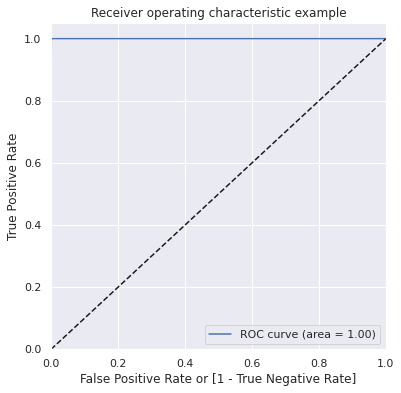

In [50]:
draw_roc( y_t, y_p )

In [51]:
Train_AUC=metrics.roc_auc_score(y_t,y_p)
print('Train auc =', metrics.roc_auc_score(y_t,y_p))
fpr, tpr, thresholds = metrics.roc_curve(y_t,y_p)
threshold = thresholds[np.argmax(tpr-fpr)]
print('Best Threshold=%f'%threshold)

train_threshold=threshold

Train auc = 0.9999109024374029
Best Threshold=0.041242


### Evaluation on Test Set

In [52]:
%%time
y_pred_tst_rf_lst = rf_clf.predict_proba(X_tst)
y_pred_tst_rf=[x[1] for x in y_pred_tst_rf_lst]

CPU times: user 232 ms, sys: 4 ms, total: 236 ms
Wall time: 232 ms


### ROC Curve

In [53]:
#declaring
y_t=y_tst
y_p=y_pred_tst_rf

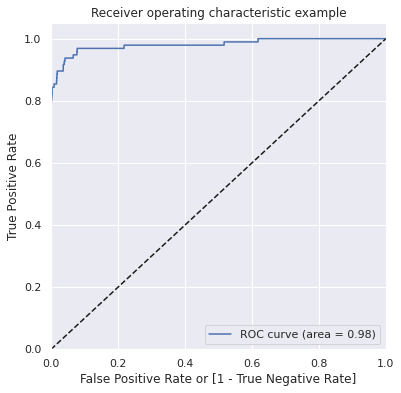

In [54]:
draw_roc( y_t, y_p )

In [55]:
from sklearn.metrics import roc_curve
from numpy import argmax
Test_AUC=metrics.roc_auc_score(y_t,y_p)
print('Test auc =', metrics.roc_auc_score(y_t,y_p))

Test auc = 0.9809477177340884


In [56]:

#creating new dataframe with predections and actual values
CFM_final = pd.DataFrame({'Actual':y_test, 'Predict_Prob':y_p})
CFM_final['Predict_Prob'] = y_p
CFM_final['Amount']=X_test['Amount']
CFM_final['Amount_Cost_Coeff']=0
CFM_final['Call_Cost_Coeff']=0


prob_i=round(train_threshold,4)
print('Thresold:-',prob_i)

CFM_final['Predicted'] = CFM_final.Predict_Prob.map(lambda x: 1 if x > prob_i else 0)
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==0)]=0
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==0)]=-1
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==1)]=0
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==1)]=1

CFM_final.Call_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==0)]=0
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==0)]=0
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==1)]=-10
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==1)]=-10

CFM_final['Amount_cal']=CFM_final['Amount_Cost_Coeff']*CFM_final['Amount']

Amount_ontransac=sum(list(CFM_final['Amount_cal']))
Amount_oncalls=sum(list(CFM_final['Call_Cost_Coeff']))
Total_amount_saved=(Amount_ontransac+Amount_oncalls)

#print(Amount_ontransac)
#print(Amount_oncalls)
print(Total_amount_saved)
CFM_final.head()

Thresold:- 0.0412
5549.990000000001


Actual  Predict_Prob  Amount  Amount_Cost_Coeff  Call_Cost_Coeff  \
49089        0      0.000022    1.99                  0                0   
154704       0      0.000089    6.99                  0                0   
67247        0      0.000023  306.16                  0                0   
251657       0      0.000008    0.99                  0                0   
201903       0      0.009161   30.27                  0                0   

        Predicted  Amount_cal  
49089           0         0.0  
154704          0         0.0  
67247           0         0.0  
251657          0         0.0  
201903          0         0.0

In [57]:
#metrics
confusion_rfelog=metrics.confusion_matrix(CFM_final.Actual, CFM_final.Predicted )
TP = confusion_rfelog[1,1] # true positive 
TN = confusion_rfelog[0,0] # true negatives
FP = confusion_rfelog[0,1] # false positives
FN = confusion_rfelog[1,0] # false negatives

print('TP:',TP)
print('TN:',TN)
print('FP:',FP)
print('FN:',FN)

TP: 77
TN: 56770
FP: 96
FN: 19


### Classification Report

In [58]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

print(confusion_matrix(CFM_final.Actual, CFM_final.Predicted))
print('\n')

print(classification_report(CFM_final.Actual, CFM_final.Predicted))

[[56770    96]
 [   19    77]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.45      0.80      0.57        96

    accuracy                           1.00     56962
   macro avg       0.72      0.90      0.79     56962
weighted avg       1.00      1.00      1.00     56962



### Summary

In [59]:
#template
Model_Name='Random Forest'
Thresold=round(train_threshold,4)
Train_ROC_score=round(Train_AUC,4)
Test_ROC_score=round(Test_AUC,4)
Total_Savings=round(Total_amount_saved,2)

TP=TP
FP=FP
TN=TN
FN=FN


df_Model_Summary=add_new_row(Model_Name,Thresold,Train_ROC_score,Test_ROC_score,Total_Savings,
                             TP,FP,TN,FN,df_Model_Summary)
df_Model_Summary

Model_Name Thresold Train_ROC_score Test_ROC_score Total_Savings  TP  \
0  Random Forest   0.0412          0.9999         0.9809       5549.99  77   

   FP     TN  FN  
0  96  56770  19

## XGBoost

### Hyperopt Tuning

In [60]:
%%time

X_trn=X_DS0_train
y_trn=y_DS0_train

X_tst=X_test_skew_df
y_tst=y_test

#import
from hyperopt import fmin,tpe,hp,STATUS_OK,Trials

#defining
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
import xgboost as xgb

xgb_space = {
    'booster '    : 'gbtree',       
    'objective'   : 'binary:logistic',
    'eval_metric' : 'auc',
    'max_depth' : hp.choice('max_depth', range(5, 20, 1)),
    'learning_rate' : hp.quniform('learning_rate', 0.01, 0.5, 0.01),
    'n_estimators' : hp.choice('n_estimators', range(200, 2100, 100)),
    'gamma' : hp.quniform('gamma', 0, 0.50, 0.01),
    'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
    'subsample' : hp.quniform('subsample', 0.1, 1, 0.01),
    'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1.0, 0.01),
    'reg_lambda' : hp.uniform ('reg_lambda', 0,1)
    }

xgb_train = xgb.DMatrix(X_trn.values, y_trn.values)
xgb_eval  = xgb.DMatrix(X_tst.values, y_tst.values)

def hyperopt_train_test(params):

    train_=xgb_train

    xgb_clf = xgb.cv(params,
                   train_,
                   nfold=5,
                   num_boost_round=2000,
                   early_stopping_rounds=20,
                   verbose_eval=False,
                   shuffle=True,
                   stratified=True)

    crossvalscore=list(xgb_clf['test-auc-mean'])[-1]
    return(crossvalscore)


xgb_best=0


def f(params):
    global xgb_best
    acc=hyperopt_train_test(params)
    if acc>xgb_best:
        xgb_best=acc
        print('new best:', xgb_best, params)
    return {'loss': -acc, 'status': STATUS_OK}

xgb_trials=Trials()
xgb_best=fmin(f,xgb_space,algo=tpe.suggest,max_evals=50,trials=xgb_trials)



from hyperopt import space_eval

xgb_best_params=space_eval(xgb_space, xgb_best)
print('Best:',space_eval(xgb_space, xgb_best))

new best:                                             
0.9794126000000001                                    
{'booster ': 'gbtree', 'colsample_bytree': 0.47000000000000003, 'eval_metric': 'auc', 'gamma': 0.43, 'learning_rate': 0.03, 'max_depth': 16, 'min_child_weight': 1.0, 'n_estimators': 1900, 'objective': 'binary:logistic', 'reg_lambda': 0.7750847593148792, 'subsample': 0.42}
new best:                                                                        
0.9804226                                                                        
{'booster ': 'gbtree', 'colsample_bytree': 0.49, 'eval_metric': 'auc', 'gamma': 0.47000000000000003, 'learning_rate': 0.18, 'max_depth': 8, 'min_child_weight': 4.0, 'n_estimators': 1800, 'objective': 'binary:logistic', 'reg_lambda': 0.9012668250320931, 'subsample': 0.21}
new best:                                                                        
0.9810685999999998                                                      
{'booster ': 'gbtree', 'co

### Best Parameters

In [61]:
# xgb_best_params={'booster': 'gbtree', 'colsample_bytree': 0.84,
#             'eval_metric': 'auc', 'gamma': 0.13, 
#             'learning_rate': 0.07, 'max_depth': 19,
#             'min_child_weight': 5.0, 'n_estimators': 1500,
#             'objective': 'binary:logistic', 'reg_lambda': 0.001, 'subsample': 0.47}

In [62]:
xgb_best_params

{'booster ': 'gbtree',
 'colsample_bytree': 0.84,
 'eval_metric': 'auc',
 'gamma': 0.11,
 'learning_rate': 0.11,
 'max_depth': 19,
 'min_child_weight': 2.0,
 'n_estimators': 1000,
 'objective': 'binary:logistic',
 'reg_lambda': 0.42218842076661645,
 'subsample': 0.37}

### CV Score

In [63]:
%%time

X_trn=X_DS0_train
y_trn=y_DS0_train

X_tst=X_test_skew_df
y_tst=y_test

#initiate
skfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=100)

from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score


xgb_clf = xgb.XGBClassifier(**xgb_best_params)

xgb_crossvalscore = cross_val_score(xgb_clf, X_trn, y_trn, cv=skfold,scoring= 'roc_auc')

print("AUC: %.2f%% (%.2f%%)" % (xgb_crossvalscore.mean()*100, xgb_crossvalscore.std()*100))

AUC: 97.85% (1.30%)
CPU times: user 49min 59s, sys: 19 s, total: 50min 18s
Wall time: 3min 8s


In [64]:
xgb_crossvalscore

array([0.98259153, 0.98631665, 0.98197601, 0.95292358, 0.98878877])

### Fit

In [65]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score
xgb_clf = xgb.XGBClassifier(**xgb_best_params)

In [66]:
%%time
xgb_clf.fit(X_trn,y_trn)

CPU times: user 13min 41s, sys: 5.13 s, total: 13min 47s
Wall time: 51.8 s


XGBClassifier(base_score=0.5, booster=None, booster ='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.84,
              eval_metric='auc', gamma=0.11, gpu_id=-1, importance_type='gain',
              interaction_constraints=None, learning_rate=0.11,
              max_delta_step=0, max_depth=19, min_child_weight=2.0, missing=nan,
              monotone_constraints=None, n_estimators=1000, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=0.42218842076661645, scale_pos_weight=1,
              subsample=0.37, tree_method=None, validate_parameters=False,
              verbosity=None)

In [67]:
%%time
y_pred_trn_xgb_lst = xgb_clf.predict_proba(X_trn)
y_pred_trn_xgb=[x[1] for x in y_pred_trn_xgb_lst]

CPU times: user 14.3 s, sys: 116 ms, total: 14.5 s
Wall time: 920 ms


In [68]:
y_t=y_trn
y_p=y_pred_trn_xgb

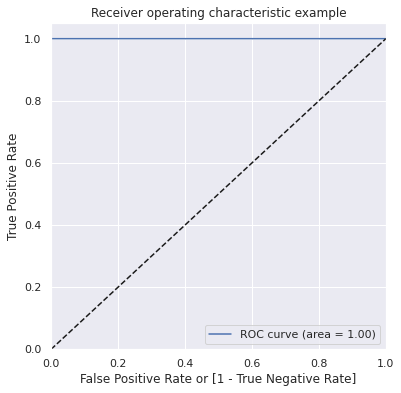

In [69]:
draw_roc( y_t, y_p )

In [70]:
Train_AUC=metrics.roc_auc_score(y_t,y_p)
print('Train auc =', metrics.roc_auc_score(y_t,y_p))
fpr, tpr, thresholds = metrics.roc_curve(y_t,y_p)
threshold = thresholds[np.argmax(tpr-fpr)]
print('Best Threshold=%f'%threshold)

train_threshold=threshold

Train auc = 1.0
Best Threshold=0.729020


### Evaluation on Test Set

In [71]:
%%time
y_pred_tst_xgb_lst = xgb_clf.predict_proba(X_tst)
y_pred_tst_xgb=[x[1] for x in y_pred_tst_xgb_lst]

CPU times: user 2.93 s, sys: 0 ns, total: 2.93 s
Wall time: 213 ms


### ROC Curve

In [72]:
#declaring
y_t=y_tst
y_p=y_pred_tst_xgb

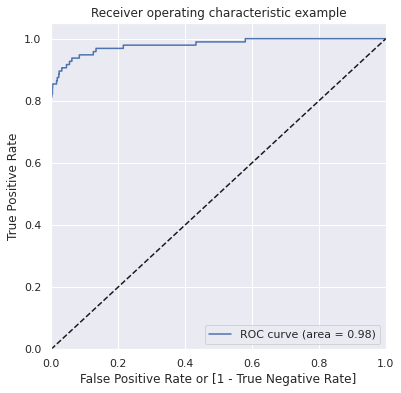

In [73]:
draw_roc( y_t, y_p )

In [74]:
from sklearn.metrics import roc_curve
from numpy import argmax

Test_AUC=metrics.roc_auc_score(y_t,y_p)
print('Test auc =', metrics.roc_auc_score(y_t,y_p))

Test auc = 0.9805221925227728


In [75]:

#creating new dataframe with predections and actual values
CFM_final = pd.DataFrame({'Actual':y_test, 'Predict_Prob':y_p})
CFM_final['Predict_Prob'] = y_p
CFM_final['Amount']=X_test['Amount']
CFM_final['Amount_Cost_Coeff']=0
CFM_final['Call_Cost_Coeff']=0


prob_i=round(train_threshold,4)
print('Thresold:-',prob_i)

CFM_final['Predicted'] = CFM_final.Predict_Prob.map(lambda x: 1 if x > prob_i else 0)
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==0)]=0
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==0)]=-1
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==1)]=0
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==1)]=1

CFM_final.Call_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==0)]=0
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==0)]=0
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==1)]=-10
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==1)]=-10

CFM_final['Amount_cal']=CFM_final['Amount_Cost_Coeff']*CFM_final['Amount']

Amount_ontransac=sum(list(CFM_final['Amount_cal']))
Amount_oncalls=sum(list(CFM_final['Call_Cost_Coeff']))
Total_amount_saved=(Amount_ontransac+Amount_oncalls)

#print(Amount_ontransac)
#print(Amount_oncalls)
print(Total_amount_saved)
CFM_final.head()

Thresold:- 0.729
5023.109999999998


Actual  Predict_Prob  Amount  Amount_Cost_Coeff  Call_Cost_Coeff  \
49089        0  5.293420e-04    1.99                  0                0   
154704       0  1.726430e-06    6.99                  0                0   
67247        0  6.574405e-08  306.16                  0                0   
251657       0  3.497581e-06    0.99                  0                0   
201903       0  2.101781e-04   30.27                  0                0   

        Predicted  Amount_cal  
49089           0         0.0  
154704          0         0.0  
67247           0         0.0  
251657          0         0.0  
201903          0         0.0

In [76]:
#metrics
confusion_rfelog=metrics.confusion_matrix(CFM_final.Actual, CFM_final.Predicted )
TP = confusion_rfelog[1,1] # true positive 
TN = confusion_rfelog[0,0] # true negatives
FP = confusion_rfelog[0,1] # false positives
FN = confusion_rfelog[1,0] # false negatives

print('TP:',TP)
print('TN:',TN)
print('FP:',FP)
print('FN:',FN)

TP: 67
TN: 56859
FP: 7
FN: 29


### Classification Report

In [77]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

print(confusion_matrix(CFM_final.Actual, CFM_final.Predicted))
print('\n')

print(classification_report(CFM_final.Actual, CFM_final.Predicted))

[[56859     7]
 [   29    67]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.91      0.70      0.79        96

    accuracy                           1.00     56962
   macro avg       0.95      0.85      0.89     56962
weighted avg       1.00      1.00      1.00     56962



### Summary

In [78]:
#template
Model_Name='XGBoost'
Thresold=round(train_threshold,4)
Train_ROC_score=round(Train_AUC,4)
Test_ROC_score=round(Test_AUC,4)
Total_Savings=round(Total_amount_saved,2)

TP=TP
FP=FP
TN=TN
FN=FN


df_Model_Summary=add_new_row(Model_Name,Thresold,Train_ROC_score,Test_ROC_score,Total_Savings,
                             TP,FP,TN,FN,df_Model_Summary)
df_Model_Summary

Model_Name Thresold Train_ROC_score Test_ROC_score Total_Savings  TP  \
0  Random Forest   0.0412          0.9999         0.9809       5549.99  77   
1        XGBoost    0.729             1.0         0.9805       5023.11  67   

   FP     TN  FN  
0  96  56770  19  
1   7  56859  29

## Logistic Model

In [79]:
import statsmodels.api as sm

In [80]:
#storing column names

X_trn=X_DS0_train
y_trn=y_DS0_train

X_tst=X_test_skew_df
y_tst=y_test

cols_model=X_trn.columns

In [81]:
# #model
# logm1=sm.GLM(y_trn,(sm.add_constant(X_trn[cols_model])),family=sm.families.Binomial())
# logm1.fit().summary()

In [82]:
# #removing columns based on p-value
# remove_columns=['V2','V3','V5','V6','V11','V12','V15','V16','V17','V18','V19','V23','V24','V25','V26']
# cols_model=list(cols_model)
# for x in remove_columns:
#     cols_model.remove(x)

In [83]:
# #model
# logm2=sm.GLM(y_,(sm.add_constant(X_trn[cols_model])),family=sm.families.Binomial())
# logm2.fit().summary()

In [84]:
# #removing columns based on p-value
# remove_columns=['V28']
# cols_model=list(cols_model)
# for x in remove_columns:
#     cols_model.remove(x)

In [85]:
# #model
# logm3=sm.GLM(y_,(sm.add_constant(X_trn[cols_model])),family=sm.families.Binomial())
# logm3.fit().summary()

### Hyperopt Tuning

In [86]:
%%time

#initiate
skfold=StratifiedKFold(n_splits=5,shuffle=False,random_state=100)

X_trn=X_DS0_train
y_trn=y_DS0_train

X_tst=X_test_skew_df
y_tst=y_test


#defining
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
def hyperopt_train_test(params):
    clf=LogisticRegression(**params)
    crossvalscore=cross_val_score(clf,X_trn[cols_model],y_trn,n_jobs=-1,cv=skfold,
              scoring= 'roc_auc').mean()
    return(crossvalscore)

lr_space={
    'penalty': hp.choice('penalty', ["l1", "l2"]),
    'solver': hp.choice('solver', ['liblinear']),
    'C':hp.uniform('C', .0001, 1000)
}

lr_best=0

def f(params):
    global lr_best
    acc=hyperopt_train_test(params)
    acc= float("{0:.8f}".format(acc))
    if acc>lr_best:
        lr_best=acc
        print('new best:', lr_best, params)
    return {'loss': -acc, 'status': STATUS_OK}

lr_trials=Trials()
lr_best=fmin(f,lr_space,algo=tpe.suggest,max_evals=100,trials=lr_trials)
from hyperopt import space_eval

lr_best_params=space_eval(lr_space, lr_best)
print('Best:',space_eval(lr_space, lr_best))

new best:                                              
0.98041087                                             
{'C': 258.15463793908367, 'penalty': 'l2', 'solver': 'liblinear'}
new best:                                                                 
0.98041142                                                                
{'C': 114.5325899210789, 'penalty': 'l1', 'solver': 'liblinear'}          
new best:                                                                  
0.9804185                                                                  
{'C': 41.47418190195182, 'penalty': 'l1', 'solver': 'liblinear'}           
new best:                                                                  
0.98042028                                                                
{'C': 34.51866754626044, 'penalty': 'l1', 'solver': 'liblinear'}          
new best:                                                                  
0.98044463                                                         

### Best Parameters

In [87]:
lr_best_params

{'C': 0.6052407562895685, 'penalty': 'l1', 'solver': 'liblinear'}

## CV

In [88]:
%%time

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

skfold=StratifiedKFold(n_splits=5,shuffle=False,random_state=100)

lr_clf=LogisticRegression(**lr_best_params)
crossvalscore=cross_val_score(lr_clf,X_trn[cols_model],y_trn,n_jobs=-1,cv=skfold,
          scoring= 'roc_auc')

CPU times: user 52 ms, sys: 56 ms, total: 108 ms
Wall time: 3.2 s


In [89]:
crossvalscore

array([0.97931163, 0.99368536, 0.95843376, 0.99100067, 0.98201131])

## Fit

In [90]:
lr_clf=LogisticRegression(**lr_best_params)

In [91]:
%%time
lr_clf.fit(X_trn[cols_model],y_trn)

CPU times: user 2.97 s, sys: 124 ms, total: 3.09 s
Wall time: 3.09 s


LogisticRegression(C=0.6052407562895685, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
%%time
y_pred_trn_lr_lst = lr_clf.predict_proba(X_trn[cols_model])
y_pred_trn_lr=[x[1] for x in y_pred_trn_lr_lst]

CPU times: user 1.26 s, sys: 28 ms, total: 1.29 s
Wall time: 109 ms


In [93]:
y_t=y_trn
y_p=y_pred_trn_lr

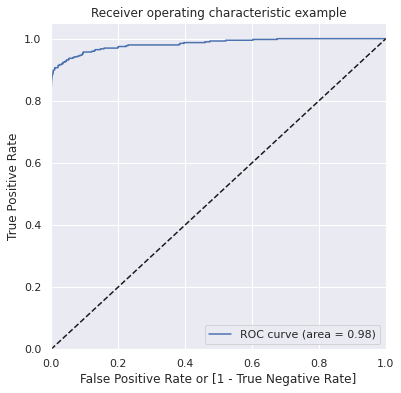

In [94]:
draw_roc( y_t, y_p )

In [95]:
Train_AUC=metrics.roc_auc_score(y_t,y_p)
print('Train auc =', metrics.roc_auc_score(y_t,y_p))
fpr, tpr, thresholds = metrics.roc_curve(y_t,y_p)
threshold = thresholds[np.argmax(tpr-fpr)]
print('Best Threshold=%f'%threshold)

train_threshold=threshold

Train auc = 0.9831444287366273
Best Threshold=0.004001


### Evaluation on Test Set

In [96]:
%%time
y_pred_tst_lr_lst = lr_clf.predict_proba(X_tst[cols_model])
y_pred_tst_lr=[x[1] for x in y_pred_tst_lr_lst]

CPU times: user 344 ms, sys: 12 ms, total: 356 ms
Wall time: 31.9 ms


### ROC Curve

In [97]:
y_t=y_test
y_p=y_pred_tst_lr

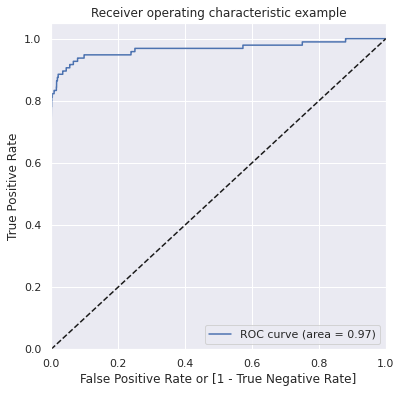

In [98]:
draw_roc( y_t, y_p )

In [99]:
from sklearn.metrics import roc_curve
from numpy import argmax

Test_AUC=metrics.roc_auc_score(y_t,y_p)
print('Test auc =', metrics.roc_auc_score(y_t,y_p))

Test auc = 0.9667121317365972


### Cost-Benfit Analysis

In [100]:

#creating new dataframe with predections and actual values
CFM_final = pd.DataFrame({'Actual':y_test, 'Predict_Prob':y_p})
CFM_final['Predict_Prob'] = y_p
CFM_final['Amount']=X_test['Amount']
CFM_final['Amount_Cost_Coeff']=0
CFM_final['Call_Cost_Coeff']=0


prob_i=round(train_threshold,4)
print('Thresold:-',prob_i)

CFM_final['Predicted'] = CFM_final.Predict_Prob.map(lambda x: 1 if x > prob_i else 0)
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==0)]=0
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==0)]=-1
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==1)]=0
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==1)]=1

CFM_final.Call_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==0)]=0
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==0)]=0
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==1)]=-10
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==1)]=-10

CFM_final['Amount_cal']=CFM_final['Amount_Cost_Coeff']*CFM_final['Amount']

Amount_ontransac=sum(list(CFM_final['Amount_cal']))
Amount_oncalls=sum(list(CFM_final['Call_Cost_Coeff']))
Total_amount_saved=(Amount_ontransac+Amount_oncalls)

#print(Amount_ontransac)
#print(Amount_oncalls)
print(Total_amount_saved)
CFM_final.head()

Thresold:- 0.004
118.58999999999924


Actual  Predict_Prob  Amount  Amount_Cost_Coeff  Call_Cost_Coeff  \
49089        0      0.000362    1.99                  0                0   
154704       0      0.000901    6.99                  0                0   
67247        0      0.000108  306.16                  0                0   
251657       0      0.000119    0.99                  0                0   
201903       0      0.039943   30.27                  0              -10   

        Predicted  Amount_cal  
49089           0         0.0  
154704          0         0.0  
67247           0         0.0  
251657          0         0.0  
201903          1         0.0

In [101]:
#metrics
confusion_rfelog=metrics.confusion_matrix(CFM_final.Actual, CFM_final.Predicted )
TP = confusion_rfelog[1,1] # true positive 
TN = confusion_rfelog[0,0] # true negatives
FP = confusion_rfelog[0,1] # false positives
FN = confusion_rfelog[1,0] # false negatives

print('TP:',TP)
print('TN:',TN)
print('FP:',FP)
print('FN:',FN)

TP: 80
TN: 56226
FP: 640
FN: 16


### Classification Report

In [102]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

print(confusion_matrix(CFM_final.Actual, CFM_final.Predicted))
print('\n')

print(classification_report(CFM_final.Actual, CFM_final.Predicted))

[[56226   640]
 [   16    80]]


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56866
           1       0.11      0.83      0.20        96

    accuracy                           0.99     56962
   macro avg       0.56      0.91      0.60     56962
weighted avg       1.00      0.99      0.99     56962



### Summary

In [103]:
#template
Model_Name='Logistic'
Thresold=round(train_threshold,4)
Train_ROC_score=round(Train_AUC,4)
Test_ROC_score=round(Test_AUC,4)
Total_Savings=round(Total_amount_saved,2)


TP=TP
FP=FP
TN=TN
FN=FN


df_Model_Summary=add_new_row(Model_Name,Thresold,Train_ROC_score,Test_ROC_score,Total_Savings,
                             TP,FP,TN,FN,df_Model_Summary)
df_Model_Summary

Model_Name Thresold Train_ROC_score Test_ROC_score Total_Savings  TP  \
0  Random Forest   0.0412          0.9999         0.9809       5549.99  77   
1        XGBoost    0.729             1.0         0.9805       5023.11  67   
2       Logistic    0.004          0.9831         0.9667        118.59  80   

    FP     TN  FN  
0   96  56770  19  
1    7  56859  29  
2  640  56226  16

## Ensemble

In [104]:
lst_1=y_pred_trn_rf
lst_2=y_pred_trn_xgb
lst_3=y_pred_trn_lr

zip_list = zip(lst_1,lst_2,lst_3) 
y_pred_trn_ensmbl = list(map(np.mean, zip_list))

In [105]:
y_t=y_trn
y_p=y_pred_trn_ensmbl

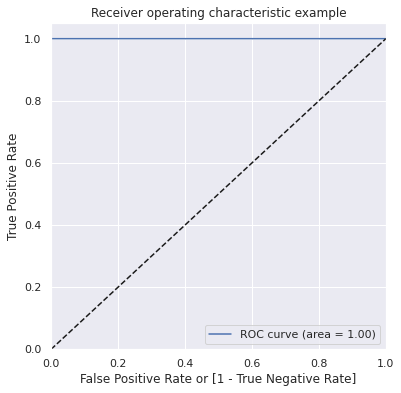

In [106]:
draw_roc( y_t, y_p )

In [107]:
Train_AUC=metrics.roc_auc_score(y_t,y_p)
print('Train auc =', metrics.roc_auc_score(y_t,y_p))
fpr, tpr, thresholds = metrics.roc_curve(y_t,y_p)
threshold = thresholds[np.argmax(tpr-fpr)]
print('Best Threshold=%f'%threshold)

train_threshold=threshold

Train auc = 0.9999755633974733
Best Threshold=0.277047


### Evaluation on Test Set

In [108]:
lst_1=y_pred_tst_rf
lst_2=y_pred_tst_xgb
lst_3=y_pred_tst_lr

zip_list = zip(lst_1,lst_2,lst_3) 
y_pred_tst_ensmbl = list(map(np.mean, zip_list))

In [109]:
y_t=y_test
y_p=y_pred_tst_ensmbl

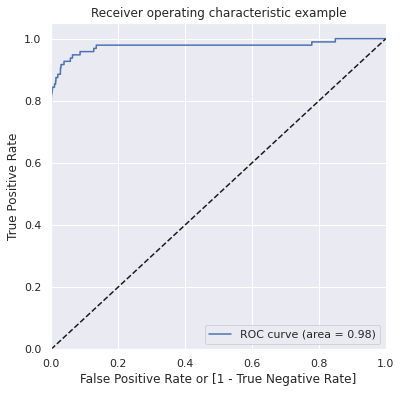

In [110]:
draw_roc( y_t, y_p )

In [111]:
from sklearn.metrics import roc_curve
from numpy import argmax

Test_AUC=metrics.roc_auc_score(y_t,y_p)
print('Test auc =', metrics.roc_auc_score(y_t,y_p))

Test auc = 0.9760641610687113


### Cost-Benfit Analysis

In [112]:

#creating new dataframe with predections and actual values
CFM_final = pd.DataFrame({'Actual':y_test, 'Predict_Prob':y_p})
CFM_final['Predict_Prob'] = y_p
CFM_final['Amount']=X_test['Amount']
CFM_final['Amount_Cost_Coeff']=0
CFM_final['Call_Cost_Coeff']=0


prob_i=round(train_threshold,4)
print('Thresold:-',prob_i)

CFM_final['Predicted'] = CFM_final.Predict_Prob.map(lambda x: 1 if x > prob_i else 0)
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==0)]=0
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==0)]=-1
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==1)]=0
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==1)]=1

CFM_final.Call_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==0)]=0
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==0)]=0
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==1)]=-10
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==1)]=-10

CFM_final['Amount_cal']=CFM_final['Amount_Cost_Coeff']*CFM_final['Amount']

Amount_ontransac=sum(list(CFM_final['Amount_cal']))
Amount_oncalls=sum(list(CFM_final['Call_Cost_Coeff']))
Total_amount_saved=(Amount_ontransac+Amount_oncalls)

#print(Amount_ontransac)
#print(Amount_oncalls)
print(Total_amount_saved)
CFM_final.head()

Thresold:- 0.277
6321.55


Actual  Predict_Prob  Amount  Amount_Cost_Coeff  Call_Cost_Coeff  \
49089        0      0.000304    1.99                  0                0   
154704       0      0.000331    6.99                  0                0   
67247        0      0.000044  306.16                  0                0   
251657       0      0.000044    0.99                  0                0   
201903       0      0.016438   30.27                  0                0   

        Predicted  Amount_cal  
49089           0         0.0  
154704          0         0.0  
67247           0         0.0  
251657          0         0.0  
201903          0         0.0

In [113]:
#metrics
confusion_rfelog=metrics.confusion_matrix(CFM_final.Actual, CFM_final.Predicted )
TP = confusion_rfelog[1,1] # true positive 
TN = confusion_rfelog[0,0] # true negatives
FP = confusion_rfelog[0,1] # false positives
FN = confusion_rfelog[1,0] # false negatives

print('TP:',TP)
print('TN:',TN)
print('FP:',FP)
print('FN:',FN)

TP: 74
TN: 56845
FP: 21
FN: 22


### Classification Report

In [114]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

print(confusion_matrix(CFM_final.Actual, CFM_final.Predicted))
print('\n')

print(classification_report(CFM_final.Actual, CFM_final.Predicted))

[[56845    21]
 [   22    74]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.78      0.77      0.77        96

    accuracy                           1.00     56962
   macro avg       0.89      0.89      0.89     56962
weighted avg       1.00      1.00      1.00     56962



### Summary

In [115]:
#template
Model_Name='Ensemble_Mean'
Thresold=round(train_threshold,4)
Train_ROC_score=round(Train_AUC,4)
Test_ROC_score=round(Test_AUC,4)
Total_Savings=round(Total_amount_saved,2)

TP=TP
FP=FP
TN=TN
FN=FN


df_Model_Summary=add_new_row(Model_Name,Thresold,Train_ROC_score,Test_ROC_score,Total_Savings,
                             TP,FP,TN,FN,df_Model_Summary)
df_Model_Summary

Model_Name Thresold Train_ROC_score Test_ROC_score Total_Savings  TP  \
0  Random Forest   0.0412          0.9999         0.9809       5549.99  77   
1        XGBoost    0.729             1.0         0.9805       5023.11  67   
2       Logistic    0.004          0.9831         0.9667        118.59  80   
3  Ensemble_Mean    0.277             1.0         0.9761       6321.55  74   

    FP     TN  FN  
0   96  56770  19  
1    7  56859  29  
2  640  56226  16  
3   21  56845  22

In [116]:
df_Model_Summary

Model_Name Thresold Train_ROC_score Test_ROC_score Total_Savings  TP  \
0  Random Forest   0.0412          0.9999         0.9809       5549.99  77   
1        XGBoost    0.729             1.0         0.9805       5023.11  67   
2       Logistic    0.004          0.9831         0.9667        118.59  80   
3  Ensemble_Mean    0.277             1.0         0.9761       6321.55  74   

    FP     TN  FN  
0   96  56770  19  
1    7  56859  29  
2  640  56226  16  
3   21  56845  22

In [117]:
# df_Model_Summary.to_csv('df_Model_Summary_nob',index=False)

### Print the important features of the best model to understand the dataset

Top var = 17
2nd Top var = 14
3rd Top var = 10


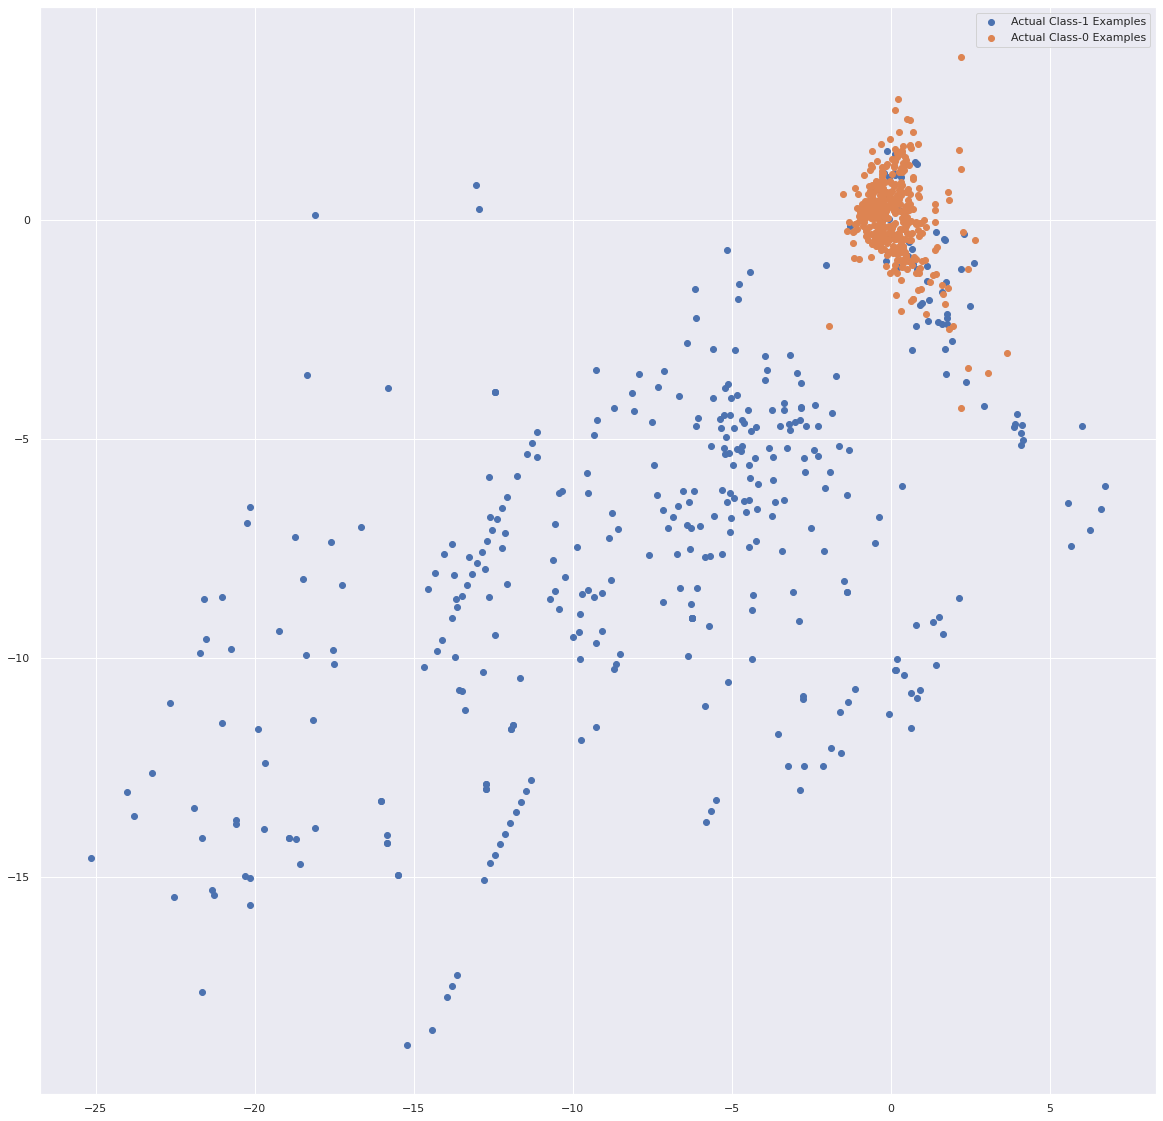

In [118]:
clf=rf_clf

var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-17 and Index-12 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.values[np.where(y_train==1.0)]
X_train_0 = X_train.values[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [119]:
#17,#14,#10

<br>

<br>

## RANDOM OVERSAMPLING

In [120]:
# !pip install -U pip


# !pip install hyperopt

# !pip install xgboost

# !pip install hyperopt

# !pip install imblearn

# !pip install --upgrade seaborn

# !pip install -U scikit-learn


In [121]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os

import warnings
warnings.filterwarnings('ignore')

In [122]:
import sklearn
import math

from scipy.stats import shapiro
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler


from sklearn.model_selection import train_test_split

In [123]:
np.linspace(0.1, 1.0, 10, endpoint=True)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

## Exploratory data analysis

In [124]:
df = pd.read_csv('creditcard.csv')
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [125]:
#observe the different feature type present in the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [126]:
df.describe().T

count          mean           std         min           25%  \
Time    284807.0  9.481386e+04  47488.145955    0.000000  54201.500000   
V1      284807.0  3.919560e-15      1.958696  -56.407510     -0.920373   
V2      284807.0  5.688174e-16      1.651309  -72.715728     -0.598550   
V3      284807.0 -8.769071e-15      1.516255  -48.325589     -0.890365   
V4      284807.0  2.782312e-15      1.415869   -5.683171     -0.848640   
V5      284807.0 -1.552563e-15      1.380247 -113.743307     -0.691597   
V6      284807.0  2.010663e-15      1.332271  -26.160506     -0.768296   
V7      284807.0 -1.694249e-15      1.237094  -43.557242     -0.554076   
V8      284807.0 -1.927028e-16      1.194353  -73.216718     -0.208630   
V9      284807.0 -3.137024e-15      1.098632  -13.434066     -0.643098   
V10     284807.0  1.768627e-15      1.088850  -24.588262     -0.535426   
V11     284807.0  9.170318e-16      1.020713   -4.797473     -0.762494   
V12     284807.0 -1.810658e-15      0.999201  -18.683715     -0.405571   
V13     284807.0  1.693438e-15      0.995274   -5.791881     -0.648539   
V14     284807.0  1.479045e-15      0.958596  -19.214325     -0.425574   
V15     284807.0  3.482336e-15      0.915316   -4.498945     -0.582884   
V16     284807.0  1.392007e-15      0.876253  -14.129855     -0.468037   
V17     284807.0 -7.528491e-16      0.849337  -25.162799     -0.483748   
V18     284807.0  4.328772e-16      0.838176   -9.498746     -0.498850   
V19     284807.0  9.049732e-16      0.814041   -7.213527     -0.456299   
V20     284807.0  5.085503e-16      0.770925  -54.497720     -0.211721   
V21     284807.0  1.537294e-16      0.734524  -34.830382     -0.228395   
V22     284807.0  7.959909e-16      0.725702  -10.933144     -0.542350   
V23     284807.0  5.367590e-16      0.624460  -44.807735     -0.161846   
V24     284807.0  4.458112e-15      0.605647   -2.836627     -0.354586   
V25     284807.0  1.453003e-15      0.521278  -10.295397     -0.317145   
V26     284807.0  1.699104e-15      0.482227   -2.604551     -0.326984   
V27     284807.0 -3.660161e-16      0.403632  -22.565679     -0.070840   
V28     284807.0 -1.206049e-16      0.330083  -15.430084     -0.052960   
Amount  284807.0  8.834962e+01    250.120109    0.000000      5.600000   
Class   284807.0  1.727486e-03      0.041527    0.000000      0.000000   

                 50%            75%            max  
Time    84692.000000  139320.500000  172792.000000  
V1          0.018109       1.315642       2.454930  
V2          0.065486       0.803724      22.057729  
V3          0.179846       1.027196       9.382558  
V4         -0.019847       0.743341      16.875344  
V5         -0.054336       0.611926      34.801666  
V6         -0.274187       0.398565      73.301626  
V7          0.040103       0.570436     120.589494  
V8          0.022358       0.327346      20.007208  
V9         -0.051429       0.597139      15.594995  
V10        -0.092917       0.453923      23.745136  
V11        -0.032757       0.739593      12.018913  
V12         0.140033       0.618238       7.848392  
V13        -0.013568       0.662505       7.126883  
V14         0.050601       0.493150      10.526766  
V15         0.048072       0.648821       8.877742  
V16         0.066413       0.523296      17.315112  
V17        -0.065676       0.399675       9.253526  
V18        -0.003636       0.500807       5.041069  
V19         0.003735       0.458949       5.591971  
V20        -0.062481       0.133041      39.420904  
V21        -0.029450       0.186377      27.202839  
V22         0.006782       0.528554      10.503090  
V23        -0.011193       0.147642      22.528412  
V24         0.040976       0.439527       4.584549  
V25         0.016594       0.350716       7.519589  
V26        -0.052139       0.240952       3.517346  
V27         0.001342       0.091045      31.612198  
V28         0.011244       0.078280      33.847808  
Amount     22.000000      77.165000   25691.160000  

### Amount==0

In [127]:
df[(df.Amount==0)&(df.Class==1)].shape

(27, 31)

In [128]:
df.shape

(284807, 31)

In [129]:
df[~((df.Amount==0)&(df.Class==1))].shape

(284780, 31)

`Observation:-There are 31 fraud cases with 0 transcation value. There can be various reasons for this like may be this was done to collect card information.`<br> `we will be considering these cases as frauds as reported by customer`

Here we will observe the distribution of our classes

In [130]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print('normal_share:',normal_share)
print('fraud_share:',fraud_share)

normal_share: 99.82725143693798
fraud_share: 0.1727485630620034


In [131]:
class_lst=['Non-Fraudulent', 'Fraudulent']
share_lst=[normal_share,fraud_share]
col_names=['Class','Percent']
df_percent=pd.DataFrame(data=list(zip(class_lst,share_lst)),columns=col_names)


normal_count=df[df.Class==0]['Class'].count()
fraud_count=df[df.Class==1]['Class'].count()
class_lst=['Non-Fraudulent', 'Fraudulent']
share_lst=[normal_count,fraud_count]
col_names=['Class','Count']

df_count=pd.DataFrame(data=list(zip(class_lst,share_lst)),columns=col_names)

In [132]:
df_percent

Class    Percent
0  Non-Fraudulent  99.827251
1      Fraudulent   0.172749

In [133]:
df_count

Class   Count
0  Non-Fraudulent  284315
1      Fraudulent     492

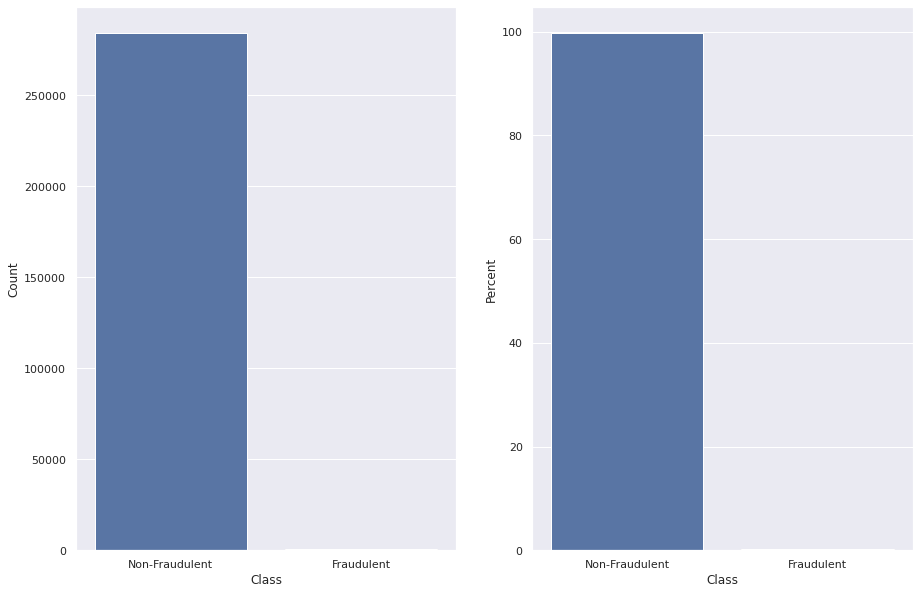

In [134]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
sns.set(style="darkgrid")
sns.barplot(x="Class",y='Count', data=df_count)

plt.subplot(1,2,2)
sns.set(style="darkgrid")
sns.barplot(x="Class",y='Percent', data=df_percent)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)

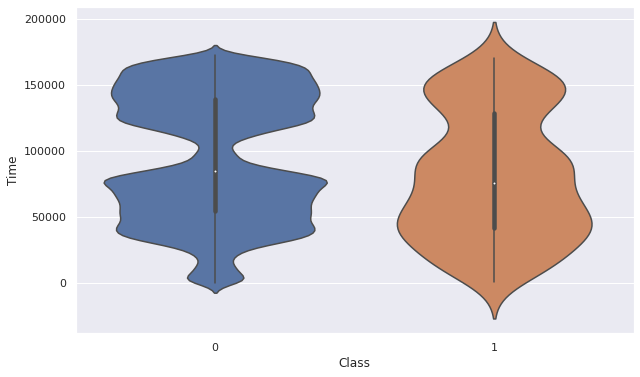

In [135]:
# Create a scatter plot to observe the distribution of classes with time
plt.figure(figsize=(10,6))

sns.set(style="darkgrid")
sns.violinplot(y = 'Time', x = 'Class', data = df)

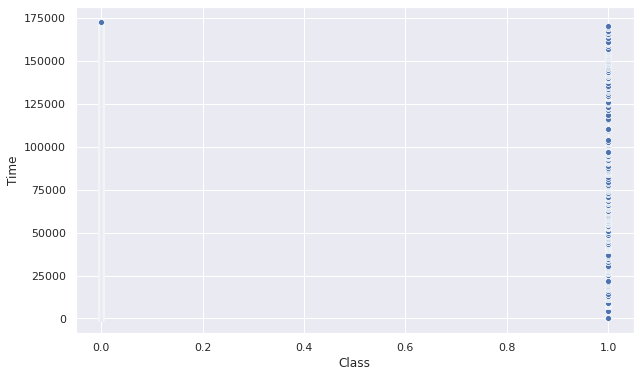

In [136]:
# Create a scatter plot to observe the distribution of classes with time
plt.figure(figsize=(10,6))

sns.set(style="darkgrid")
sns.scatterplot(y = 'Time', x = 'Class', data = df)

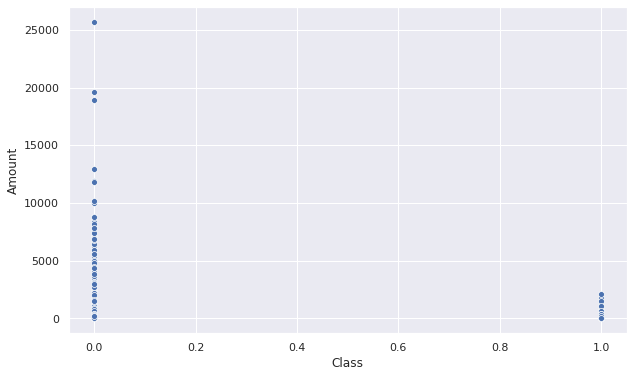

In [137]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.figure(figsize=(10,6))

sns.set(style="darkgrid")
sns.scatterplot(y = 'Amount', x = 'Class', data = df)

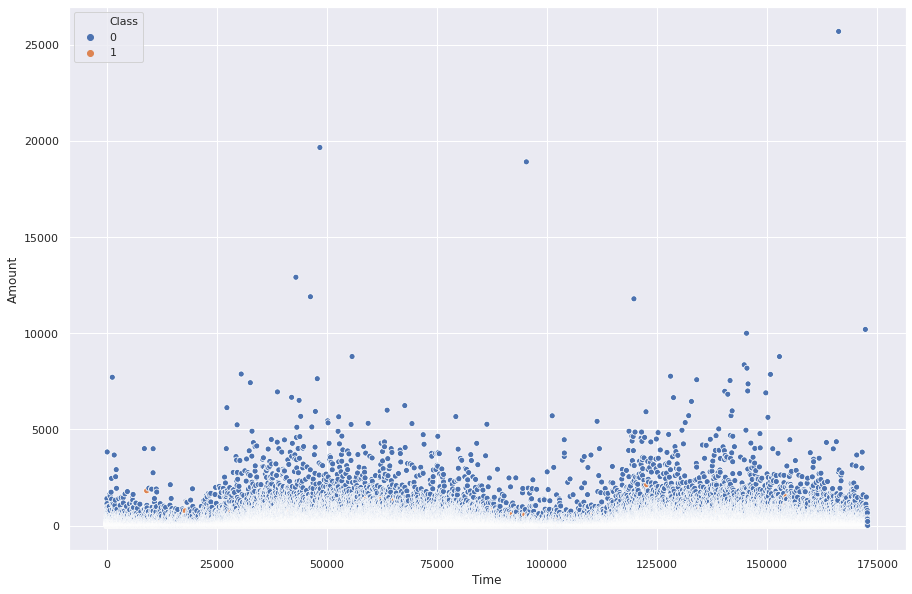

In [138]:
plt.figure(figsize=(15,10))

sns.set(style="darkgrid")
sns.scatterplot(y = 'Amount', x = 'Time',hue='Class', data = df)

In [139]:
# Drop unnecessary columns

#as the time provided is a relative column so its better to drop it
main_df=df.drop(['Time'],axis=1)

### Splitting the data into train & test data

In [140]:
y= main_df['Class']#class variable
X=main_df.drop(['Class'],axis=1)

In [141]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=100)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [142]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


### Plotting the distribution of a variable

In [143]:
# plot the histogram of a variable from the dataset to see the skewness

In [144]:
X_train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

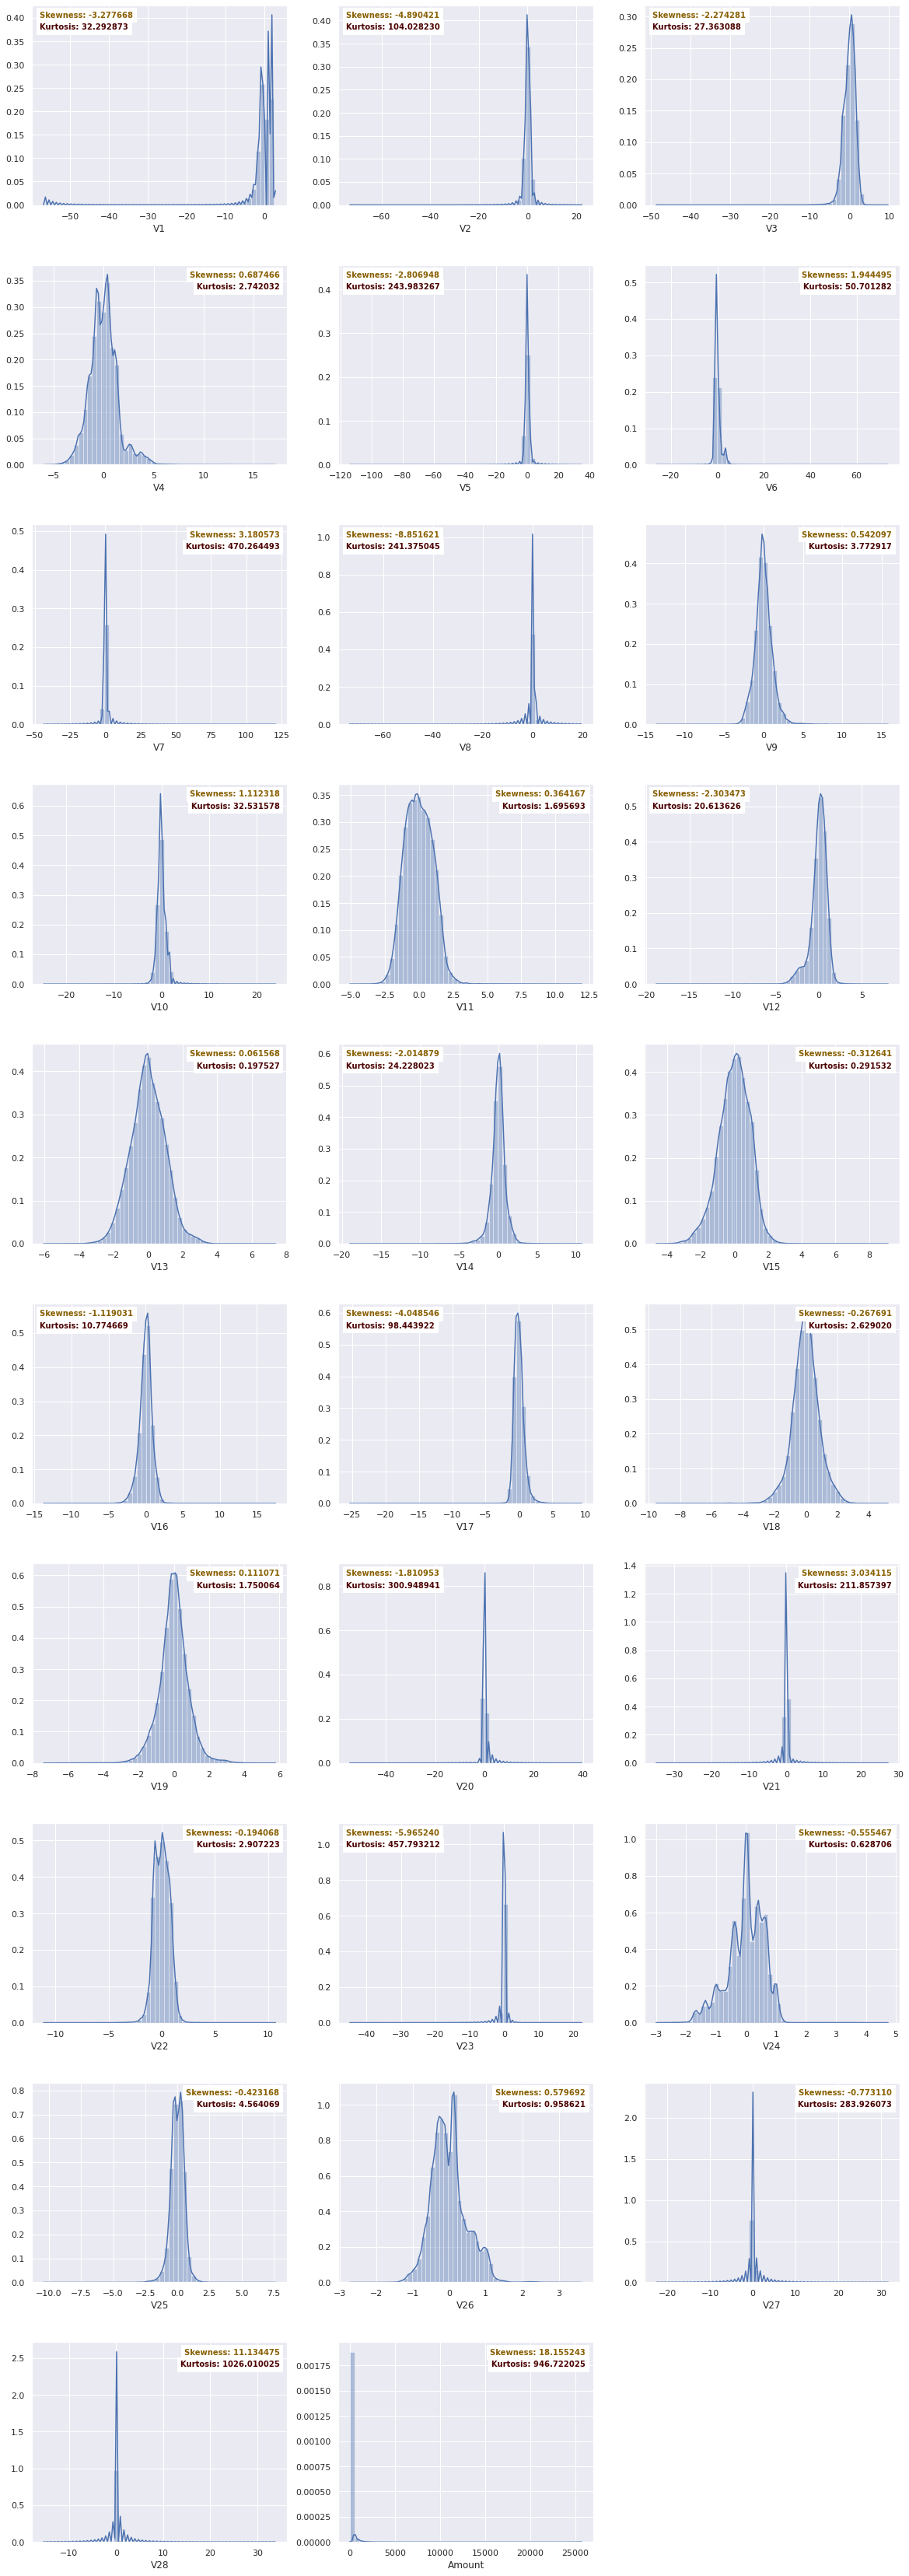

In [145]:
#inputs for subplot

only_vars=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

col_list=only_vars


#targetcol='Churn_Tag'
plot_df=X_train
numplots_eachrow=3
plot_data=plot_df[col_list]

# num plot calculations
numof_plots=[x+1 for x in range(0,len(col_list))]
col_rows=int(len(col_list)/numplots_eachrow)+1 if (len(col_list) % numplots_eachrow)!=0 else int(len(col_list)/numplots_eachrow)

#plot
plt.show()
ht=(len(numof_plots)%numplots_eachrow)+1
xfig=min(8*numplots_eachrow,15)
yfig=min(ht*8,15)

plt.figure(figsize=(20,60))
#f, axes = plt.subplots(col_rows,numplots_eachrow, sharex=True)

for i in numof_plots:
    numof_rows=col_rows
    numplots_echrow=numplots_eachrow
    subplot_num=i
    plt.subplot(numof_rows,numplots_echrow,subplot_num)
    g=sns.distplot(plot_df[col_list[i-1]])
    ax=g.axes
    check_val=plot_data.iloc[:,i-1].skew()

    if check_val<-1:
        ha='left'
        xval=0.03
    else:
        ha='right'
        xval=0.97

    stat, p = shapiro(plot_data.iloc[:,i-1])
    #print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.20
    if p > alpha:
          #print('Sample looks Gaussian (fail to reject H0)')
        gauss_var='Gaussian'
    else:
        #print('Sample does not look Gaussian (reject H0)')
        gauss_var='NOT Gaussian'

    ax.text(x=xval, y=0.97, transform=ax.transAxes, s="Skewness: %f" % plot_data.iloc[:,i-1].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment=ha,\
        backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=xval, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % plot_data.iloc[:,i-1].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment=ha,\
        backgroundcolor='white', color='xkcd:dried blood')
    # ax.text(x=xval, y=0.85, transform=ax.transAxes, s=gauss_var,\
    #     fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment=ha,\
    #     backgroundcolor='white', color='xkcd:poo brown')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [146]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

## Skewness Fix

In [147]:
# Using PowerTransformer to fix skewness, 
# we will be applying it to every variable as this will get applied if there is any skewness
pt = PowerTransformer(standardize=True,copy=False)
X_train_skew_df=pd.DataFrame(pt.fit_transform(X_train[col_list]))
X_train_skew_df.columns=col_list

In [148]:
# plot the histogram of a variable from the dataset again to see the result 

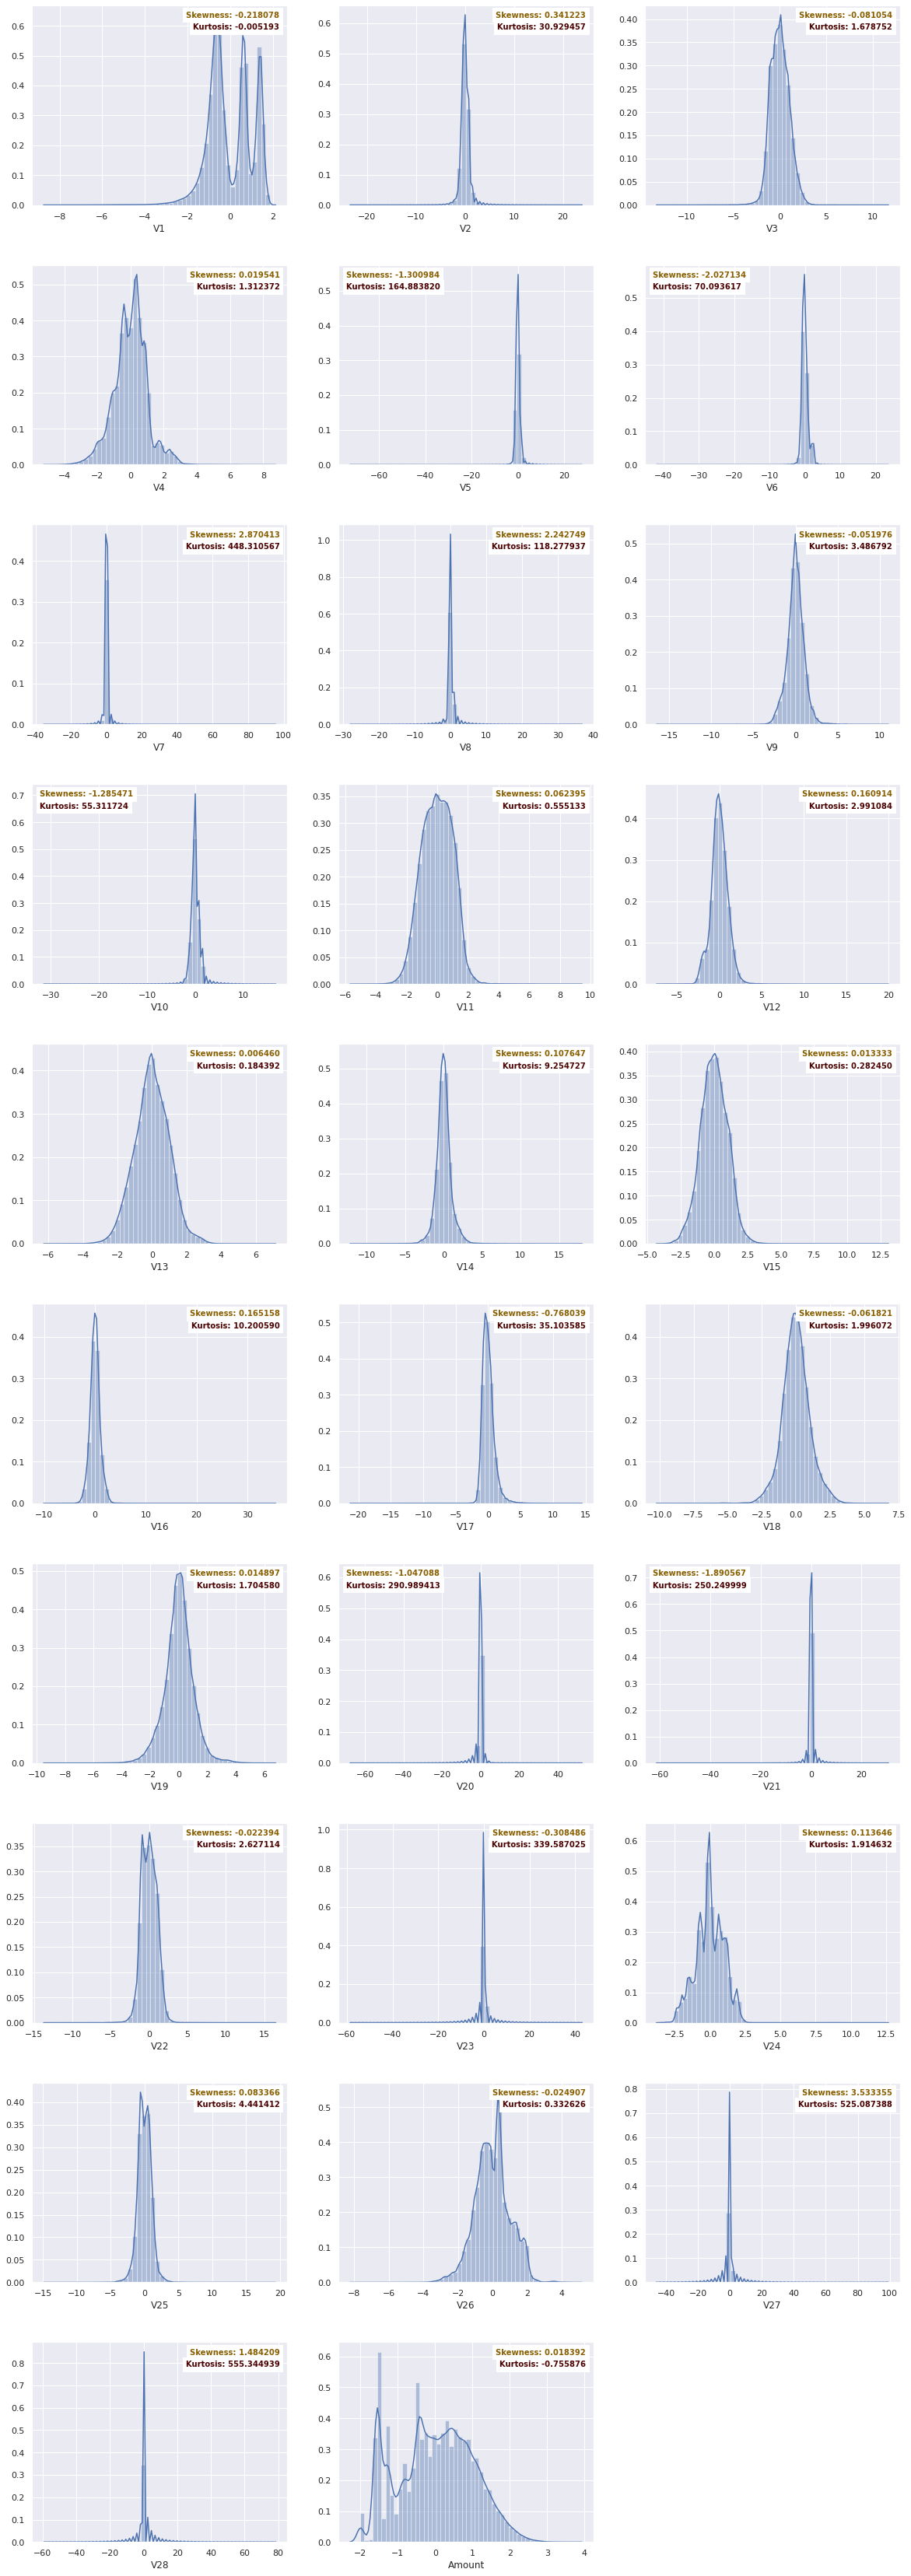

In [149]:
#inputs for subplot
col_list=only_vars
#targetcol='Churn_Tag'
plot_df=X_train_skew_df
numplots_eachrow=3
plot_data=plot_df[col_list]

# num plot calculations
numof_plots=[x+1 for x in range(0,len(col_list))]
col_rows=int(len(col_list)/numplots_eachrow)+1 if (len(col_list) % numplots_eachrow)!=0 else int(len(col_list)/numplots_eachrow)

#plot
plt.show()
ht=(len(numof_plots)%numplots_eachrow)+1
xfig=min(8*numplots_eachrow,15)
yfig=min(ht*8,15)

plt.figure(figsize=(20,60))
#f, axes = plt.subplots(col_rows,numplots_eachrow, sharex=True)

for i in numof_plots:
    numof_rows=col_rows
    numplots_echrow=numplots_eachrow
    subplot_num=i
    plt.subplot(numof_rows,numplots_echrow,subplot_num)
    g=sns.distplot(plot_df[col_list[i-1]])
    ax=g.axes
    check_val=plot_data.iloc[:,i-1].skew()

    if check_val<-1:
        ha='left'
        xval=0.03
    else:
        ha='right'
        xval=0.97

    stat, p = shapiro(plot_data.iloc[:,i-1])
    #print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.20
    if p > alpha:
        #print('Sample looks Gaussian (fail to reject H0)')
        gauss_var='Gaussian'
    else:
        #print('Sample does not look Gaussian (reject H0)')
        gauss_var='NOT Gaussian'

    ax.text(x=xval, y=0.97, transform=ax.transAxes, s="Skewness: %f" % plot_data.iloc[:,i-1].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment=ha,\
        backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=xval, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % plot_data.iloc[:,i-1].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment=ha,\
        backgroundcolor='white', color='xkcd:dried blood')
    # ax.text(x=xval, y=0.85, transform=ax.transAxes, s=gauss_var,\
    #     fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment=ha,\
    #     backgroundcolor='white', color='xkcd:poo brown')
    

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)

## Test dataset Transform

In [150]:
X_test_skew_df=pd.DataFrame(pt.transform(X_test[col_list]))
X_test_skew_df.columns=col_list

<br>

## Balancing scenarios

### Model building with balancing Classes

##### Perform class balancing with :
- With Skew Treatment and Without Balancing
- `With Skew Treatment and Balancing Via Random Over sampelling`
- With Balancing Via ADASYN
- With Balancing Via SMOTE

### With Skew Treatment and Without Balancing

In [151]:
#importing
from imblearn.over_sampling import RandomOverSampler

Using TensorFlow backend.


In [152]:
#initiation
ros=RandomOverSampler(sampling_strategy='minority',random_state=100)

In [153]:
#fit_resample
X_DS1_train_1,y_DS1_train_1=ros.fit_resample(X_train_skew_df,y_train)
y_DS1_train=pd.Series(y_DS1_train_1)
X_DS1_train=pd.DataFrame(X_DS1_train_1,columns=col_list)

In [154]:
classes=y_DS1_train.value_counts()
normal_share=classes[0]/y_DS1_train.count()*100
fraud_share=classes[1]/y_DS1_train.count()*100

print('Normal:',normal_share)
print('Fraud:',fraud_share)

Normal: 50.0
Fraud: 50.0


## Summary

In [155]:
print("With Skew Treatment and Balancing Via Random Over sampelling :(X_DS1_train,y_DS1_train)")
print(X_DS1_train.shape)
print(y_DS1_train.shape)

classes=y_DS1_train.value_counts()
normal_share=classes[0]/y_DS1_train.count()*100
fraud_share=classes[1]/y_DS1_train.count()*100

print('Ration(Fraud:Normal):',fraud_share,":",normal_share)
print('')


With Skew Treatment and Balancing Via Random Over sampelling :(X_DS1_train,y_DS1_train)
(454898, 29)
(454898,)
Ration(Fraud:Normal): 50.0 : 50.0



# Model Building
- Build different models on the imbalanced dataset and see the result

### Tabel Summary

In [156]:
#model summary dataframe
Model_Name=[]
Thresold=[]
Train_ROC_score=[]
Test_ROC_score=[]
Total_Savings=[]

TP=[]
FP=[]
TN=[]
FN=[]
    
col_nams1=['Model_Name','Thresold','Train_ROC_score','Test_ROC_score','Total_Savings','TP','FP','TN','FN']

#dataframe-1
df_Model_Summary=pd.DataFrame(list(zip(Model_Name,Thresold,Train_ROC_score,Test_ROC_score,Total_Savings,
                             TP,FP,TN,FN)),
                         columns=col_nams1)

#dataframe-1
def add_new_row(val_1,val_2,val_3,val_4,val_5,val_6,val_7,val_8,val_9,dataframe=df_Model_Summary):
    Model_Name=[str(val_1)]
    Thresold=[str(val_2)]
    Train_ROC_score=[str(val_3)]
    Test_ROC_score=[str(val_4)]
    Total_Savings=[str(val_5)]
    
    TP=[str(val_6)]
    FP=[str(val_7)]
    TN=[str(val_8)]
    FN=[str(val_9)]
    
    df=dataframe
    df=df.drop_duplicates()
    insert_at=df.shape[0]
    df.loc[insert_at]=Model_Name+Thresold+Train_ROC_score+Test_ROC_score+Total_Savings+TP+FP+TN+FN
    df=df.drop_duplicates()
    return(df)
    

### Using hyperopt Tuning

In [157]:
# !pip install hyperopt

In [158]:
#import
from hyperopt import fmin,tpe,hp,STATUS_OK,Trials

### Stratifed Kfold

In [159]:
#import
from sklearn.model_selection import StratifiedKFold

In [160]:
#initiate
skfold=StratifiedKFold(n_splits=5,shuffle=False,random_state=100)

### ROC Curve

In [161]:
#ROC function
from sklearn import metrics
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    #return fpr, tpr, thresholds

## Randon Forest

### Hyperopt Tuning

In [162]:
%%time

X_trn=X_DS1_train
y_trn=y_DS1_train

X_tst=X_test_skew_df
y_tst=y_test

#defining
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
def hyperopt_train_test(params):
    clf=RandomForestClassifier(**params)
    crossvalscore=cross_val_score(clf,X_trn,y_trn,n_jobs=-1,cv=5,
              scoring= 'roc_auc').mean()
    return(crossvalscore)

rf_space={
    'max_depth':hp.choice('max_depth',range(8,16)),
    'max_features':hp.choice('max_features',range(1,15)),
    'criterion': hp.choice('criterion', ["gini", "entropy"]),
    'n_estimators': hp.choice('n_estimators', range(50,160,10)),
    'min_samples_split':hp.uniform('min_samples_split', 0, 1)
    
}

rf_best=0

def f(params):
    global rf_best
    acc=hyperopt_train_test(params)
    if acc>rf_best:
        rf_best=acc
        print('new best:', rf_best, params)
    return {'loss': -acc, 'status': STATUS_OK}

rf_trials=Trials()
rf_best=fmin(f,rf_space,algo=tpe.suggest,max_evals=30,trials=rf_trials)


from hyperopt import space_eval
rf_best_params=space_eval(rf_space, rf_best)
print('Best:',rf_best_params)

new best:                                             
0.9855335717989488                                    
{'criterion': 'entropy', 'max_depth': 13, 'max_features': 3, 'min_samples_split': 0.2356063413656282, 'n_estimators': 150}
new best:                                                                        
0.9881006440088834                                                               
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 13, 'min_samples_split': 0.2121877339391558, 'n_estimators': 50}
new best:                                                                         
0.9987417291352545                                                                
{'criterion': 'entropy', 'max_depth': 13, 'max_features': 4, 'min_samples_split': 0.020671966075346382, 'n_estimators': 100}
new best:                                                                         
0.9999836320944425                                                                
{'criterion': 'entropy'

### Best Parameters

In [163]:
# rf_best_params={'criterion': 'entropy', 'max_depth': 10,
#                 'max_features': 12, 'min_samples_split': 0.041454835625729824, 
#                 'n_estimators': 90}

In [164]:
rf_best_params

{'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 4,
 'min_samples_split': 0.004317382510617026,
 'n_estimators': 60}

### CV Score

In [165]:
%%time

X_trn=X_DS1_train
y_trn=y_DS1_train

X_tst=X_test_skew_df
y_tst=y_test

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

#initiate
skfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=100)
rf_clf=RandomForestClassifier(**rf_best_params)

rf_crossvalscore=cross_val_score(rf_clf,X_trn,y_trn,n_jobs=-1,cv=skfold,
            scoring= 'roc_auc')

CPU times: user 96 ms, sys: 64 ms, total: 160 ms
Wall time: 1min 22s


In [166]:
rf_crossvalscore

array([0.9999614 , 0.99998634, 0.99998721, 0.9999922 , 0.99996961])

### Final Fit

In [167]:
%%time
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(**rf_best_params)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 58.9 µs


In [168]:
%%time
rf_clf.fit(X_trn,y_trn)

CPU times: user 1min 35s, sys: 8 ms, total: 1min 35s
Wall time: 1min 35s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=12, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1,
                       min_samples_split=0.004317382510617026,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [169]:
%%time
y_pred_trn_rf_lst = rf_clf.predict_proba(X_trn)
y_pred_trn_rf=[x[1] for x in y_pred_trn_rf_lst]

CPU times: user 2.3 s, sys: 16 ms, total: 2.31 s
Wall time: 2.31 s


In [170]:
#declaring
y_t=y_trn
y_p=y_pred_trn_rf

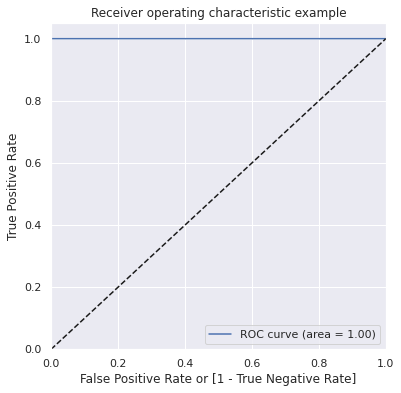

In [171]:
draw_roc( y_t, y_p )

In [172]:
Train_AUC=metrics.roc_auc_score(y_t,y_p)
print('Train auc =', metrics.roc_auc_score(y_t,y_p))
fpr, tpr, thresholds = metrics.roc_curve(y_t,y_p)
threshold = thresholds[np.argmax(tpr-fpr)]
print('Best Threshold=%f'%threshold)

train_threshold=threshold

Train auc = 0.999994217139452
Best Threshold=0.526900


### Evaluation on Test Set

In [173]:
%%time
y_pred_tst_rf_lst = rf_clf.predict_proba(X_tst)
y_pred_tst_rf=[x[1] for x in y_pred_tst_rf_lst]

CPU times: user 284 ms, sys: 0 ns, total: 284 ms
Wall time: 282 ms


### ROC Curve

In [174]:
#declaring
y_t=y_tst
y_p=y_pred_tst_rf

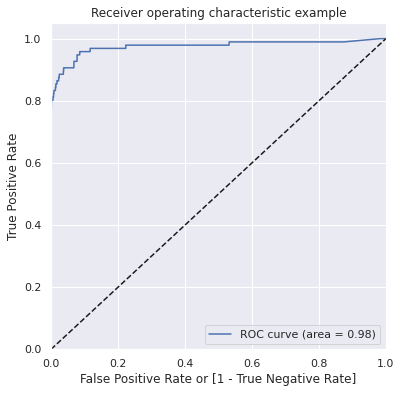

In [175]:
draw_roc( y_t, y_p )

In [176]:
from sklearn.metrics import roc_curve
from numpy import argmax
Test_AUC=metrics.roc_auc_score(y_t,y_p)
print('Test auc =', metrics.roc_auc_score(y_t,y_p))

Test auc = 0.9752882141056753


In [177]:

#creating new dataframe with predections and actual values
CFM_final = pd.DataFrame({'Actual':y_test, 'Predict_Prob':y_p})
CFM_final['Predict_Prob'] = y_p
CFM_final['Amount']=X_test['Amount']
CFM_final['Amount_Cost_Coeff']=0
CFM_final['Call_Cost_Coeff']=0


prob_i=round(train_threshold,4)
print('Thresold:-',prob_i)

CFM_final['Predicted'] = CFM_final.Predict_Prob.map(lambda x: 1 if x > prob_i else 0)
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==0)]=0
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==0)]=-1
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==1)]=0
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==1)]=1

CFM_final.Call_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==0)]=0
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==0)]=0
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==1)]=-10
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==1)]=-10

CFM_final['Amount_cal']=CFM_final['Amount_Cost_Coeff']*CFM_final['Amount']

Amount_ontransac=sum(list(CFM_final['Amount_cal']))
Amount_oncalls=sum(list(CFM_final['Call_Cost_Coeff']))
Total_amount_saved=(Amount_ontransac+Amount_oncalls)

#print(Amount_ontransac)
#print(Amount_oncalls)
print(Total_amount_saved)
CFM_final.head()

Thresold:- 0.5269
6173.990000000001


Actual  Predict_Prob  Amount  Amount_Cost_Coeff  Call_Cost_Coeff  \
49089        0      0.023333    1.99                  0                0   
154704       0      0.017627    6.99                  0                0   
67247        0      0.000247  306.16                  0                0   
251657       0      0.001149    0.99                  0                0   
201903       0      0.328408   30.27                  0                0   

        Predicted  Amount_cal  
49089           0         0.0  
154704          0         0.0  
67247           0         0.0  
251657          0         0.0  
201903          0         0.0

In [178]:
#metrics
confusion_rfelog=metrics.confusion_matrix(CFM_final.Actual, CFM_final.Predicted )
TP = confusion_rfelog[1,1] # true positive 
TN = confusion_rfelog[0,0] # true negatives
FP = confusion_rfelog[0,1] # false positives
FN = confusion_rfelog[1,0] # false negatives

print('TP:',TP)
print('TN:',TN)
print('FP:',FP)
print('FN:',FN)

TP: 75
TN: 56831
FP: 35
FN: 21


### Classification Report

In [179]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

print(confusion_matrix(CFM_final.Actual, CFM_final.Predicted))
print('\n')

print(classification_report(CFM_final.Actual, CFM_final.Predicted))

[[56831    35]
 [   21    75]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.68      0.78      0.73        96

    accuracy                           1.00     56962
   macro avg       0.84      0.89      0.86     56962
weighted avg       1.00      1.00      1.00     56962



### Summary

In [180]:
#template
Model_Name='Random Forest'
Thresold=round(train_threshold,4)
Train_ROC_score=round(Train_AUC,4)
Test_ROC_score=round(Test_AUC,4)
Total_Savings=round(Total_amount_saved,2)

TP=TP
FP=FP
TN=TN
FN=FN


df_Model_Summary=add_new_row(Model_Name,Thresold,Train_ROC_score,Test_ROC_score,Total_Savings,
                             TP,FP,TN,FN,df_Model_Summary)
df_Model_Summary

Model_Name Thresold Train_ROC_score Test_ROC_score Total_Savings  TP  \
0  Random Forest   0.5269             1.0         0.9753       6173.99  75   

   FP     TN  FN  
0  35  56831  21

## XGBoost

### Hyperopt Tuning

In [181]:
%%time

X_trn=X_DS1_train
y_trn=y_DS1_train

X_tst=X_test_skew_df
y_tst=y_test

#import
from hyperopt import fmin,tpe,hp,STATUS_OK,Trials

#defining
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
import xgboost as xgb

xgb_space = {
    'booster '    : 'gbtree',       
    'objective'   : 'binary:logistic',
    'eval_metric' : 'auc',
    'max_depth' : hp.choice('max_depth', range(5, 20, 1)),
    'learning_rate' : hp.quniform('learning_rate', 0.01, 0.5, 0.01),
    'n_estimators' : hp.choice('n_estimators', range(200, 2100, 100)),
    'gamma' : hp.quniform('gamma', 0, 0.50, 0.01),
    'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
    'subsample' : hp.quniform('subsample', 0.1, 1, 0.01),
    'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1.0, 0.01),
    'reg_lambda' : hp.uniform ('reg_lambda', 0,1)
    }

xgb_train = xgb.DMatrix(X_trn.values, y_trn.values)
xgb_eval  = xgb.DMatrix(X_tst.values, y_tst.values)

def hyperopt_train_test(params):

    train_=xgb_train

    xgb_clf = xgb.cv(params,
                   train_,
                   nfold=5,
                   num_boost_round=2000,
                   early_stopping_rounds=20,
                   verbose_eval=False,
                   shuffle=True,
                   stratified=True)

    crossvalscore=list(xgb_clf['test-auc-mean'])[-1]
    return(crossvalscore)


xgb_best=0


def f(params):
    global xgb_best
    acc=hyperopt_train_test(params)
    if acc>xgb_best:
        xgb_best=acc
        print('new best:', xgb_best, params)
    return {'loss': -acc, 'status': STATUS_OK}

xgb_trials=Trials()
xgb_best=fmin(f,xgb_space,algo=tpe.suggest,max_evals=50,trials=xgb_trials)



from hyperopt import space_eval

xgb_best_params=space_eval(xgb_space, xgb_best)
print('Best:',space_eval(xgb_space, xgb_best))

new best:                                             
0.9999862                                             
{'booster ': 'gbtree', 'colsample_bytree': 0.7000000000000001, 'eval_metric': 'auc', 'gamma': 0.39, 'learning_rate': 0.08, 'max_depth': 14, 'min_child_weight': 9.0, 'n_estimators': 1100, 'objective': 'binary:logistic', 'reg_lambda': 0.917295947396085, 'subsample': 0.91}
new best:                                                                  
0.999991                                                                   
{'booster ': 'gbtree', 'colsample_bytree': 0.5, 'eval_metric': 'auc', 'gamma': 0.07, 'learning_rate': 0.17, 'max_depth': 7, 'min_child_weight': 9.0, 'n_estimators': 1800, 'objective': 'binary:logistic', 'reg_lambda': 0.956014879056314, 'subsample': 0.97}
new best:                                                                  
0.9999922                                                                 
{'booster ': 'gbtree', 'colsample_bytree': 0.44, 'eval_metric

### Best Parameters

In [182]:
# xgb_best_params={'booster': 'gbtree', 'colsample_bytree': 0.84,
#             'eval_metric': 'auc', 'gamma': 0.13, 
#             'learning_rate': 0.07, 'max_depth': 19,
#             'min_child_weight': 5.0, 'n_estimators': 1500,
#             'objective': 'binary:logistic', 'reg_lambda': 0.001, 'subsample': 0.47}

In [183]:
xgb_best_params

{'booster ': 'gbtree',
 'colsample_bytree': 0.17,
 'eval_metric': 'auc',
 'gamma': 0.19,
 'learning_rate': 0.08,
 'max_depth': 16,
 'min_child_weight': 1.0,
 'n_estimators': 1900,
 'objective': 'binary:logistic',
 'reg_lambda': 0.3667140084201975,
 'subsample': 0.73}

### CV Score

In [ ]:
%%time

X_trn=X_DS1_train
y_trn=y_DS1_train

X_tst=X_test_skew_df
y_tst=y_test

#initiate
skfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=100)

from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score


xgb_clf = xgb.XGBClassifier(**xgb_best_params)

xgb_crossvalscore = cross_val_score(xgb_clf, X_trn, y_trn, cv=skfold,scoring= 'roc_auc')

print("AUC: %.2f%% (%.2f%%)" % (xgb_crossvalscore.mean()*100, xgb_crossvalscore.std()*100))

In [ ]:
xgb_crossvalscore

### Fit

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score
xgb_clf = xgb.XGBClassifier(**xgb_best_params)

In [ ]:
%%time
xgb_clf.fit(X_trn,y_trn)

In [ ]:
%%time
y_pred_trn_xgb_lst = xgb_clf.predict_proba(X_trn)
y_pred_trn_xgb=[x[1] for x in y_pred_trn_xgb_lst]

In [ ]:
y_t=y_trn
y_p=y_pred_trn_xgb

In [ ]:
draw_roc( y_t, y_p )

In [ ]:
Train_AUC=metrics.roc_auc_score(y_t,y_p)
print('Train auc =', metrics.roc_auc_score(y_t,y_p))
fpr, tpr, thresholds = metrics.roc_curve(y_t,y_p)
threshold = thresholds[np.argmax(tpr-fpr)]
print('Best Threshold=%f'%threshold)

train_threshold=threshold

### Evaluation on Test Set

In [ ]:
%%time
y_pred_tst_xgb_lst = xgb_clf.predict_proba(X_tst)
y_pred_tst_xgb=[x[1] for x in y_pred_tst_xgb_lst]

### ROC Curve

In [ ]:
#declaring
y_t=y_tst
y_p=y_pred_tst_xgb

In [ ]:
draw_roc( y_t, y_p )

In [ ]:
from sklearn.metrics import roc_curve
from numpy import argmax

Test_AUC=metrics.roc_auc_score(y_t,y_p)
print('Test auc =', metrics.roc_auc_score(y_t,y_p))

In [ ]:

#creating new dataframe with predections and actual values
CFM_final = pd.DataFrame({'Actual':y_test, 'Predict_Prob':y_p})
CFM_final['Predict_Prob'] = y_p
CFM_final['Amount']=X_test['Amount']
CFM_final['Amount_Cost_Coeff']=0
CFM_final['Call_Cost_Coeff']=0


prob_i=round(train_threshold,4)
print('Thresold:-',prob_i)

CFM_final['Predicted'] = CFM_final.Predict_Prob.map(lambda x: 1 if x > prob_i else 0)
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==0)]=0
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==0)]=-1
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==1)]=0
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==1)]=1

CFM_final.Call_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==0)]=0
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==0)]=0
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==1)]=-10
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==1)]=-10

CFM_final['Amount_cal']=CFM_final['Amount_Cost_Coeff']*CFM_final['Amount']

Amount_ontransac=sum(list(CFM_final['Amount_cal']))
Amount_oncalls=sum(list(CFM_final['Call_Cost_Coeff']))
Total_amount_saved=(Amount_ontransac+Amount_oncalls)

#print(Amount_ontransac)
#print(Amount_oncalls)
print(Total_amount_saved)
CFM_final.head()

In [ ]:
#metrics
confusion_rfelog=metrics.confusion_matrix(CFM_final.Actual, CFM_final.Predicted )
TP = confusion_rfelog[1,1] # true positive 
TN = confusion_rfelog[0,0] # true negatives
FP = confusion_rfelog[0,1] # false positives
FN = confusion_rfelog[1,0] # false negatives

print('TP:',TP)
print('TN:',TN)
print('FP:',FP)
print('FN:',FN)

### Classification Report

In [ ]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

print(confusion_matrix(CFM_final.Actual, CFM_final.Predicted))
print('\n')

print(classification_report(CFM_final.Actual, CFM_final.Predicted))

### Summary

In [ ]:
#template
Model_Name='XGBoost'
Thresold=round(train_threshold,4)
Train_ROC_score=round(Train_AUC,4)
Test_ROC_score=round(Test_AUC,4)
Total_Savings=round(Total_amount_saved,2)

TP=TP
FP=FP
TN=TN
FN=FN


df_Model_Summary=add_new_row(Model_Name,Thresold,Train_ROC_score,Test_ROC_score,Total_Savings,
                             TP,FP,TN,FN,df_Model_Summary)
df_Model_Summary

## Logistic Model

In [ ]:
import statsmodels.api as sm

In [ ]:
#storing column names

X_trn=X_DS1_train
y_trn=y_DS1_train

X_tst=X_test_skew_df
y_tst=y_test

cols_model=X_trn.columns

In [ ]:
#model
logm1=sm.GLM(y_trn,(sm.add_constant(X_trn[cols_model])),family=sm.families.Binomial())
logm1.fit().summary()

In [ ]:
#removing columns based on p-value
remove_columns=['V23','V25']
cols_model=list(cols_model)
for x in remove_columns:
    cols_model.remove(x)

In [ ]:
#model
logm2=sm.GLM(y_trn,(sm.add_constant(X_trn[cols_model])),family=sm.families.Binomial())
logm2.fit().summary()

### Hyperopt Tuning

In [ ]:
%%time

#initiate
skfold=StratifiedKFold(n_splits=5,shuffle=False,random_state=100)

X_trn=X_DS1_train
y_trn=y_DS1_train

X_tst=X_test_skew_df
y_tst=y_test


#defining
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
def hyperopt_train_test(params):
    clf=LogisticRegression(**params)
    crossvalscore=cross_val_score(clf,X_trn[cols_model],y_trn,n_jobs=-1,cv=skfold,
              scoring= 'roc_auc').mean()
    return(crossvalscore)

lr_space={
    'penalty': hp.choice('penalty', ["l1", "l2"]),
    'solver': hp.choice('solver', ['liblinear']),
    'C':hp.uniform('C', .0001, 1000)
}

lr_best=0

def f(params):
    global lr_best
    acc=hyperopt_train_test(params)
    acc= float("{0:.8f}".format(acc))
    if acc>lr_best:
        lr_best=acc
        print('new best:', lr_best, params)
    return {'loss': -acc, 'status': STATUS_OK}

lr_trials=Trials()
lr_best=fmin(f,lr_space,algo=tpe.suggest,max_evals=100,trials=lr_trials)
from hyperopt import space_eval

lr_best_params=space_eval(lr_space, lr_best)
print('Best:',space_eval(lr_space, lr_best))

### Best Parameters

In [ ]:
lr_best_params

## CV

In [ ]:
%%time

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

skfold=StratifiedKFold(n_splits=5,shuffle=False,random_state=100)

lr_clf=LogisticRegression(**lr_best_params)
crossvalscore=cross_val_score(lr_clf,X_trn[cols_model],y_trn,n_jobs=-1,cv=skfold,
          scoring= 'roc_auc')

In [ ]:
crossvalscore

## Fit

In [ ]:
lr_clf=LogisticRegression(**lr_best_params)

In [ ]:
%%time
lr_clf.fit(X_trn[cols_model],y_trn)

In [ ]:
%%time
y_pred_trn_lr_lst = lr_clf.predict_proba(X_trn[cols_model])
y_pred_trn_lr=[x[1] for x in y_pred_trn_lr_lst]

In [ ]:
y_t=y_trn
y_p=y_pred_trn_lr

In [ ]:
draw_roc( y_t, y_p )

In [ ]:
Train_AUC=metrics.roc_auc_score(y_t,y_p)
print('Train auc =', metrics.roc_auc_score(y_t,y_p))
fpr, tpr, thresholds = metrics.roc_curve(y_t,y_p)
threshold = thresholds[np.argmax(tpr-fpr)]
print('Best Threshold=%f'%threshold)

train_threshold=threshold

### Evaluation on Test Set

In [ ]:
%%time
y_pred_tst_lr_lst = lr_clf.predict_proba(X_tst[cols_model])
y_pred_tst_lr=[x[1] for x in y_pred_tst_lr_lst]

### ROC Curve

In [ ]:
y_t=y_test
y_p=y_pred_tst_lr

In [ ]:
draw_roc( y_t, y_p )

In [ ]:
from sklearn.metrics import roc_curve
from numpy import argmax

Test_AUC=metrics.roc_auc_score(y_t,y_p)
print('Test auc =', metrics.roc_auc_score(y_t,y_p))

### Cost-Benfit Analysis

In [ ]:

#creating new dataframe with predections and actual values
CFM_final = pd.DataFrame({'Actual':y_test, 'Predict_Prob':y_p})
CFM_final['Predict_Prob'] = y_p
CFM_final['Amount']=X_test['Amount']
CFM_final['Amount_Cost_Coeff']=0
CFM_final['Call_Cost_Coeff']=0


prob_i=round(train_threshold,4)
print('Thresold:-',prob_i)

CFM_final['Predicted'] = CFM_final.Predict_Prob.map(lambda x: 1 if x > prob_i else 0)
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==0)]=0
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==0)]=-1
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==1)]=0
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==1)]=1

CFM_final.Call_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==0)]=0
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==0)]=0
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==1)]=-10
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==1)]=-10

CFM_final['Amount_cal']=CFM_final['Amount_Cost_Coeff']*CFM_final['Amount']

Amount_ontransac=sum(list(CFM_final['Amount_cal']))
Amount_oncalls=sum(list(CFM_final['Call_Cost_Coeff']))
Total_amount_saved=(Amount_ontransac+Amount_oncalls)

#print(Amount_ontransac)
#print(Amount_oncalls)
print(Total_amount_saved)
CFM_final.head()

In [ ]:
#metrics
confusion_rfelog=metrics.confusion_matrix(CFM_final.Actual, CFM_final.Predicted )
TP = confusion_rfelog[1,1] # true positive 
TN = confusion_rfelog[0,0] # true negatives
FP = confusion_rfelog[0,1] # false positives
FN = confusion_rfelog[1,0] # false negatives

print('TP:',TP)
print('TN:',TN)
print('FP:',FP)
print('FN:',FN)

### Classification Report

In [ ]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

print(confusion_matrix(CFM_final.Actual, CFM_final.Predicted))
print('\n')

print(classification_report(CFM_final.Actual, CFM_final.Predicted))

### Summary

In [ ]:
#template
Model_Name='Logistic'
Thresold=round(train_threshold,4)
Train_ROC_score=round(Train_AUC,4)
Test_ROC_score=round(Test_AUC,4)
Total_Savings=round(Total_amount_saved,2)


TP=TP
FP=FP
TN=TN
FN=FN


df_Model_Summary=add_new_row(Model_Name,Thresold,Train_ROC_score,Test_ROC_score,Total_Savings,
                             TP,FP,TN,FN,df_Model_Summary)
df_Model_Summary

## Ensemble

In [ ]:
lst_1=y_pred_trn_rf
lst_2=y_pred_trn_xgb
lst_3=y_pred_trn_lr

zip_list = zip(lst_1,lst_2,lst_3) 
y_pred_trn_ensmbl = list(map(np.mean, zip_list))

In [ ]:
y_t=y_trn
y_p=y_pred_trn_ensmbl

In [ ]:
draw_roc( y_t, y_p )

In [ ]:
Train_AUC=metrics.roc_auc_score(y_t,y_p)
print('Train auc =', metrics.roc_auc_score(y_t,y_p))
fpr, tpr, thresholds = metrics.roc_curve(y_t,y_p)
threshold = thresholds[np.argmax(tpr-fpr)]
print('Best Threshold=%f'%threshold)

train_threshold=threshold

### Evaluation on Test Set

In [ ]:
lst_1=y_pred_tst_rf
lst_2=y_pred_tst_xgb
lst_3=y_pred_tst_lr

zip_list = zip(lst_1,lst_2,lst_3) 
y_pred_tst_ensmbl = list(map(np.mean, zip_list))

In [ ]:
y_t=y_test
y_p=y_pred_tst_ensmbl

In [ ]:
draw_roc( y_t, y_p )

In [ ]:
from sklearn.metrics import roc_curve
from numpy import argmax

Test_AUC=metrics.roc_auc_score(y_t,y_p)
print('Test auc =', metrics.roc_auc_score(y_t,y_p))

### Cost-Benfit Analysis

In [ ]:

#creating new dataframe with predections and actual values
CFM_final = pd.DataFrame({'Actual':y_test, 'Predict_Prob':y_p})
CFM_final['Predict_Prob'] = y_p
CFM_final['Amount']=X_test['Amount']
CFM_final['Amount_Cost_Coeff']=0
CFM_final['Call_Cost_Coeff']=0


prob_i=round(train_threshold,4)
print('Thresold:-',prob_i)

CFM_final['Predicted'] = CFM_final.Predict_Prob.map(lambda x: 1 if x > prob_i else 0)
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==0)]=0
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==0)]=-1
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==1)]=0
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==1)]=1

CFM_final.Call_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==0)]=0
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==0)]=0
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==1)]=-10
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==1)]=-10

CFM_final['Amount_cal']=CFM_final['Amount_Cost_Coeff']*CFM_final['Amount']

Amount_ontransac=sum(list(CFM_final['Amount_cal']))
Amount_oncalls=sum(list(CFM_final['Call_Cost_Coeff']))
Total_amount_saved=(Amount_ontransac+Amount_oncalls)

#print(Amount_ontransac)
#print(Amount_oncalls)
print(Total_amount_saved)
CFM_final.head()

In [ ]:
#metrics
confusion_rfelog=metrics.confusion_matrix(CFM_final.Actual, CFM_final.Predicted )
TP = confusion_rfelog[1,1] # true positive 
TN = confusion_rfelog[0,0] # true negatives
FP = confusion_rfelog[0,1] # false positives
FN = confusion_rfelog[1,0] # false negatives

print('TP:',TP)
print('TN:',TN)
print('FP:',FP)
print('FN:',FN)

### Classification Report

In [ ]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

print(confusion_matrix(CFM_final.Actual, CFM_final.Predicted))
print('\n')

print(classification_report(CFM_final.Actual, CFM_final.Predicted))

### Summary

In [ ]:
#template
Model_Name='Ensemble_Mean'
Thresold=round(train_threshold,4)
Train_ROC_score=round(Train_AUC,4)
Test_ROC_score=round(Test_AUC,4)
Total_Savings=round(Total_amount_saved,2)

TP=TP
FP=FP
TN=TN
FN=FN


df_Model_Summary=add_new_row(Model_Name,Thresold,Train_ROC_score,Test_ROC_score,Total_Savings,
                             TP,FP,TN,FN,df_Model_Summary)
df_Model_Summary

In [ ]:
df_Model_Summary

In [ ]:
#df_Model_Summary.to_csv('df_Model_Summary_ros',index=False)

### Print the important features of the best model to understand the dataset

In [ ]:
clf=xgb_clf

var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-17 and Index-12 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.values[np.where(y_train==1.0)]
X_train_0 = X_train.values[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

<br>

<br>

## SMOTE

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import sklearn
import math

from scipy.stats import shapiro
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler


from sklearn.model_selection import train_test_split

In [ ]:
np.linspace(0.1, 1.0, 10, endpoint=True)

## Exploratory data analysis

In [ ]:
df = pd.read_csv('creditcard.csv')
df.head()

In [ ]:
#observe the different feature type present in the data

df.info()

In [ ]:
df.describe().T

### Amount==0

In [ ]:
df[(df.Amount==0)&(df.Class==1)].shape

In [ ]:
df.shape

In [ ]:
df[~((df.Amount==0)&(df.Class==1))].shape

`Observation:-There are 31 fraud cases with 0 transcation value. There can be various reasons for this like may be this was done to collect card information.`<br> `we will be considering these cases as frauds as reported by customer`

Here we will observe the distribution of our classes

In [ ]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print('normal_share:',normal_share)
print('fraud_share:',fraud_share)

In [ ]:
class_lst=['Non-Fraudulent', 'Fraudulent']
share_lst=[normal_share,fraud_share]
col_names=['Class','Percent']
df_percent=pd.DataFrame(data=list(zip(class_lst,share_lst)),columns=col_names)


normal_count=df[df.Class==0]['Class'].count()
fraud_count=df[df.Class==1]['Class'].count()
class_lst=['Non-Fraudulent', 'Fraudulent']
share_lst=[normal_count,fraud_count]
col_names=['Class','Count']

df_count=pd.DataFrame(data=list(zip(class_lst,share_lst)),columns=col_names)

In [ ]:
df_percent

In [ ]:
df_count

In [ ]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
sns.set(style="darkgrid")
sns.barplot(x="Class",y='Count', data=df_count)

plt.subplot(1,2,2)
sns.set(style="darkgrid")
sns.barplot(x="Class",y='Percent', data=df_percent)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)

In [ ]:
# Create a scatter plot to observe the distribution of classes with time
plt.figure(figsize=(10,6))

sns.set(style="darkgrid")
sns.violinplot(y = 'Time', x = 'Class', data = df)

In [ ]:
# Create a scatter plot to observe the distribution of classes with time
plt.figure(figsize=(10,6))

sns.set(style="darkgrid")
sns.scatterplot(y = 'Time', x = 'Class', data = df)

In [ ]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.figure(figsize=(10,6))

sns.set(style="darkgrid")
sns.scatterplot(y = 'Amount', x = 'Class', data = df)

In [ ]:
plt.figure(figsize=(15,10))

sns.set(style="darkgrid")
sns.scatterplot(y = 'Amount', x = 'Time',hue='Class', data = df)

In [ ]:
# Drop unnecessary columns

#as the time provided is a relative column so its better to drop it
main_df=df.drop(['Time'],axis=1)

### Splitting the data into train & test data

In [ ]:
y= main_df['Class']#class variable
X=main_df.drop(['Class'],axis=1)

In [ ]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=100)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [ ]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

### Plotting the distribution of a variable

In [ ]:
# plot the histogram of a variable from the dataset to see the skewness

In [ ]:
X_train.columns

In [ ]:
#inputs for subplot

only_vars=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

col_list=only_vars


#targetcol='Churn_Tag'
plot_df=X_train
numplots_eachrow=3
plot_data=plot_df[col_list]

# num plot calculations
numof_plots=[x+1 for x in range(0,len(col_list))]
col_rows=int(len(col_list)/numplots_eachrow)+1 if (len(col_list) % numplots_eachrow)!=0 else int(len(col_list)/numplots_eachrow)

#plot
plt.show()
ht=(len(numof_plots)%numplots_eachrow)+1
xfig=min(8*numplots_eachrow,15)
yfig=min(ht*8,15)

plt.figure(figsize=(20,60))
#f, axes = plt.subplots(col_rows,numplots_eachrow, sharex=True)

for i in numof_plots:
    numof_rows=col_rows
    numplots_echrow=numplots_eachrow
    subplot_num=i
    plt.subplot(numof_rows,numplots_echrow,subplot_num)
    g=sns.distplot(plot_df[col_list[i-1]])
    ax=g.axes
    check_val=plot_data.iloc[:,i-1].skew()

    if check_val<-1:
        ha='left'
        xval=0.03
    else:
        ha='right'
        xval=0.97

    stat, p = shapiro(plot_data.iloc[:,i-1])
    #print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.20
    if p > alpha:
          #print('Sample looks Gaussian (fail to reject H0)')
        gauss_var='Gaussian'
    else:
        #print('Sample does not look Gaussian (reject H0)')
        gauss_var='NOT Gaussian'

    ax.text(x=xval, y=0.97, transform=ax.transAxes, s="Skewness: %f" % plot_data.iloc[:,i-1].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment=ha,\
        backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=xval, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % plot_data.iloc[:,i-1].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment=ha,\
        backgroundcolor='white', color='xkcd:dried blood')
    # ax.text(x=xval, y=0.85, transform=ax.transAxes, s=gauss_var,\
    #     fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment=ha,\
    #     backgroundcolor='white', color='xkcd:poo brown')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [ ]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

## Skewness Fix

In [ ]:
# Using PowerTransformer to fix skewness, 
# we will be applying it to every variable as this will get applied if there is any skewness

pt = PowerTransformer(standardize=True,copy=False)
X_train_skew_df=pd.DataFrame(pt.fit_transform(X_train[col_list]))
X_train_skew_df.columns=col_list

In [ ]:
# plot the histogram of a variable from the dataset again to see the result 

In [ ]:
#inputs for subplot
col_list=only_vars
#targetcol='Churn_Tag'
plot_df=X_train_skew_df
numplots_eachrow=3
plot_data=plot_df[col_list]

# num plot calculations
numof_plots=[x+1 for x in range(0,len(col_list))]
col_rows=int(len(col_list)/numplots_eachrow)+1 if (len(col_list) % numplots_eachrow)!=0 else int(len(col_list)/numplots_eachrow)

#plot
plt.show()
ht=(len(numof_plots)%numplots_eachrow)+1
xfig=min(8*numplots_eachrow,15)
yfig=min(ht*8,15)

plt.figure(figsize=(20,60))
#f, axes = plt.subplots(col_rows,numplots_eachrow, sharex=True)

for i in numof_plots:
    numof_rows=col_rows
    numplots_echrow=numplots_eachrow
    subplot_num=i
    plt.subplot(numof_rows,numplots_echrow,subplot_num)
    g=sns.distplot(plot_df[col_list[i-1]])
    ax=g.axes
    check_val=plot_data.iloc[:,i-1].skew()

    if check_val<-1:
        ha='left'
        xval=0.03
    else:
        ha='right'
        xval=0.97

    stat, p = shapiro(plot_data.iloc[:,i-1])
    #print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.20
    if p > alpha:
        #print('Sample looks Gaussian (fail to reject H0)')
        gauss_var='Gaussian'
    else:
        #print('Sample does not look Gaussian (reject H0)')
        gauss_var='NOT Gaussian'

    ax.text(x=xval, y=0.97, transform=ax.transAxes, s="Skewness: %f" % plot_data.iloc[:,i-1].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment=ha,\
        backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=xval, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % plot_data.iloc[:,i-1].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment=ha,\
        backgroundcolor='white', color='xkcd:dried blood')
    # ax.text(x=xval, y=0.85, transform=ax.transAxes, s=gauss_var,\
    #     fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment=ha,\
    #     backgroundcolor='white', color='xkcd:poo brown')
    

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)

## Test dataset Transform

In [ ]:
X_test_skew_df=pd.DataFrame(pt.transform(X_test[col_list]))
X_test_skew_df.columns=col_list

<br>

## Balancing scenarios

### Model building with balancing Classes

##### Perform class balancing with :
- With Skew Treatment and Without Balancing
- With Skew Treatment and Balancing Via Random Over sampelling
- With Balancing Via ADASYN
- `With Balancing Via SMOTE`

### With Balancing Via ADASYN

In [ ]:
#importing
import imblearn
from imblearn.over_sampling import ADASYN

In [ ]:
#initiation
ada=ADASYN(sampling_strategy='minority',random_state=100)
from imblearn import over_sampling
#ada = over_sampling.ADASYN(random_state=100)

In [ ]:
#fit_resample
X_DS2_train_2,y_DS2_train_2=ada.fit_resample(X_train_skew_df,y_train)
y_DS2_train=pd.Series(y_DS2_train_2)
X_DS2_train=pd.DataFrame(X_DS2_train_2,columns=col_list)

In [ ]:
print(X_DS2_train.shape)
print(y_DS2_train.shape)

In [ ]:
classes=y_DS2_train.value_counts()
normal_share=classes[0]/y_DS2_train.count()*100
fraud_share=classes[1]/y_DS2_train.count()*100

print('Normal:',normal_share)
print('Fraud:',fraud_share)

### Print the class distribution after applying ADASYN

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

#ada = over_sampling.ADASYN(random_state=0)
#X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train_skew_df, y_train)

# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_DS2_train[X_train_skew_df.shape[0]:]

X_train_1 = X_train_skew_df.values[np.where(y_train==1.0)]
X_train_0 = X_train_skew_df.values[np.where(y_train==0.0)]

X_train_ada_1 = X_DS2_train.values[np.where(y_DS2_train==1.0)]
X_train_ada_0 = X_DS2_train.values[np.where(y_DS2_train==0.0)]

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(4, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.title('Actual Class-1 Points(396)')
plt.legend()

plt.subplot(4, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.values[:X_train_1.shape[0], 0], X_train_adasyn_1.values[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.title('Actual Class-1 and Artifical ADASYN Points( First 396 points Only)')
plt.legend()

plt.subplot(4, 1, 3)
plt.scatter(X_train_0[:, 0], X_train_0[:, 1], label='Actual Class-0 Examples')
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.title('Actual Class-0 and Actual Class-1 Points(All Points)')
plt.legend()


plt.subplot(4, 1, 4)
#plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_ada_0[:, 0], X_train_ada_0[:, 1], label='Actual Class-0 Examples')
plt.scatter(X_train_ada_1[:, 0], X_train_ada_1[:, 1],
            label='Artificial ADASYN Class-1 Examples')
plt.title('Artifical ADASYN Class-0 and Artifical ADASYN Class-1 Points(All Points)')
plt.legend()

### With Balancing Via SMOTE

In [ ]:
#importing
from imblearn.over_sampling import SMOTE

In [ ]:
#initiation
smote=SMOTE(sampling_strategy='minority',random_state=100)

In [ ]:
#fit_resample
X_DS3_train_3,y_DS3_train_3=smote.fit_resample(X_train_skew_df,y_train)
y_DS3_train=pd.Series(y_DS3_train_3)
X_DS3_train=pd.DataFrame(X_DS3_train_3,columns=col_list)

In [ ]:
print(X_DS3_train.shape)
print(y_DS3_train.shape)

In [ ]:
classes=y_DS3_train.value_counts()
normal_share=classes[0]/y_DS3_train.count()*100
fraud_share=classes[1]/y_DS3_train.count()*100

print('Normal:',normal_share)
print('Fraud:',fraud_share)

### Print the class distribution after applying SMOTE 

In [ ]:


import warnings
warnings.filterwarnings("ignore")
from imblearn import over_sampling


#sm = over_sampling.SMOTE(random_state=0)
#X_train_smote, y_train_smote = sm.fit_resample(X_train_skew_df, y_train)

# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do

X_train_smote_1 = X_DS3_train[X_train_skew_df.shape[0]:]

X_train_1 = X_train_skew_df.values[np.where(y_train==1.0)]
X_train_0 = X_train_skew_df.values[np.where(y_train==0.0)]

X_train_sm_1 = X_DS3_train.values[np.where(y_DS3_train==1.0)]
X_train_sm_0 = X_DS3_train.values[np.where(y_DS3_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(4, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.title('Actual Class-1 Points(396)')
plt.legend()

plt.subplot(4, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.values[:X_train_1.shape[0], 0], X_train_smote_1.values[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.title('Actual Class-1 and Artifical SMOTE Points( First 396 points Only)')
plt.legend()

plt.subplot(4, 1, 3)
plt.scatter(X_train_0[:, 0], X_train_0[:, 1], label='Actual Class-0 Examples')
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.title('Actual Class-0 and Actual Class-1 Points(All Points)')
plt.legend()

plt.subplot(4, 1, 4)
#plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_sm_0[:, 0], X_train_sm_0[:, 1], label='Actual Class-0 Examples')
plt.scatter(X_train_sm_1[:, 0], X_train_sm_1[:, 1],
            label='Artificial SMOTE Class-1 Examples')
plt.title('Artifical SMOTE Class-0 and Artifical SMOTE Class-1 Points(All Points)')
plt.legend()

## ADASYN vs SMOTE

In [ ]:
plt.subplot(2, 1, 1)
#plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_ada_0[:, 0], X_train_ada_0[:, 1], label='Actual Class-0 Examples')
plt.scatter(X_train_ada_1[:, 0], X_train_ada_1[:, 1],
            label='Artificial ADASYN Class-1 Examples')
plt.title('Artifical ADASYN Class-0 and Artifical ADASYN Class-1 Points(All Points)')
plt.legend()

plt.subplot(2, 1, 2)
#plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_sm_0[:, 0], X_train_sm_0[:, 1], label='Actual Class-0 Examples')
plt.scatter(X_train_sm_1[:, 0], X_train_sm_1[:, 1],
            label='Artificial SMOTE Class-1 Examples')
plt.title('Artifical SMOTE Class-0 and Artifical SMOTE Class-1 Points(All Points)')
plt.legend()

## Summary

In [ ]:
print("With Skew and Balanced Via ADASYN :(X_DS2_train,y_DS2_train)")
print(X_DS2_train.shape)
print(y_DS2_train.shape)

classes=y_DS2_train.value_counts()
normal_share=classes[0]/y_DS2_train.count()*100
fraud_share=classes[1]/y_DS2_train.count()*100

print('Ration(Fraud:Normal):',fraud_share,":",normal_share)
print('')

print("With Skew and Balanced Via SMOTE :(X_DS3_train,y_DS3_train)")
print(X_DS3_train.shape)
print(y_DS3_train.shape)

classes=y_DS3_train.value_counts()
normal_share=classes[0]/y_DS3_train.count()*100
fraud_share=classes[1]/y_DS3_train.count()*100

print('Ration(Fraud:Normal):',fraud_share,":",normal_share)
print('')


# Model Building
- Build different models on the imbalanced dataset and see the result

### Tabel Summary

In [ ]:
#model summary dataframe
Model_Name=[]
Thresold=[]
Train_ROC_score=[]
Test_ROC_score=[]
Total_Savings=[]

TP=[]
FP=[]
TN=[]
FN=[]
    
col_nams1=['Model_Name','Thresold','Train_ROC_score','Test_ROC_score','Total_Savings','TP','FP','TN','FN']

#dataframe-1
df_Model_Summary=pd.DataFrame(list(zip(Model_Name,Thresold,Train_ROC_score,Test_ROC_score,Total_Savings,
                             TP,FP,TN,FN)),
                         columns=col_nams1)

#dataframe-1
def add_new_row(val_1,val_2,val_3,val_4,val_5,val_6,val_7,val_8,val_9,dataframe=df_Model_Summary):
    Model_Name=[str(val_1)]
    Thresold=[str(val_2)]
    Train_ROC_score=[str(val_3)]
    Test_ROC_score=[str(val_4)]
    Total_Savings=[str(val_5)]
    
    TP=[str(val_6)]
    FP=[str(val_7)]
    TN=[str(val_8)]
    FN=[str(val_9)]
    
    df=dataframe
    df=df.drop_duplicates()
    insert_at=df.shape[0]
    df.loc[insert_at]=Model_Name+Thresold+Train_ROC_score+Test_ROC_score+Total_Savings+TP+FP+TN+FN
    df=df.drop_duplicates()
    return(df)

df_Model_Summary

### Using hyperopt Tuning

In [ ]:
# !pip install hyperopt

In [ ]:
#import
from hyperopt import fmin,tpe,hp,STATUS_OK,Trials

### Stratifed Kfold

In [ ]:
#import
from sklearn.model_selection import StratifiedKFold

In [ ]:
#initiate
skfold=StratifiedKFold(n_splits=5,shuffle=False,random_state=100)

### ROC Curve

In [ ]:
#ROC function
from sklearn import metrics
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    #return fpr, tpr, thresholds

## Randon Forest

### Hyperopt Tuning

In [ ]:
%%time

X_trn=X_DS3_train
y_trn=y_DS3_train

X_tst=X_test_skew_df
y_tst=y_test

#defining
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
def hyperopt_train_test(params):
    clf=RandomForestClassifier(**params)
    crossvalscore=cross_val_score(clf,X_trn,y_trn,n_jobs=-1,cv=5,
              scoring= 'roc_auc').mean()
    return(crossvalscore)

rf_space={
    'max_depth':hp.choice('max_depth',range(8,16)),
    'max_features':hp.choice('max_features',range(1,15)),
    'criterion': hp.choice('criterion', ["gini", "entropy"]),
    'n_estimators': hp.choice('n_estimators', range(50,160,10)),
    'min_samples_split':hp.uniform('min_samples_split', 0, 1)
    
}

rf_best=0

def f(params):
    global rf_best
    acc=hyperopt_train_test(params)
    if acc>rf_best:
        rf_best=acc
        print('new best:', rf_best, params)
    return {'loss': -acc, 'status': STATUS_OK}

rf_trials=Trials()
rf_best=fmin(f,rf_space,algo=tpe.suggest,max_evals=30,trials=rf_trials)


from hyperopt import space_eval
rf_best_params=space_eval(rf_space, rf_best)
print('Best:',rf_best_params)

### Best Parameters

In [ ]:
# rf_best_params={'criterion': 'entropy', 'max_depth': 10,
#                 'max_features': 12, 'min_samples_split': 0.041454835625729824, 
#                 'n_estimators': 90}

In [ ]:
rf_best_params

### CV Score

In [ ]:
%%time

X_trn=X_DS3_train
y_trn=y_DS3_train

X_tst=X_test_skew_df
y_tst=y_test


from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

#initiate
skfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=100)
rf_clf=RandomForestClassifier(**rf_best_params)

rf_crossvalscore=cross_val_score(rf_clf,X_trn,y_trn,n_jobs=-1,cv=skfold,
            scoring= 'roc_auc')

In [ ]:
rf_crossvalscore

### Final Fit

In [ ]:
%%time
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(**rf_best_params)

In [ ]:
%%time
rf_clf.fit(X_trn,y_trn)

In [ ]:
%%time
y_pred_trn_rf_lst = rf_clf.predict_proba(X_trn)
y_pred_trn_rf=[x[1] for x in y_pred_trn_rf_lst]

In [ ]:
#declaring
y_t=y_trn
y_p=y_pred_trn_rf

In [ ]:
draw_roc( y_t, y_p )

In [ ]:
Train_AUC=metrics.roc_auc_score(y_t,y_p)
print('Train auc =', metrics.roc_auc_score(y_t,y_p))
fpr, tpr, thresholds = metrics.roc_curve(y_t,y_p)
threshold = thresholds[np.argmax(tpr-fpr)]
print('Best Threshold=%f'%threshold)

train_threshold=threshold

### Evaluation on Test Set

In [ ]:
%%time
y_pred_tst_rf_lst = rf_clf.predict_proba(X_tst)
y_pred_tst_rf=[x[1] for x in y_pred_tst_rf_lst]

### ROC Curve

In [ ]:
#declaring
y_t=y_tst
y_p=y_pred_tst_rf

In [ ]:
draw_roc( y_t, y_p )

In [ ]:
from sklearn.metrics import roc_curve
from numpy import argmax
Test_AUC=metrics.roc_auc_score(y_t,y_p)
print('Test auc =', metrics.roc_auc_score(y_t,y_p))

In [ ]:

#creating new dataframe with predections and actual values
CFM_final = pd.DataFrame({'Actual':y_test, 'Predict_Prob':y_p})
CFM_final['Predict_Prob'] = y_p
CFM_final['Amount']=X_test['Amount']
CFM_final['Amount_Cost_Coeff']=0
CFM_final['Call_Cost_Coeff']=0


prob_i=round(train_threshold,4)
print('Thresold:-',prob_i)

CFM_final['Predicted'] = CFM_final.Predict_Prob.map(lambda x: 1 if x > prob_i else 0)
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==0)]=0
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==0)]=-1
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==1)]=0
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==1)]=1

CFM_final.Call_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==0)]=0
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==0)]=0
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==1)]=-10
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==1)]=-10

CFM_final['Amount_cal']=CFM_final['Amount_Cost_Coeff']*CFM_final['Amount']

Amount_ontransac=sum(list(CFM_final['Amount_cal']))
Amount_oncalls=sum(list(CFM_final['Call_Cost_Coeff']))
Total_amount_saved=(Amount_ontransac+Amount_oncalls)

#print(Amount_ontransac)
#print(Amount_oncalls)
print(Total_amount_saved)
CFM_final.head()

In [ ]:
#metrics
confusion_rfelog=metrics.confusion_matrix(CFM_final.Actual, CFM_final.Predicted )
TP = confusion_rfelog[1,1] # true positive 
TN = confusion_rfelog[0,0] # true negatives
FP = confusion_rfelog[0,1] # false positives
FN = confusion_rfelog[1,0] # false negatives

print('TP:',TP)
print('TN:',TN)
print('FP:',FP)
print('FN:',FN)

### Classification Report

In [ ]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

print(confusion_matrix(CFM_final.Actual, CFM_final.Predicted))
print('\n')

print(classification_report(CFM_final.Actual, CFM_final.Predicted))

### Summary

In [ ]:
#template
Model_Name='Random Forest'
Thresold=round(train_threshold,4)
Train_ROC_score=round(Train_AUC,4)
Test_ROC_score=round(Test_AUC,4)
Total_Savings=round(Total_amount_saved,2)

TP=TP
FP=FP
TN=TN
FN=FN


df_Model_Summary=add_new_row(Model_Name,Thresold,Train_ROC_score,Test_ROC_score,Total_Savings,
                             TP,FP,TN,FN,df_Model_Summary)
df_Model_Summary

## XGBoost

### Hyperopt Tuning

In [ ]:
%%time

X_trn=X_DS3_train
y_trn=y_DS3_train

X_tst=X_test_skew_df
y_tst=y_test


#import
from hyperopt import fmin,tpe,hp,STATUS_OK,Trials

#defining
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
import xgboost as xgb

xgb_space = {
    'booster '    : 'gbtree',       
    'objective'   : 'binary:logistic',
    'eval_metric' : 'auc',
    'max_depth' : hp.choice('max_depth', range(5, 20, 1)),
    'learning_rate' : hp.quniform('learning_rate', 0.01, 0.5, 0.01),
    'n_estimators' : hp.choice('n_estimators', range(200, 2100, 100)),
    'gamma' : hp.quniform('gamma', 0, 0.50, 0.01),
    'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
    'subsample' : hp.quniform('subsample', 0.1, 1, 0.01),
    'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1.0, 0.01),
    'reg_lambda' : hp.uniform ('reg_lambda', 0,1)
    }

xgb_train = xgb.DMatrix(X_trn.values, y_trn.values)
xgb_eval  = xgb.DMatrix(X_tst.values, y_tst.values)

def hyperopt_train_test(params):

    train_=xgb_train

    xgb_clf = xgb.cv(params,
                   train_,
                   nfold=5,
                   num_boost_round=2000,
                   early_stopping_rounds=20,
                   verbose_eval=False,
                   shuffle=True,
                   stratified=True)

    crossvalscore=list(xgb_clf['test-auc-mean'])[-1]
    return(crossvalscore)


xgb_best=0


def f(params):
    global xgb_best
    acc=hyperopt_train_test(params)
    if acc>xgb_best:
        xgb_best=acc
        print('new best:', xgb_best, params)
    return {'loss': -acc, 'status': STATUS_OK}

xgb_trials=Trials()
xgb_best=fmin(f,xgb_space,algo=tpe.suggest,max_evals=50,trials=xgb_trials)



from hyperopt import space_eval

xgb_best_params=space_eval(xgb_space, xgb_best)
print('Best:',space_eval(xgb_space, xgb_best))

### Best Parameters

In [ ]:
# xgb_best_params={'booster': 'gbtree', 'colsample_bytree': 0.84,
#             'eval_metric': 'auc', 'gamma': 0.13, 
#             'learning_rate': 0.07, 'max_depth': 19,
#             'min_child_weight': 5.0, 'n_estimators': 1500,
#             'objective': 'binary:logistic', 'reg_lambda': 0.001, 'subsample': 0.47}

In [ ]:
xgb_best_params

In [ ]:
xgb_best_params2={'booster ': 'gbtree', 'colsample_bytree': 0.65, 
 'eval_metric': 'auc', 'gamma': 0.04, 'learning_rate': 0.16, 
 'max_depth': 9, 'min_child_weight': 2.0, 'n_estimators': 1800,
 'objective': 'binary:logistic', 'reg_lambda': 0.6999034282610035, 'subsample': 0.86}

In [ ]:
xgb_best_params2

### CV Score

In [ ]:
%%time

X_trn=X_DS3_train
y_trn=y_DS3_train

X_tst=X_test_skew_df
y_tst=y_test


#initiate
skfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=100)

from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score


xgb_clf = xgb.XGBClassifier(**xgb_best_params)

xgb_crossvalscore = cross_val_score(xgb_clf, X_trn, y_trn, cv=skfold,scoring= 'roc_auc')

print("AUC: %.2f%% (%.2f%%)" % (xgb_crossvalscore.mean()*100, xgb_crossvalscore.std()*100))

In [ ]:
xgb_crossvalscore

### Fit

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score
xgb_clf = xgb.XGBClassifier(**xgb_best_params)

In [ ]:
%%time
xgb_clf.fit(X_trn,y_trn)

In [ ]:
%%time
y_pred_trn_xgb_lst = xgb_clf.predict_proba(X_trn)
y_pred_trn_xgb=[x[1] for x in y_pred_trn_xgb_lst]

In [ ]:
y_t=y_trn
y_p=y_pred_trn_xgb

In [ ]:
draw_roc( y_t, y_p )

In [ ]:
Train_AUC=metrics.roc_auc_score(y_t,y_p)
print('Train auc =', metrics.roc_auc_score(y_t,y_p))
fpr, tpr, thresholds = metrics.roc_curve(y_t,y_p)
threshold = thresholds[np.argmax(tpr-fpr)]
print('Best Threshold=%f'%threshold)

train_threshold=threshold

### Evaluation on Test Set

In [ ]:
%%time
y_pred_tst_xgb_lst = xgb_clf.predict_proba(X_tst)
y_pred_tst_xgb=[x[1] for x in y_pred_tst_xgb_lst]

### ROC Curve

In [ ]:
#declaring
y_t=y_tst
y_p=y_pred_tst_xgb

In [ ]:
draw_roc( y_t, y_p )

In [ ]:
from sklearn.metrics import roc_curve
from numpy import argmax

Test_AUC=metrics.roc_auc_score(y_t,y_p)
print('Test auc =', metrics.roc_auc_score(y_t,y_p))

In [ ]:

#creating new dataframe with predections and actual values
CFM_final = pd.DataFrame({'Actual':y_test, 'Predict_Prob':y_p})
CFM_final['Predict_Prob'] = y_p
CFM_final['Amount']=X_test['Amount']
CFM_final['Amount_Cost_Coeff']=0
CFM_final['Call_Cost_Coeff']=0


prob_i=round(train_threshold,4)
print('Thresold:-',prob_i)

CFM_final['Predicted'] = CFM_final.Predict_Prob.map(lambda x: 1 if x > prob_i else 0)
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==0)]=0
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==0)]=-1
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==1)]=0
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==1)]=1

CFM_final.Call_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==0)]=0
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==0)]=0
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==1)]=-10
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==1)]=-10

CFM_final['Amount_cal']=CFM_final['Amount_Cost_Coeff']*CFM_final['Amount']

Amount_ontransac=sum(list(CFM_final['Amount_cal']))
Amount_oncalls=sum(list(CFM_final['Call_Cost_Coeff']))
Total_amount_saved=(Amount_ontransac+Amount_oncalls)

#print(Amount_ontransac)
#print(Amount_oncalls)
print(Total_amount_saved)
CFM_final.head()

In [ ]:
#metrics
confusion_rfelog=metrics.confusion_matrix(CFM_final.Actual, CFM_final.Predicted )
TP = confusion_rfelog[1,1] # true positive 
TN = confusion_rfelog[0,0] # true negatives
FP = confusion_rfelog[0,1] # false positives
FN = confusion_rfelog[1,0] # false negatives

print('TP:',TP)
print('TN:',TN)
print('FP:',FP)
print('FN:',FN)

### Classification Report

In [ ]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

print(confusion_matrix(CFM_final.Actual, CFM_final.Predicted))
print('\n')

print(classification_report(CFM_final.Actual, CFM_final.Predicted))

### Summary

In [ ]:
#template
Model_Name='XGBoost'
Thresold=round(train_threshold,4)
Train_ROC_score=round(Train_AUC,4)
Test_ROC_score=round(Test_AUC,4)
Total_Savings=round(Total_amount_saved,2)

TP=TP
FP=FP
TN=TN
FN=FN


df_Model_Summary=add_new_row(Model_Name,Thresold,Train_ROC_score,Test_ROC_score,Total_Savings,
                             TP,FP,TN,FN,df_Model_Summary)
df_Model_Summary

In [ ]:
df_Model_Summary

## Logistic Model

In [ ]:
import statsmodels.api as sm

In [ ]:
#storing column names

X_trn=X_DS3_train
y_trn=y_DS3_train

X_tst=X_test_skew_df
y_tst=y_test

cols_model=X_trn.columns

In [ ]:
#model
logm1=sm.GLM(y_trn,(sm.add_constant(X_trn[cols_model])),family=sm.families.Binomial())
logm1.fit().summary()

In [ ]:
#removing columns based on p-value
remove_columns=['V20','V23']
cols_model=list(cols_model)
for x in remove_columns:
    cols_model.remove(x)

In [ ]:
#model
logm2=sm.GLM(y_trn,(sm.add_constant(X_trn[cols_model])),family=sm.families.Binomial())
logm2.fit().summary()

### Hyperopt Tuning

In [ ]:
%%time

#initiate
skfold=StratifiedKFold(n_splits=5,shuffle=False,random_state=100)



#defining
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
def hyperopt_train_test(params):
    clf=LogisticRegression(**params)
    crossvalscore=cross_val_score(clf,X_trn[cols_model],y_trn,n_jobs=-1,cv=skfold,
              scoring= 'roc_auc').mean()
    return(crossvalscore)

lr_space={
    'penalty': hp.choice('penalty', ["l1", "l2"]),
    'solver': hp.choice('solver', ['liblinear']),
    'C':hp.uniform('C', .0001, 1000)
}

lr_best=0

def f(params):
    global lr_best
    acc=hyperopt_train_test(params)
    acc= float("{0:.8f}".format(acc))
    if acc>lr_best:
        lr_best=acc
        print('new best:', lr_best, params)
    return {'loss': -acc, 'status': STATUS_OK}

lr_trials=Trials()
lr_best=fmin(f,lr_space,algo=tpe.suggest,max_evals=100,trials=lr_trials)
from hyperopt import space_eval

lr_best_params=space_eval(lr_space, lr_best)
print('Best:',space_eval(lr_space, lr_best))

### Best Parameters

In [ ]:
lr_best_params

## CV

In [ ]:
%%time

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

skfold=StratifiedKFold(n_splits=5,shuffle=False,random_state=100)

lr_clf=LogisticRegression(**lr_best_params)
crossvalscore=cross_val_score(lr_clf,X_trn[cols_model],y_trn,n_jobs=-1,cv=skfold,
          scoring= 'roc_auc')

In [ ]:
crossvalscore

## Fit

In [ ]:
lr_clf=LogisticRegression(**lr_best_params)

In [ ]:
%%time
lr_clf.fit(X_trn[cols_model],y_trn)

In [ ]:
%%time
y_pred_trn_lr_lst = lr_clf.predict_proba(X_trn[cols_model])
y_pred_trn_lr=[x[1] for x in y_pred_trn_lr_lst]

In [ ]:
y_t=y_trn
y_p=y_pred_trn_lr

In [ ]:
draw_roc( y_t, y_p )

In [ ]:
Train_AUC=metrics.roc_auc_score(y_t,y_p)
print('Train auc =', metrics.roc_auc_score(y_t,y_p))
fpr, tpr, thresholds = metrics.roc_curve(y_t,y_p)
threshold = thresholds[np.argmax(tpr-fpr)]
print('Best Threshold=%f'%threshold)

train_threshold=threshold

### Evaluation on Test Set

In [ ]:
%%time
y_pred_tst_lr_lst = lr_clf.predict_proba(X_tst[cols_model])
y_pred_tst_lr=[x[1] for x in y_pred_tst_lr_lst]

### ROC Curve

In [ ]:
y_t=y_test
y_p=y_pred_tst_lr

In [ ]:
draw_roc( y_t, y_p )

In [ ]:
from sklearn.metrics import roc_curve
from numpy import argmax

Test_AUC=metrics.roc_auc_score(y_t,y_p)
print('Test auc =', metrics.roc_auc_score(y_t,y_p))

### Cost-Benfit Analysis

In [ ]:

#creating new dataframe with predections and actual values
CFM_final = pd.DataFrame({'Actual':y_test, 'Predict_Prob':y_p})
CFM_final['Predict_Prob'] = y_p
CFM_final['Amount']=X_test['Amount']
CFM_final['Amount_Cost_Coeff']=0
CFM_final['Call_Cost_Coeff']=0


prob_i=round(train_threshold,4)
print('Thresold:-',prob_i)

CFM_final['Predicted'] = CFM_final.Predict_Prob.map(lambda x: 1 if x > prob_i else 0)
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==0)]=0
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==0)]=-1
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==1)]=0
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==1)]=1

CFM_final.Call_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==0)]=0
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==0)]=0
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==1)]=-10
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==1)]=-10

CFM_final['Amount_cal']=CFM_final['Amount_Cost_Coeff']*CFM_final['Amount']

Amount_ontransac=sum(list(CFM_final['Amount_cal']))
Amount_oncalls=sum(list(CFM_final['Call_Cost_Coeff']))
Total_amount_saved=(Amount_ontransac+Amount_oncalls)

#print(Amount_ontransac)
#print(Amount_oncalls)
print(Total_amount_saved)
CFM_final.head()

In [ ]:
#metrics
confusion_rfelog=metrics.confusion_matrix(CFM_final.Actual, CFM_final.Predicted )
TP = confusion_rfelog[1,1] # true positive 
TN = confusion_rfelog[0,0] # true negatives
FP = confusion_rfelog[0,1] # false positives
FN = confusion_rfelog[1,0] # false negatives

print('TP:',TP)
print('TN:',TN)
print('FP:',FP)
print('FN:',FN)

### Classification Report

In [ ]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

print(confusion_matrix(CFM_final.Actual, CFM_final.Predicted))
print('\n')

print(classification_report(CFM_final.Actual, CFM_final.Predicted))

### Summary

In [ ]:
#template
Model_Name='Logistic'
Thresold=round(train_threshold,4)
Train_ROC_score=round(Train_AUC,4)
Test_ROC_score=round(Test_AUC,4)
Total_Savings=round(Total_amount_saved,2)


TP=TP
FP=FP
TN=TN
FN=FN


df_Model_Summary=add_new_row(Model_Name,Thresold,Train_ROC_score,Test_ROC_score,Total_Savings,
                             TP,FP,TN,FN,df_Model_Summary)
df_Model_Summary

## Ensemble

In [ ]:
lst_1=y_pred_trn_rf
lst_2=y_pred_trn_xgb
lst_3=y_pred_trn_lr

zip_list = zip(lst_1,lst_2,lst_3) 
y_pred_trn_ensmbl = list(map(np.mean, zip_list))

In [ ]:
y_t=y_trn
y_p=y_pred_trn_ensmbl

In [ ]:
draw_roc( y_t, y_p )

In [ ]:
Train_AUC=metrics.roc_auc_score(y_t,y_p)
print('Train auc =', metrics.roc_auc_score(y_t,y_p))
fpr, tpr, thresholds = metrics.roc_curve(y_t,y_p)
threshold = thresholds[np.argmax(tpr-fpr)]
print('Best Threshold=%f'%threshold)

train_threshold=threshold

### Evaluation on Test Set

In [ ]:
lst_1=y_pred_tst_rf
lst_2=y_pred_tst_xgb
lst_3=y_pred_tst_lr

zip_list = zip(lst_1,lst_2,lst_3) 
y_pred_tst_ensmbl = list(map(np.mean, zip_list))

In [ ]:
y_t=y_test
y_p=y_pred_tst_ensmbl

In [ ]:
draw_roc( y_t, y_p )

In [ ]:
from sklearn.metrics import roc_curve
from numpy import argmax

Test_AUC=metrics.roc_auc_score(y_t,y_p)
print('Test auc =', metrics.roc_auc_score(y_t,y_p))

### Cost-Benfit Analysis

In [ ]:

#creating new dataframe with predections and actual values
CFM_final = pd.DataFrame({'Actual':y_test, 'Predict_Prob':y_p})
CFM_final['Predict_Prob'] = y_p
CFM_final['Amount']=X_test['Amount']
CFM_final['Amount_Cost_Coeff']=0
CFM_final['Call_Cost_Coeff']=0


prob_i=round(train_threshold,4)
print('Thresold:-',prob_i)

CFM_final['Predicted'] = CFM_final.Predict_Prob.map(lambda x: 1 if x > prob_i else 0)
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==0)]=0
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==0)]=-1
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==1)]=0
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==1)]=1

CFM_final.Call_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==0)]=0
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==0)]=0
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==1)]=-10
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==1)]=-10

CFM_final['Amount_cal']=CFM_final['Amount_Cost_Coeff']*CFM_final['Amount']

Amount_ontransac=sum(list(CFM_final['Amount_cal']))
Amount_oncalls=sum(list(CFM_final['Call_Cost_Coeff']))
Total_amount_saved=(Amount_ontransac+Amount_oncalls)

#print(Amount_ontransac)
#print(Amount_oncalls)
print(Total_amount_saved)
CFM_final.head()

In [ ]:
#metrics
confusion_rfelog=metrics.confusion_matrix(CFM_final.Actual, CFM_final.Predicted )
TP = confusion_rfelog[1,1] # true positive 
TN = confusion_rfelog[0,0] # true negatives
FP = confusion_rfelog[0,1] # false positives
FN = confusion_rfelog[1,0] # false negatives

print('TP:',TP)
print('TN:',TN)
print('FP:',FP)
print('FN:',FN)

### Classification Report

In [ ]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

print(confusion_matrix(CFM_final.Actual, CFM_final.Predicted))
print('\n')

print(classification_report(CFM_final.Actual, CFM_final.Predicted))

### Summary

In [ ]:
#template
Model_Name='Ensemble_Mean'
Thresold=round(train_threshold,4)
Train_ROC_score=round(Train_AUC,4)
Test_ROC_score=round(Test_AUC,4)
Total_Savings=round(Total_amount_saved,2)

TP=TP
FP=FP
TN=TN
FN=FN


df_Model_Summary=add_new_row(Model_Name,Thresold,Train_ROC_score,Test_ROC_score,Total_Savings,
                             TP,FP,TN,FN,df_Model_Summary)
df_Model_Summary

In [ ]:
#df_Model_Summary.to_csv('df_Model_Summary_smote',index=False)

### Print the important features of the best model to understand the dataset

In [ ]:
xgb_clf.feature_importances_

In [ ]:
clf=xgb_clf

var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-17 and Index-12 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.values[np.where(y_train==1.0)]
X_train_0 = X_train.values[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

<br>

<br>

## ADASYN

In [ ]:
# !pip install hyperopt

In [ ]:
# !pip install xgboost

In [ ]:
# !pip install hyperopt

In [ ]:
# !pip install --upgrade seaborn

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import sklearn
import math

from scipy.stats import shapiro
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler


from sklearn.model_selection import train_test_split

In [ ]:
np.linspace(0.1, 1.0, 10, endpoint=True)

## Exploratory data analysis

In [ ]:
df = pd.read_csv('creditcard.csv')
df.head()

In [ ]:
#observe the different feature type present in the data

df.info()

In [ ]:
df.describe().T

In [ ]:
df[(df.Amount==0)&(df.Class==1)].shape

Here we will observe the distribution of our classes

In [ ]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print('normal_share:',normal_share)
print('fraud_share:',fraud_share)

In [ ]:
class_lst=['Non-Fraudulent', 'Fraudulent']
share_lst=[normal_share,fraud_share]
col_names=['Class','Percent']
df_percent=pd.DataFrame(data=list(zip(class_lst,share_lst)),columns=col_names)


normal_count=df[df.Class==0]['Class'].count()
fraud_count=df[df.Class==1]['Class'].count()
class_lst=['Non-Fraudulent', 'Fraudulent']
share_lst=[normal_count,fraud_count]
col_names=['Class','Count']

df_count=pd.DataFrame(data=list(zip(class_lst,share_lst)),columns=col_names)

In [ ]:
df_percent

In [ ]:
df_count

In [ ]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
sns.set(style="darkgrid")
sns.barplot(x="Class",y='Count', data=df_count)

plt.subplot(1,2,2)
sns.set(style="darkgrid")
sns.barplot(x="Class",y='Percent', data=df_percent)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)

In [ ]:
# Create a scatter plot to observe the distribution of classes with time
plt.figure(figsize=(10,6))

sns.set(style="darkgrid")
sns.violinplot(y = 'Time', x = 'Class', data = df)

In [ ]:
# Create a scatter plot to observe the distribution of classes with time
plt.figure(figsize=(10,6))

sns.set(style="darkgrid")
sns.scatterplot(y = 'Time', x = 'Class', data = df)

In [ ]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.figure(figsize=(10,6))

sns.set(style="darkgrid")
sns.scatterplot(y = 'Amount', x = 'Class', data = df)

In [ ]:
plt.figure(figsize=(15,10))

sns.set(style="darkgrid")
sns.scatterplot(y = 'Amount', x = 'Time',hue='Class', data = df)

In [ ]:
# Drop unnecessary columns

#as the time provided is a relative column so its better to drop it
main_df=df.drop(['Time'],axis=1)

### Splitting the data into train & test data

In [ ]:
y= main_df['Class']#class variable
X=main_df.drop(['Class'],axis=1)

In [ ]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=100)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [ ]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

### Plotting the distribution of a variable

In [ ]:
# plot the histogram of a variable from the dataset to see the skewness

In [ ]:
X_train.columns

In [ ]:
#inputs for subplot

only_vars=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

col_list=only_vars


#targetcol='Churn_Tag'
plot_df=X_train
numplots_eachrow=3
plot_data=plot_df[col_list]

# num plot calculations
numof_plots=[x+1 for x in range(0,len(col_list))]
col_rows=int(len(col_list)/numplots_eachrow)+1 if (len(col_list) % numplots_eachrow)!=0 else int(len(col_list)/numplots_eachrow)

#plot
plt.show()
ht=(len(numof_plots)%numplots_eachrow)+1
xfig=min(8*numplots_eachrow,15)
yfig=min(ht*8,15)

plt.figure(figsize=(20,60))
#f, axes = plt.subplots(col_rows,numplots_eachrow, sharex=True)

for i in numof_plots:
    numof_rows=col_rows
    numplots_echrow=numplots_eachrow
    subplot_num=i
    plt.subplot(numof_rows,numplots_echrow,subplot_num)
    g=sns.distplot(plot_df[col_list[i-1]])
    ax=g.axes
    check_val=plot_data.iloc[:,i-1].skew()

    if check_val<-1:
        ha='left'
        xval=0.03
    else:
        ha='right'
        xval=0.97

    stat, p = shapiro(plot_data.iloc[:,i-1])
    #print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.20
    if p > alpha:
          #print('Sample looks Gaussian (fail to reject H0)')
        gauss_var='Gaussian'
    else:
        #print('Sample does not look Gaussian (reject H0)')
        gauss_var='NOT Gaussian'

    ax.text(x=xval, y=0.97, transform=ax.transAxes, s="Skewness: %f" % plot_data.iloc[:,i-1].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment=ha,\
        backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=xval, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % plot_data.iloc[:,i-1].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment=ha,\
        backgroundcolor='white', color='xkcd:dried blood')
    # ax.text(x=xval, y=0.85, transform=ax.transAxes, s=gauss_var,\
    #     fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment=ha,\
    #     backgroundcolor='white', color='xkcd:poo brown')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [ ]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

## Skewness Fix

In [ ]:
# Using PowerTransformer to fix skewness, 
# we will be applying it to every variable as this will get applied if there is any skewness

pt = PowerTransformer(standardize=True,copy=False)
X_train_skew_df=pd.DataFrame(pt.fit_transform(X_train[col_list]))
X_train_skew_df.columns=col_list

In [ ]:
# plot the histogram of a variable from the dataset again to see the result 

In [ ]:
#inputs for subplot
col_list=only_vars
#targetcol='Churn_Tag'
plot_df=X_train_skew_df
numplots_eachrow=3
plot_data=plot_df[col_list]

# num plot calculations
numof_plots=[x+1 for x in range(0,len(col_list))]
col_rows=int(len(col_list)/numplots_eachrow)+1 if (len(col_list) % numplots_eachrow)!=0 else int(len(col_list)/numplots_eachrow)

#plot
plt.show()
ht=(len(numof_plots)%numplots_eachrow)+1
xfig=min(8*numplots_eachrow,15)
yfig=min(ht*8,15)

plt.figure(figsize=(20,60))
#f, axes = plt.subplots(col_rows,numplots_eachrow, sharex=True)

for i in numof_plots:
    numof_rows=col_rows
    numplots_echrow=numplots_eachrow
    subplot_num=i
    plt.subplot(numof_rows,numplots_echrow,subplot_num)
    g=sns.distplot(plot_df[col_list[i-1]])
    ax=g.axes
    check_val=plot_data.iloc[:,i-1].skew()

    if check_val<-1:
        ha='left'
        xval=0.03
    else:
        ha='right'
        xval=0.97

    stat, p = shapiro(plot_data.iloc[:,i-1])
    #print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.20
    if p > alpha:
        #print('Sample looks Gaussian (fail to reject H0)')
        gauss_var='Gaussian'
    else:
        #print('Sample does not look Gaussian (reject H0)')
        gauss_var='NOT Gaussian'

    ax.text(x=xval, y=0.97, transform=ax.transAxes, s="Skewness: %f" % plot_data.iloc[:,i-1].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment=ha,\
        backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=xval, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % plot_data.iloc[:,i-1].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment=ha,\
        backgroundcolor='white', color='xkcd:dried blood')
    # ax.text(x=xval, y=0.85, transform=ax.transAxes, s=gauss_var,\
    #     fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment=ha,\
    #     backgroundcolor='white', color='xkcd:poo brown')
    

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)

## Test dataset Transform

In [ ]:
X_test_skew_df=pd.DataFrame(pt.transform(X_test[col_list]))
X_test_skew_df.columns=col_list

<br>

## Balancing scenarios

### Model building with balancing Classes

##### Perform class balancing with :
- With Skew Treatment and Without Balancing
- With Skew Treatment and Balancing Via Random Over sampelling
- `With Balancing Via ADASYN`
- With Balancing Via SMOTE

### With Skew Treatment and Without Balancing

In [ ]:
X_DS0_train=X_train_skew_df
y_DS0_train=y_train

In [ ]:
classes=y_DS0_train.value_counts()
normal_share=classes[0]/y_DS0_train.count()*100
fraud_share=classes[1]/y_DS0_train.count()*100

print('Normal:',normal_share)
print('Fraud:',fraud_share)

### With Skew Treatment and Balancing Via Random Over sampelling

In [ ]:
#importing
from imblearn.over_sampling import RandomOverSampler

In [ ]:
#initiation
ros=RandomOverSampler(sampling_strategy='minority',random_state=100)

In [ ]:
#fit_resample
X_DS1_train_1,y_DS1_train_1=ros.fit_resample(X_train_skew_df,y_train)
y_DS1_train=pd.Series(y_DS1_train_1)
X_DS1_train=pd.DataFrame(X_DS1_train_1,columns=col_list)

In [ ]:
classes=y_DS1_train.value_counts()
normal_share=classes[0]/y_DS1_train.count()*100
fraud_share=classes[1]/y_DS1_train.count()*100

print('Normal:',normal_share)
print('Fraud:',fraud_share)

### With Balancing Via ADASYN

In [ ]:
#importing
import imblearn
from imblearn.over_sampling import ADASYN

In [ ]:
#initiation
ada=ADASYN(sampling_strategy='minority',random_state=100)
from imblearn import over_sampling
#ada = over_sampling.ADASYN(random_state=100)

In [ ]:
#fit_resample
X_DS2_train_2,y_DS2_train_2=ada.fit_resample(X_train_skew_df,y_train)
y_DS2_train=pd.Series(y_DS2_train_2)
X_DS2_train=pd.DataFrame(X_DS2_train_2,columns=col_list)

In [ ]:
print(X_DS2_train.shape)
print(y_DS2_train.shape)

In [ ]:
classes=y_DS2_train.value_counts()
normal_share=classes[0]/y_DS2_train.count()*100
fraud_share=classes[1]/y_DS2_train.count()*100

print('Normal:',normal_share)
print('Fraud:',fraud_share)

### Print the class distribution after applying ADASYN

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

#ada = over_sampling.ADASYN(random_state=0)
#X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train_skew_df, y_train)

# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_DS2_train[X_train_skew_df.shape[0]:]

X_train_1 = X_train_skew_df.values[np.where(y_train==1.0)]
X_train_0 = X_train_skew_df.values[np.where(y_train==0.0)]

X_train_ada_1 = X_DS2_train.values[np.where(y_DS2_train==1.0)]
X_train_ada_0 = X_DS2_train.values[np.where(y_DS2_train==0.0)]

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(4, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.title('Actual Class-1 Points(396)')
plt.legend()

plt.subplot(4, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.values[:X_train_1.shape[0], 0], X_train_adasyn_1.values[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.title('Actual Class-1 and Artifical ADASYN Points( First 396 points Only)')
plt.legend()

plt.subplot(4, 1, 3)
plt.scatter(X_train_0[:, 0], X_train_0[:, 1], label='Actual Class-0 Examples')
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.title('Actual Class-0 and Actual Class-1 Points(All Points)')
plt.legend()


plt.subplot(4, 1, 4)
#plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_ada_0[:, 0], X_train_ada_0[:, 1], label='Actual Class-0 Examples')
plt.scatter(X_train_ada_1[:, 0], X_train_ada_1[:, 1],
            label='Artificial ADASYN Class-1 Examples')
plt.title('Artifical ADASYN Class-0 and Artifical ADASYN Class-1 Points(All Points)')
plt.legend()

### With Balancing Via SMOTE

In [ ]:
#importing
from imblearn.over_sampling import SMOTE

In [ ]:
#initiation
smote=SMOTE(sampling_strategy='minority',random_state=100)

In [ ]:
#fit_resample
X_DS3_train_3,y_DS3_train_3=smote.fit_resample(X_train_skew_df,y_train)
y_DS3_train=pd.Series(y_DS3_train_3)
X_DS3_train=pd.DataFrame(X_DS3_train_3,columns=col_list)

In [ ]:
print(X_DS3_train.shape)
print(y_DS3_train.shape)

In [ ]:
classes=y_DS3_train.value_counts()
normal_share=classes[0]/y_DS3_train.count()*100
fraud_share=classes[1]/y_DS3_train.count()*100

print('Normal:',normal_share)
print('Fraud:',fraud_share)

### Print the class distribution after applying SMOTE 

In [ ]:


import warnings
warnings.filterwarnings("ignore")
from imblearn import over_sampling


#sm = over_sampling.SMOTE(random_state=0)
#X_train_smote, y_train_smote = sm.fit_resample(X_train_skew_df, y_train)

# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do

X_train_smote_1 = X_DS3_train[X_train_skew_df.shape[0]:]

X_train_1 = X_train_skew_df.values[np.where(y_train==1.0)]
X_train_0 = X_train_skew_df.values[np.where(y_train==0.0)]

X_train_sm_1 = X_DS3_train.values[np.where(y_DS3_train==1.0)]
X_train_sm_0 = X_DS3_train.values[np.where(y_DS3_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(4, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.title('Actual Class-1 Points(396)')
plt.legend()

plt.subplot(4, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.values[:X_train_1.shape[0], 0], X_train_smote_1.values[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.title('Actual Class-1 and Artifical SMOTE Points( First 396 points Only)')
plt.legend()

plt.subplot(4, 1, 3)
plt.scatter(X_train_0[:, 0], X_train_0[:, 1], label='Actual Class-0 Examples')
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.title('Actual Class-0 and Actual Class-1 Points(All Points)')
plt.legend()

plt.subplot(4, 1, 4)
#plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_sm_0[:, 0], X_train_sm_0[:, 1], label='Actual Class-0 Examples')
plt.scatter(X_train_sm_1[:, 0], X_train_sm_1[:, 1],
            label='Artificial SMOTE Class-1 Examples')
plt.title('Artifical SMOTE Class-0 and Artifical SMOTE Class-1 Points(All Points)')
plt.legend()

## ADASYN vs SMOTE

In [ ]:
plt.subplot(2, 1, 1)
#plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_ada_0[:, 0], X_train_ada_0[:, 1], label='Actual Class-0 Examples')
plt.scatter(X_train_ada_1[:, 0], X_train_ada_1[:, 1],
            label='Artificial ADASYN Class-1 Examples')
plt.title('Artifical ADASYN Class-0 and Artifical ADASYN Class-1 Points(All Points)')
plt.legend()

plt.subplot(2, 1, 2)
#plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_sm_0[:, 0], X_train_sm_0[:, 1], label='Actual Class-0 Examples')
plt.scatter(X_train_sm_1[:, 0], X_train_sm_1[:, 1],
            label='Artificial SMOTE Class-1 Examples')
plt.title('Artifical SMOTE Class-0 and Artifical SMOTE Class-1 Points(All Points)')
plt.legend()

## Summary

In [ ]:
print("With Skew and Imbalance :(X_DS0_train,y_DS0_train)")
print(X_DS0_train.shape)
print(y_DS0_train.shape)

classes=y_DS0_train.value_counts()
normal_share=classes[0]/y_DS0_train.count()*100
fraud_share=classes[1]/y_DS0_train.count()*100

print('Ration(Fraud:Normal):',fraud_share,":",normal_share)
print('')

print("With Skew Treatment and Balancing Via Random Over sampelling :(X_DS1_train,y_DS1_train)")
print(X_DS1_train.shape)
print(y_DS1_train.shape)

classes=y_DS1_train.value_counts()
normal_share=classes[0]/y_DS1_train.count()*100
fraud_share=classes[1]/y_DS1_train.count()*100

print('Ration(Fraud:Normal):',fraud_share,":",normal_share)
print('')

print("With Skew and Balanced Via ADASYN :(X_DS2_train,y_DS2_train)")
print(X_DS2_train.shape)
print(y_DS2_train.shape)

classes=y_DS2_train.value_counts()
normal_share=classes[0]/y_DS2_train.count()*100
fraud_share=classes[1]/y_DS2_train.count()*100

print('Ration(Fraud:Normal):',fraud_share,":",normal_share)
print('')

print("With Skew and Balanced Via SMOTE :(X_DS3_train,y_DS3_train)")
print(X_DS3_train.shape)
print(y_DS3_train.shape)

classes=y_DS3_train.value_counts()
normal_share=classes[0]/y_DS3_train.count()*100
fraud_share=classes[1]/y_DS3_train.count()*100

print('Ration(Fraud:Normal):',fraud_share,":",normal_share)
print('')


# Model Building
- Build different models on the imbalanced dataset and see the result

### Tabel Summary

In [ ]:
#model summary dataframe
Model_Name=[]
Thresold=[]
Train_ROC_score=[]
Test_ROC_score=[]
Total_Savings=[]

TP=[]
FP=[]
TN=[]
FN=[]
    
col_nams1=['Model_Name','Thresold','Train_ROC_score','Test_ROC_score','Total_Savings','TP','FP','TN','FN']

#dataframe-1
df_Model_Summary=pd.DataFrame(list(zip(Model_Name,Thresold,Train_ROC_score,Test_ROC_score,Total_Savings,
                             TP,FP,TN,FN)),
                         columns=col_nams1)

#dataframe-1
def add_new_row(val_1,val_2,val_3,val_4,val_5,val_6,val_7,val_8,val_9,dataframe=df_Model_Summary):
    Model_Name=[str(val_1)]
    Thresold=[str(val_2)]
    Train_ROC_score=[str(val_3)]
    Test_ROC_score=[str(val_4)]
    Total_Savings=[str(val_5)]
    
    TP=[str(val_6)]
    FP=[str(val_7)]
    TN=[str(val_8)]
    FN=[str(val_9)]
    
    df=dataframe
    df=df.drop_duplicates()
    insert_at=df.shape[0]
    df.loc[insert_at]=Model_Name+Thresold+Train_ROC_score+Test_ROC_score+Total_Savings+TP+FP+TN+FN
    df=df.drop_duplicates()
    return(df)
    

### Using hyperopt Tuning

In [ ]:
# !pip install hyperopt

In [ ]:
#import
from hyperopt import fmin,tpe,hp,STATUS_OK,Trials

### Stratifed Kfold

In [ ]:
#import
from sklearn.model_selection import StratifiedKFold

In [ ]:
#initiate
skfold=StratifiedKFold(n_splits=5,shuffle=False,random_state=100)

### ROC Curve

In [ ]:
#ROC function
from sklearn import metrics
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    #return fpr, tpr, thresholds

## Randon Forest

### Hyperopt Tuning

In [ ]:
%%time

X_trn=X_DS2_train
y_trn=y_DS2_train

X_tst=X_test_skew_df
y_tst=y_test

#defining
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
def hyperopt_train_test(params):
    clf=RandomForestClassifier(**params)
    crossvalscore=cross_val_score(clf,X_trn,y_trn,n_jobs=-1,cv=5,
              scoring= 'roc_auc').mean()
    return(crossvalscore)

rf_space={
    'max_depth':hp.choice('max_depth',range(8,16)),
    'max_features':hp.choice('max_features',range(1,15)),
    'criterion': hp.choice('criterion', ["gini", "entropy"]),
    'n_estimators': hp.choice('n_estimators', range(50,160,10)),
    'min_samples_split':hp.uniform('min_samples_split', 0, 1)
    
}

rf_best=0

def f(params):
    global rf_best
    acc=hyperopt_train_test(params)
    if acc>rf_best:
        rf_best=acc
        print('new best:', rf_best, params)
    return {'loss': -acc, 'status': STATUS_OK}

rf_trials=Trials()
rf_best=fmin(f,rf_space,algo=tpe.suggest,max_evals=30,trials=rf_trials)

from hyperopt import space_eval
rf_best_params=space_eval(rf_space, rf_best)
print('Best:',rf_best_params)

### Best Parameters

In [ ]:
# rf_best_params={'criterion': 'gini',
#         'max_depth': 13, 
#         'max_features': 7,
#         'min_samples_split': 0.001,
#         'n_estimators': 150}

In [ ]:
rf_best_params

### CV Score

In [ ]:
%%time

X_trn=X_DS2_train
y_trn=y_DS2_train

X_tst=X_test_skew_df
y_tst=y_test

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
#initiate
skfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=100)
rf_clf=RandomForestClassifier(**rf_best_params)

rf_crossvalscore=cross_val_score(rf_clf,X_trn,y_trn,n_jobs=-1,cv=skfold,
            scoring= 'roc_auc')

In [ ]:
rf_crossvalscore

### Final Fit

In [ ]:
%%time
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(**rf_best_params)

In [ ]:
%%time
rf_clf.fit(X_trn,y_trn)

In [ ]:
%%time
y_pred_trn_rf_lst = rf_clf.predict_proba(X_trn)
y_pred_trn_rf=[x[1] for x in y_pred_trn_rf_lst]

In [ ]:
#declaring
y_t=y_trn
y_p=y_pred_trn_rf

In [ ]:
draw_roc( y_t, y_p )

In [ ]:
Train_AUC=metrics.roc_auc_score(y_t,y_p)
print('Train auc =', metrics.roc_auc_score(y_t,y_p))
fpr, tpr, thresholds = metrics.roc_curve(y_t,y_p)
threshold = thresholds[np.argmax(tpr-fpr)]
print('Best Threshold=%f'%threshold)

train_threshold=threshold

### Evaluation on Test Set

In [ ]:
%%time
y_pred_tst_rf_lst = rf_clf.predict_proba(X_tst)
y_pred_tst_rf=[x[1] for x in y_pred_tst_rf_lst]

### ROC Curve

In [ ]:
#declaring
y_t=y_tst
y_p=y_pred_tst_rf

In [ ]:
draw_roc( y_t, y_p )

In [ ]:
from sklearn.metrics import roc_curve
from numpy import argmax
Test_AUC=metrics.roc_auc_score(y_t,y_p)
print('Test auc =', metrics.roc_auc_score(y_t,y_p))

In [ ]:

#creating new dataframe with predections and actual values
CFM_final = pd.DataFrame({'Actual':y_test, 'Predict_Prob':y_p})
CFM_final['Predict_Prob'] = y_p
CFM_final['Amount']=X_test['Amount']
CFM_final['Amount_Cost_Coeff']=0
CFM_final['Call_Cost_Coeff']=0


prob_i=round(train_threshold,4)
print('Thresold:-',prob_i)

CFM_final['Predicted'] = CFM_final.Predict_Prob.map(lambda x: 1 if x > prob_i else 0)
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==0)]=0
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==0)]=-1
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==1)]=0
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==1)]=1

CFM_final.Call_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==0)]=0
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==0)]=0
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==1)]=-10
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==1)]=-10

CFM_final['Amount_cal']=CFM_final['Amount_Cost_Coeff']*CFM_final['Amount']

Amount_ontransac=sum(list(CFM_final['Amount_cal']))
Amount_oncalls=sum(list(CFM_final['Call_Cost_Coeff']))
Total_amount_saved=(Amount_ontransac+Amount_oncalls)

#print(Amount_ontransac)
#print(Amount_oncalls)
print(Total_amount_saved)
CFM_final.head()

In [ ]:
#metrics
confusion_rfelog=metrics.confusion_matrix(CFM_final.Actual, CFM_final.Predicted )
TP = confusion_rfelog[1,1] # true positive 
TN = confusion_rfelog[0,0] # true negatives
FP = confusion_rfelog[0,1] # false positives
FN = confusion_rfelog[1,0] # false negatives

print('TP:',TP)
print('TN:',TN)
print('FP:',FP)
print('FN:',FN)

### Classification Report

In [ ]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

print(confusion_matrix(CFM_final.Actual, CFM_final.Predicted))
print('\n')

print(classification_report(CFM_final.Actual, CFM_final.Predicted))

### Summary

In [ ]:
#template
Model_Name='Random Forest'
Thresold=round(train_threshold,4)
Train_ROC_score=round(Train_AUC,4)
Test_ROC_score=round(Test_AUC,4)
Total_Savings=round(Total_amount_saved,2)

TP=TP
FP=FP
TN=TN
FN=FN


df_Model_Summary=add_new_row(Model_Name,Thresold,Train_ROC_score,Test_ROC_score,Total_Savings,
                             TP,FP,TN,FN,df_Model_Summary)
df_Model_Summary

## XGBoost

### Hyperopt Tuning

In [ ]:
# !pip install xgboost

In [ ]:
%%time

X_trn=X_DS2_train
y_trn=y_DS2_train

X_tst=X_test_skew_df
y_tst=y_test

#import
from hyperopt import fmin,tpe,hp,STATUS_OK,Trials

#defining
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
import xgboost as xgb

xgb_space = {
    'booster '    : 'gbtree',       
    'objective'   : 'binary:logistic',
    'eval_metric' : 'auc',
    'max_depth' : hp.choice('max_depth', range(5, 20, 1)),
    'learning_rate' : hp.quniform('learning_rate', 0.01, 0.5, 0.01),
    'n_estimators' : hp.choice('n_estimators', range(200, 2100, 100)),
    'gamma' : hp.quniform('gamma', 0, 0.50, 0.01),
    'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
    'subsample' : hp.quniform('subsample', 0.1, 1, 0.01),
    'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1.0, 0.01),
    'reg_lambda' : hp.uniform ('reg_lambda', 0,1)
    }

xgb_train = xgb.DMatrix(X_DS2_train.values, y_DS2_train.values)
xgb_eval  = xgb.DMatrix(X_test.values, y_test.values)

def hyperopt_train_test(params):

    train_=xgb_train

    xgb_clf = xgb.cv(params,
                   train_,
                   nfold=5,
                   num_boost_round=2000,
                   early_stopping_rounds=20,
                   verbose_eval=False,
                   shuffle=True,
                   stratified=True)

    crossvalscore=list(xgb_clf['test-auc-mean'])[-1]
    return(crossvalscore)


xgb_best=0


def f(params):
    global xgb_best
    acc=hyperopt_train_test(params)
    if acc>xgb_best:
        xgb_best=acc
        print('new best:', xgb_best, params)
    return {'loss': -acc, 'status': STATUS_OK}

xgb_trials=Trials()
xgb_best=fmin(f,xgb_space,algo=tpe.suggest,max_evals=40,trials=xgb_trials)

from hyperopt import space_eval

xgb_best_params=space_eval(xgb_space, xgb_best)
print('Best:',space_eval(xgb_space, xgb_best))

### Best Parameters

In [ ]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval
space_eval(xgb_space, xgb_best)

In [ ]:
xgb_best_params

In [ ]:
xgb_best_params2={'booster ': 'gbtree', 'colsample_bytree': 0.16, 
                 'eval_metric': 'auc', 'gamma': 0.01, 'learning_rate': 0.17, 'max_depth': 12, 'min_child_weight': 6.0,
                 'n_estimators': 500, 'objective': 'binary:logistic',
                 'reg_lambda': 0.9388264825347384, 'subsample': 0.98}

In [ ]:
xgb_best_params2

### CV Score

In [ ]:
%%time

X_trn=X_DS2_train
y_trn=y_DS2_train

X_tst=X_test_skew_df
y_tst=y_test

#initiate
skfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=100)

from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score

xgb_clf = xgb.XGBClassifier(**xgb_best_params)

xgb_crossvalscore = cross_val_score(xgb_clf, X_trn, y_trn, cv=skfold,scoring= 'roc_auc')

print("AUC: %.2f%% (%.2f%%)" % (xgb_crossvalscore.mean()*100, xgb_crossvalscore.std()*100))

In [ ]:
xgb_crossvalscore

### Fit

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score
xgb_clf = xgb.XGBClassifier(**xgb_best_params)

In [ ]:
%%time
xgb_clf.fit(X_trn,y_trn)

In [ ]:
%%time
y_pred_trn_xgb_lst = xgb_clf.predict_proba(X_trn)
y_pred_trn_xgb=[x[1] for x in y_pred_trn_xgb_lst]

In [ ]:
y_t=y_trn
y_p=y_pred_trn_xgb

In [ ]:
draw_roc( y_t, y_p )

In [ ]:
Train_AUC=metrics.roc_auc_score(y_t,y_p)
print('Train auc =', metrics.roc_auc_score(y_t,y_p))
fpr, tpr, thresholds = metrics.roc_curve(y_t,y_p)
threshold = thresholds[np.argmax(tpr-fpr)]
print('Best Threshold=%f'%threshold)

train_threshold=threshold

### Evaluation on Test Set

In [ ]:
%%time
y_pred_tst_xgb_lst = xgb_clf.predict_proba(X_tst)
y_pred_tst_xgb=[x[1] for x in y_pred_tst_xgb_lst]

### ROC Curve

In [ ]:
#declaring
y_t=y_tst
y_p=y_pred_tst_xgb

In [ ]:
draw_roc( y_t, y_p )

In [ ]:
from sklearn.metrics import roc_curve
from numpy import argmax

Test_AUC=metrics.roc_auc_score(y_t,y_p)
print('Test auc =', metrics.roc_auc_score(y_t,y_p))

In [ ]:

#creating new dataframe with predections and actual values
CFM_final = pd.DataFrame({'Actual':y_test, 'Predict_Prob':y_p})
CFM_final['Predict_Prob'] = y_p
CFM_final['Amount']=X_test['Amount']
CFM_final['Amount_Cost_Coeff']=0
CFM_final['Call_Cost_Coeff']=0


prob_i=round(train_threshold,4)
print('Thresold:-',prob_i)

CFM_final['Predicted'] = CFM_final.Predict_Prob.map(lambda x: 1 if x > prob_i else 0)
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==0)]=0
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==0)]=-1
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==1)]=0
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==1)]=1

CFM_final.Call_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==0)]=0
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==0)]=0
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==1)]=-10
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==1)]=-10

CFM_final['Amount_cal']=CFM_final['Amount_Cost_Coeff']*CFM_final['Amount']

Amount_ontransac=sum(list(CFM_final['Amount_cal']))
Amount_oncalls=sum(list(CFM_final['Call_Cost_Coeff']))
Total_amount_saved=(Amount_ontransac+Amount_oncalls)

#print(Amount_ontransac)
#print(Amount_oncalls)
print(Total_amount_saved)
CFM_final.head()

In [ ]:
#metrics
confusion_rfelog=metrics.confusion_matrix(CFM_final.Actual, CFM_final.Predicted )
TP = confusion_rfelog[1,1] # true positive 
TN = confusion_rfelog[0,0] # true negatives
FP = confusion_rfelog[0,1] # false positives
FN = confusion_rfelog[1,0] # false negatives

print('TP:',TP)
print('TN:',TN)
print('FP:',FP)
print('FN:',FN)

### Classification Report

In [ ]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

print(confusion_matrix(CFM_final.Actual, CFM_final.Predicted))
print('\n')

print(classification_report(CFM_final.Actual, CFM_final.Predicted))

### Summary

In [ ]:
#template
Model_Name='XGBoost_2'
Thresold=round(train_threshold,4)
Train_ROC_score=round(Train_AUC,4)
Test_ROC_score=round(Test_AUC,4)
Total_Savings=round(Total_amount_saved,2)

TP=TP
FP=FP
TN=TN
FN=FN


df_Model_Summary=add_new_row(Model_Name,Thresold,Train_ROC_score,Test_ROC_score,Total_Savings,
                             TP,FP,TN,FN,df_Model_Summary)
df_Model_Summary

## Logistic Model

In [ ]:
import statsmodels.api as sm

In [ ]:
#storing column names
X_trn=X_DS2_train
y_trn=y_DS2_train

X_tst=X_test_skew_df
y_tst=y_test

cols_model=X_trn.columns

In [ ]:
#model
logm1=sm.GLM(y_trn,(sm.add_constant(X_trn[cols_model])),family=sm.families.Binomial())
logm1.fit().summary()

In [ ]:
#removing columns based on p-value
remove_columns=['V16','V21']
cols_model=list(cols_model)
for x in remove_columns:
    cols_model.remove(x)

In [ ]:
#model
logm2=sm.GLM(y_trn,(sm.add_constant(X_trn[cols_model])),family=sm.families.Binomial())
logm2.fit().summary()

### Hyperopt Tuning

In [ ]:
%%time

#initiate
skfold=StratifiedKFold(n_splits=5,shuffle=False,random_state=100)

X_trn=X_DS2_train
y_trn=y_DS2_train

X_tst=X_test_skew_df
y_tst=y_test

#defining
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
def hyperopt_train_test(params):
    clf=LogisticRegression(**params)
    crossvalscore=cross_val_score(clf,X_trn[cols_model],y_trn,n_jobs=-1,cv=skfold,
              scoring= 'roc_auc').mean()
    return(crossvalscore)

lr_space={
    'penalty': hp.choice('penalty', ["l1", "l2"]),
    'solver': hp.choice('solver', ['liblinear']),
    'C':hp.uniform('C', .0001, 1000)
}

lr_best=0

def f(params):
    global lr_best
    acc=hyperopt_train_test(params)
    acc= float("{0:.8f}".format(acc))
    if acc>lr_best:
        lr_best=acc
        print('new best:', lr_best, params)
    return {'loss': -acc, 'status': STATUS_OK}

lr_trials=Trials()
lr_best=fmin(f,lr_space,algo=tpe.suggest,max_evals=100,trials=lr_trials)
from hyperopt import space_eval

lr_best_params=space_eval(lr_space, lr_best)
print('Best:',space_eval(lr_space, lr_best))

### Best Parameters

In [ ]:
lr_best_params

## CV

In [ ]:
%%time

X_trn=X_DS2_train
y_trn=y_DS2_train

X_tst=X_test_skew_df
y_tst=y_test

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

skfold=StratifiedKFold(n_splits=5,shuffle=False,random_state=100)

lr_clf=LogisticRegression(**lr_best_params)
crossvalscore=cross_val_score(lr_clf,X_trn[cols_model],y_trn,n_jobs=-1,cv=skfold,
          scoring= 'roc_auc')

In [ ]:
crossvalscore

## Fit

In [ ]:
lr_clf=LogisticRegression(**lr_best_params)

In [ ]:
%%time
lr_clf.fit(X_trn[cols_model],y_trn)

In [ ]:
%%time
y_pred_trn_lr_lst = lr_clf.predict_proba(X_trn[cols_model])
y_pred_trn_lr=[x[1] for x in y_pred_trn_lr_lst]

In [ ]:
y_t=y_trn
y_p=y_pred_trn_lr

In [ ]:
draw_roc( y_t, y_p )

In [ ]:
Train_AUC=metrics.roc_auc_score(y_t,y_p)
print('Train auc =', metrics.roc_auc_score(y_t,y_p))
fpr, tpr, thresholds = metrics.roc_curve(y_t,y_p)
threshold = thresholds[np.argmax(tpr-fpr)]
print('Best Threshold=%f'%threshold)

train_threshold=threshold

### Evaluation on Test Set

In [ ]:
%%time
y_pred_tst_lr_lst = lr_clf.predict_proba(X_tst[cols_model])
y_pred_tst_lr=[x[1] for x in y_pred_tst_lr_lst]

### ROC Curve

In [ ]:
y_t=y_test
y_p=y_pred_tst_lr

In [ ]:
draw_roc( y_t, y_p )

In [ ]:
from sklearn.metrics import roc_curve
from numpy import argmax

Test_AUC=metrics.roc_auc_score(y_t,y_p)
print('Test auc =', metrics.roc_auc_score(y_t,y_p))

### Cost-Benfit Analysis

In [ ]:

#creating new dataframe with predections and actual values
CFM_final = pd.DataFrame({'Actual':y_test, 'Predict_Prob':y_p})
CFM_final['Predict_Prob'] = y_p
CFM_final['Amount']=X_test['Amount']
CFM_final['Amount_Cost_Coeff']=0
CFM_final['Call_Cost_Coeff']=0


prob_i=round(train_threshold,4)
print('Thresold:-',prob_i)

CFM_final['Predicted'] = CFM_final.Predict_Prob.map(lambda x: 1 if x > prob_i else 0)
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==0)]=0
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==0)]=-1
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==1)]=0
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==1)]=1

CFM_final.Call_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==0)]=0
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==0)]=0
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==1)]=-10
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==1)]=-10

CFM_final['Amount_cal']=CFM_final['Amount_Cost_Coeff']*CFM_final['Amount']

Amount_ontransac=sum(list(CFM_final['Amount_cal']))
Amount_oncalls=sum(list(CFM_final['Call_Cost_Coeff']))
Total_amount_saved=(Amount_ontransac+Amount_oncalls)

#print(Amount_ontransac)
#print(Amount_oncalls)
print(Total_amount_saved)
CFM_final.head()

In [ ]:
#metrics
confusion_rfelog=metrics.confusion_matrix(CFM_final.Actual, CFM_final.Predicted )
TP = confusion_rfelog[1,1] # true positive 
TN = confusion_rfelog[0,0] # true negatives
FP = confusion_rfelog[0,1] # false positives
FN = confusion_rfelog[1,0] # false negatives

print('TP:',TP)
print('TN:',TN)
print('FP:',FP)
print('FN:',FN)

### Classification Report

In [ ]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

print(confusion_matrix(CFM_final.Actual, CFM_final.Predicted))
print('\n')

print(classification_report(CFM_final.Actual, CFM_final.Predicted))

### Summary 

In [ ]:
#template
Model_Name='Logistic'
Thresold=round(train_threshold,4)
Train_ROC_score=round(Train_AUC,4)
Test_ROC_score=round(Test_AUC,4)
Total_Savings=round(Total_amount_saved,2)

TP=TP
FP=FP
TN=TN
FN=FN


df_Model_Summary=add_new_row(Model_Name,Thresold,Train_ROC_score,Test_ROC_score,Total_Savings,
                             TP,FP,TN,FN,df_Model_Summary)
df_Model_Summary

## Ensemble

In [ ]:
lst_1=y_pred_trn_rf
lst_2=y_pred_trn_xgb
lst_3=y_pred_trn_lr

zip_list = zip(lst_1,lst_2,lst_3) 
y_pred_trn_ensmbl = list(map(np.mean, zip_list))

In [ ]:
y_t=y_trn
y_p=y_pred_trn_ensmbl

In [ ]:
draw_roc( y_t, y_p )

In [ ]:
Train_AUC=metrics.roc_auc_score(y_t,y_p)
print('Train auc =', metrics.roc_auc_score(y_t,y_p))
fpr, tpr, thresholds = metrics.roc_curve(y_t,y_p)
threshold = thresholds[np.argmax(tpr-fpr)]
print('Best Threshold=%f'%threshold)

train_threshold=threshold

### Evaluation on Test Set

In [ ]:
lst_1=y_pred_tst_rf
lst_2=y_pred_tst_xgb
lst_3=y_pred_tst_lr

zip_list = zip(lst_1,lst_2,lst_3) 
y_pred_tst_ensmbl = list(map(np.mean, zip_list))

In [ ]:
y_t=y_test
y_p=y_pred_tst_ensmbl

In [ ]:
draw_roc( y_t, y_p )

In [ ]:
from sklearn.metrics import roc_curve
from numpy import argmax

Test_AUC=metrics.roc_auc_score(y_t,y_p)
print('Test auc =', metrics.roc_auc_score(y_t,y_p))

### Cost-Benfit Analysis

In [ ]:

#creating new dataframe with predections and actual values
CFM_final = pd.DataFrame({'Actual':y_test, 'Predict_Prob':y_p})
CFM_final['Predict_Prob'] = y_p
CFM_final['Amount']=X_test['Amount']
CFM_final['Amount_Cost_Coeff']=0
CFM_final['Call_Cost_Coeff']=0


prob_i=round(train_threshold,4)
print('Thresold:-',prob_i)

CFM_final['Predicted'] = CFM_final.Predict_Prob.map(lambda x: 1 if x > prob_i else 0)
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==0)]=0
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==0)]=-1
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==1)]=0
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==1)]=1

CFM_final.Call_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==0)]=0
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==0)]=0
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==1)]=-10
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==1)]=-10

CFM_final['Amount_cal']=CFM_final['Amount_Cost_Coeff']*CFM_final['Amount']

Amount_ontransac=sum(list(CFM_final['Amount_cal']))
Amount_oncalls=sum(list(CFM_final['Call_Cost_Coeff']))
Total_amount_saved=(Amount_ontransac+Amount_oncalls)

#print(Amount_ontransac)
#print(Amount_oncalls)
print(Total_amount_saved)
CFM_final.head()

In [ ]:
#metrics
confusion_rfelog=metrics.confusion_matrix(CFM_final.Actual, CFM_final.Predicted )
TP = confusion_rfelog[1,1] # true positive 
TN = confusion_rfelog[0,0] # true negatives
FP = confusion_rfelog[0,1] # false positives
FN = confusion_rfelog[1,0] # false negatives

print('TP:',TP)
print('TN:',TN)
print('FP:',FP)
print('FN:',FN)

### Classification Report

In [ ]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

print(confusion_matrix(CFM_final.Actual, CFM_final.Predicted))
print('\n')

print(classification_report(CFM_final.Actual, CFM_final.Predicted))

### Summary

In [ ]:
#template
Model_Name='Ensemble_Mean'
Thresold=round(train_threshold,4)
Train_ROC_score=round(Train_AUC,4)
Test_ROC_score=round(Test_AUC,4)
Total_Savings=round(Total_amount_saved,2)

TP=TP
FP=FP
TN=TN
FN=FN


df_Model_Summary=add_new_row(Model_Name,Thresold,Train_ROC_score,Test_ROC_score,Total_Savings,
                             TP,FP,TN,FN,df_Model_Summary)
df_Model_Summary

In [ ]:
df_Model_Summary

In [ ]:
# df_Model_Summary.to_csv('df_Model_Summary_adasyn2',index=False)

In [ ]:
## Ensemble

### Print the important features of the best model to understand the dataset

In [ ]:
xgb_clf.feature_importances_

In [ ]:
clf=xgb_clf

var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-17 and Index-12 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.values[np.where(y_train==1.0)]
X_train_0 = X_train.values[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

<br>

# SUMMARY

1. Models highlited in <font color='red'>RED</font>  box are best models in each scenario
2. Models highlited in <font color='blue'>BLUE</font>  box are best w.r.t FN(No of cases where Frauds not detected)

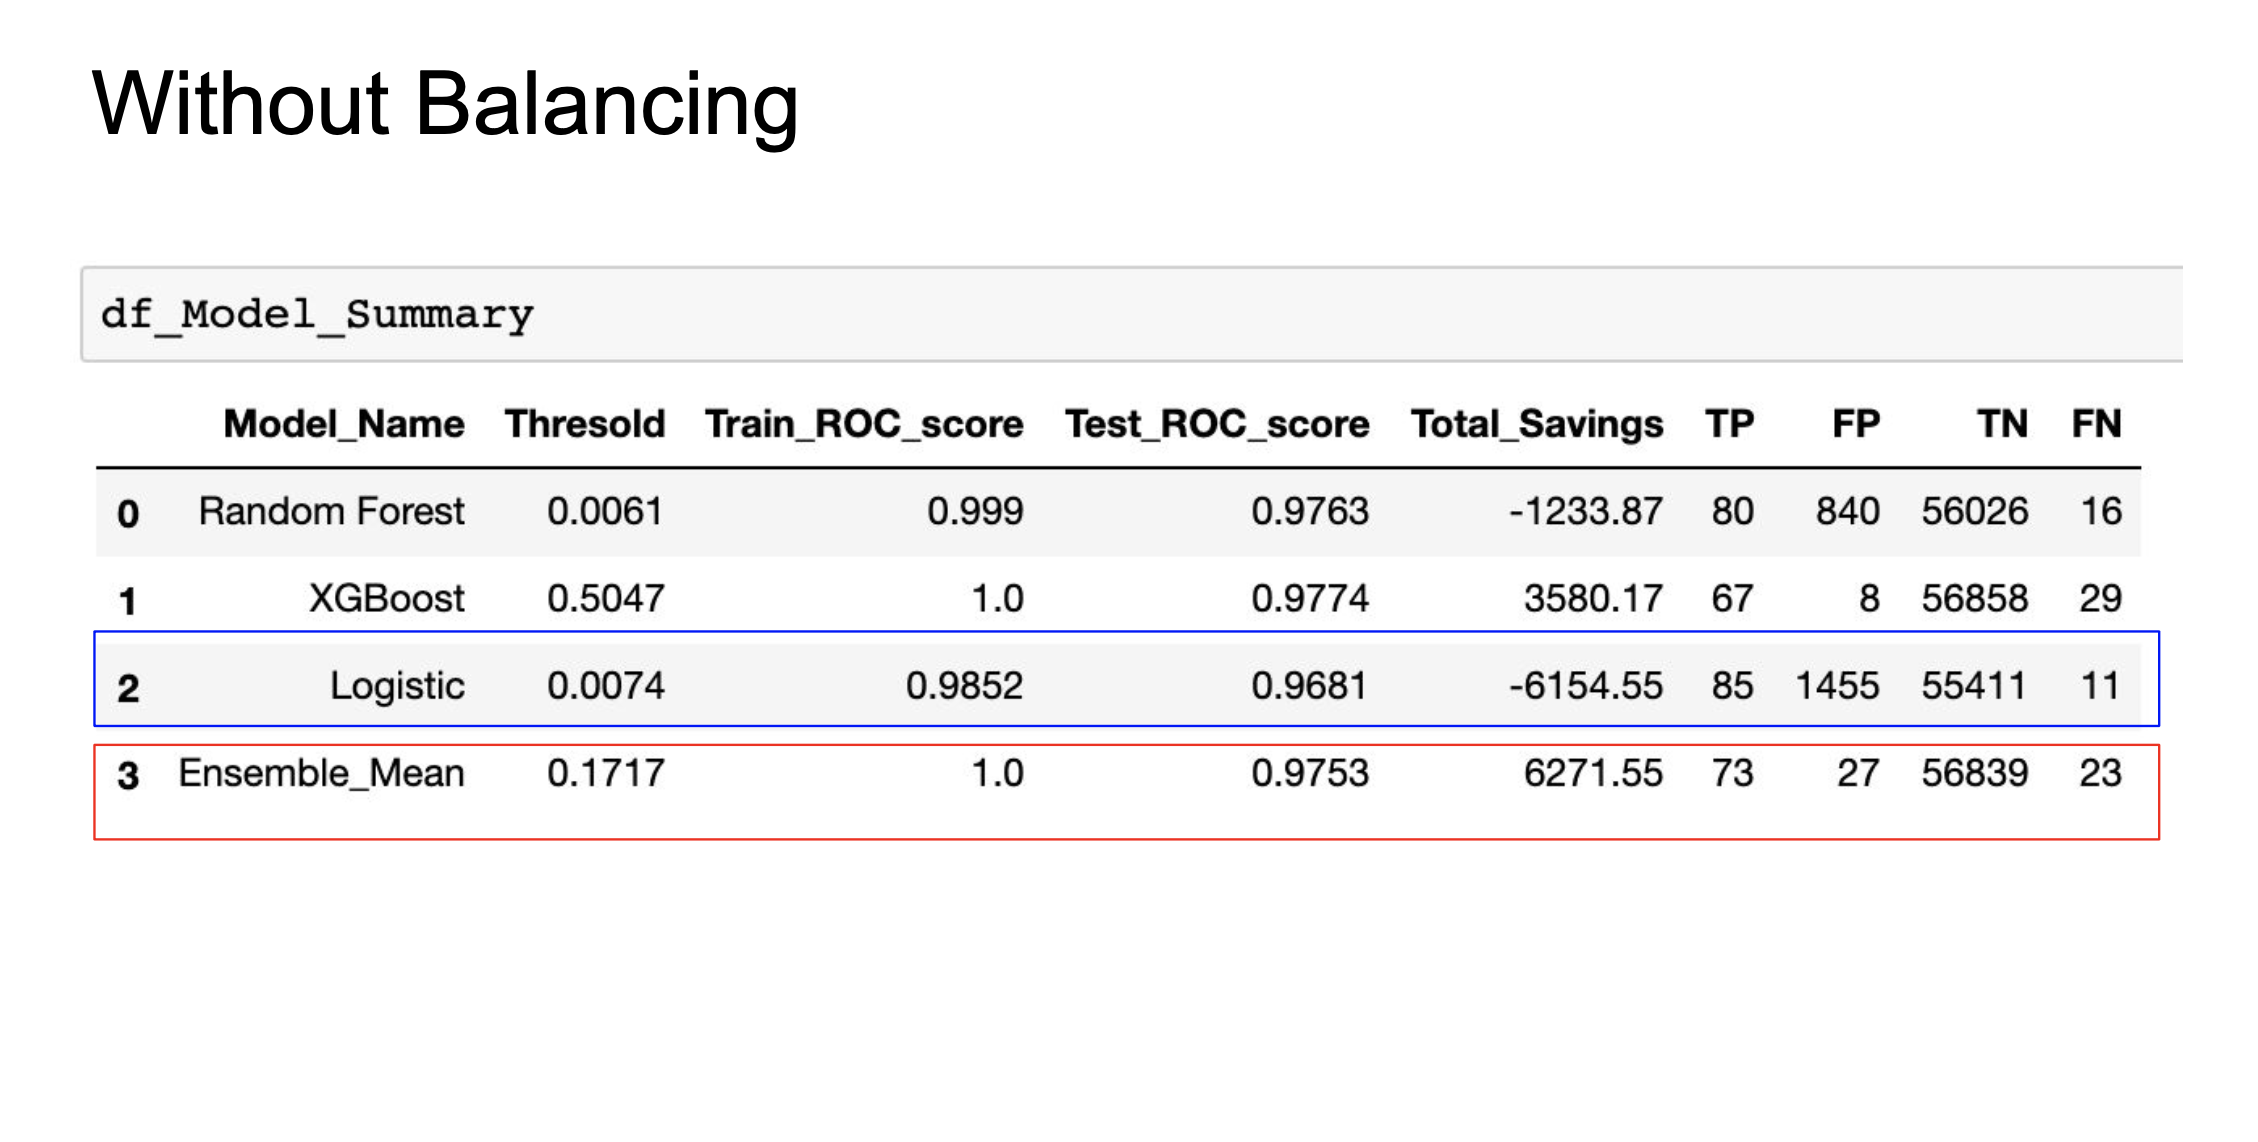

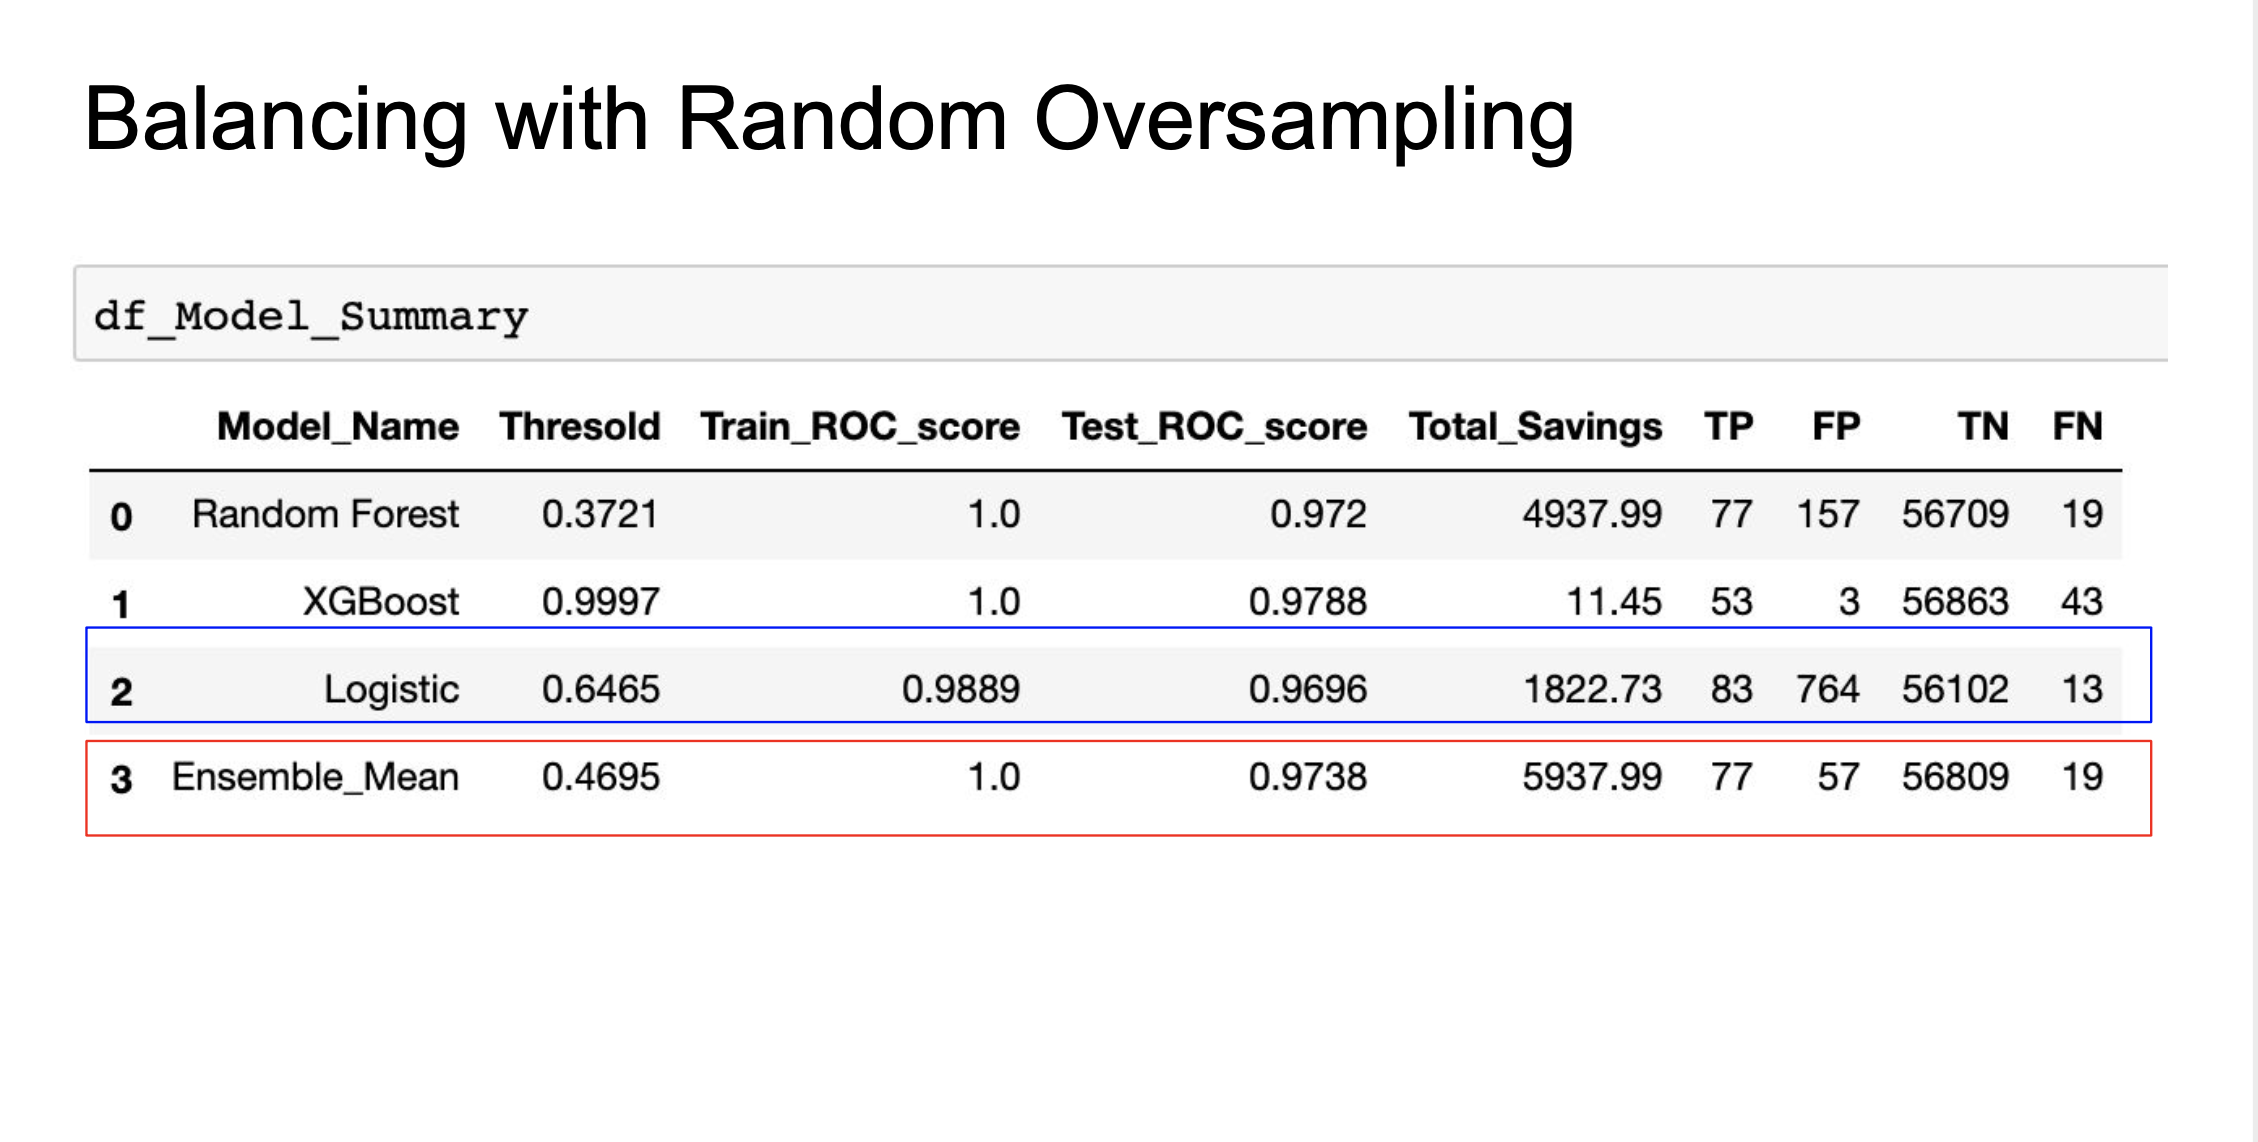

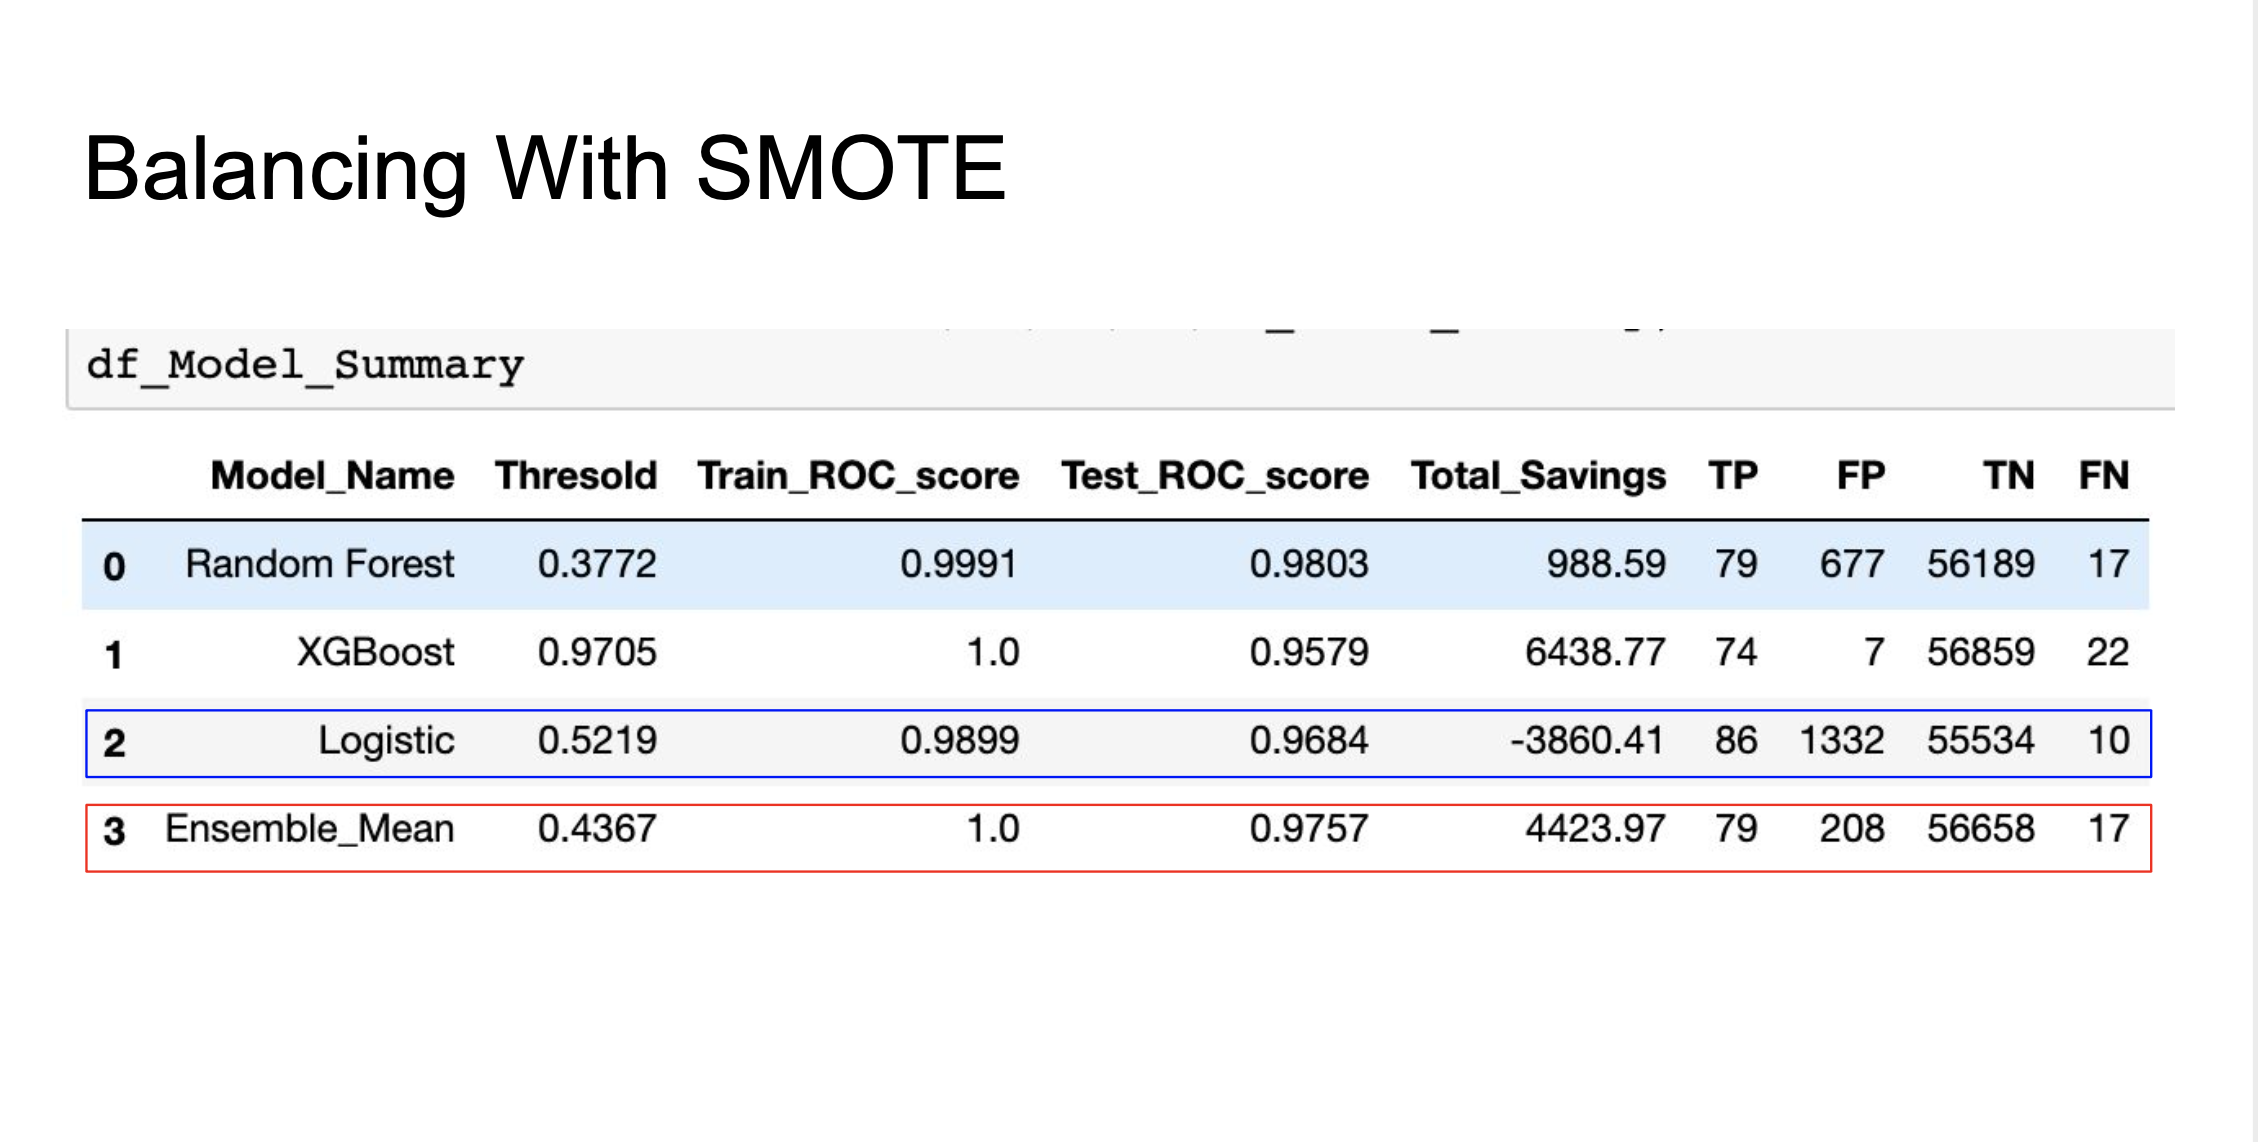

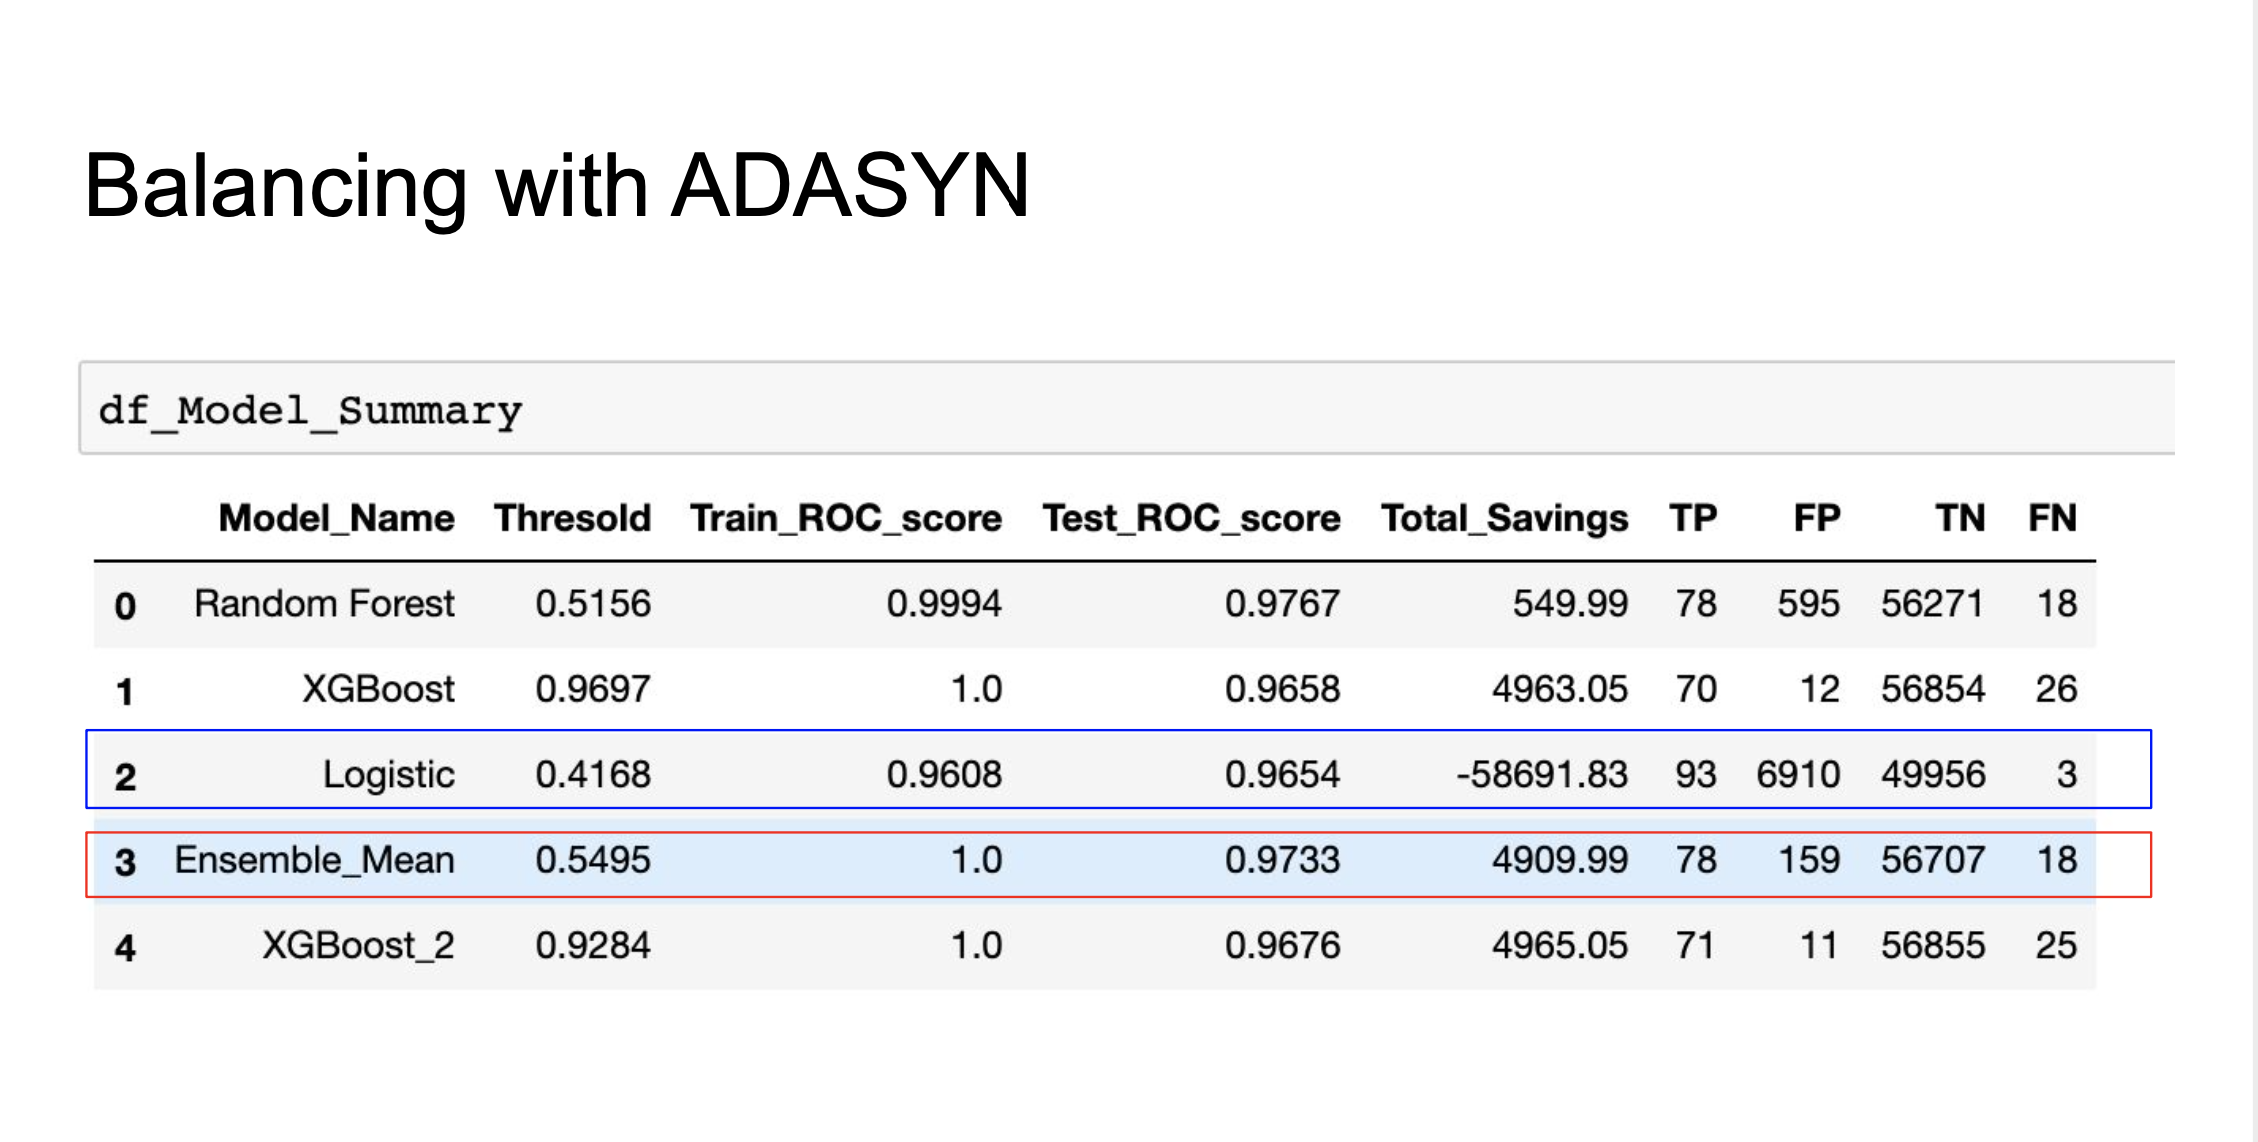

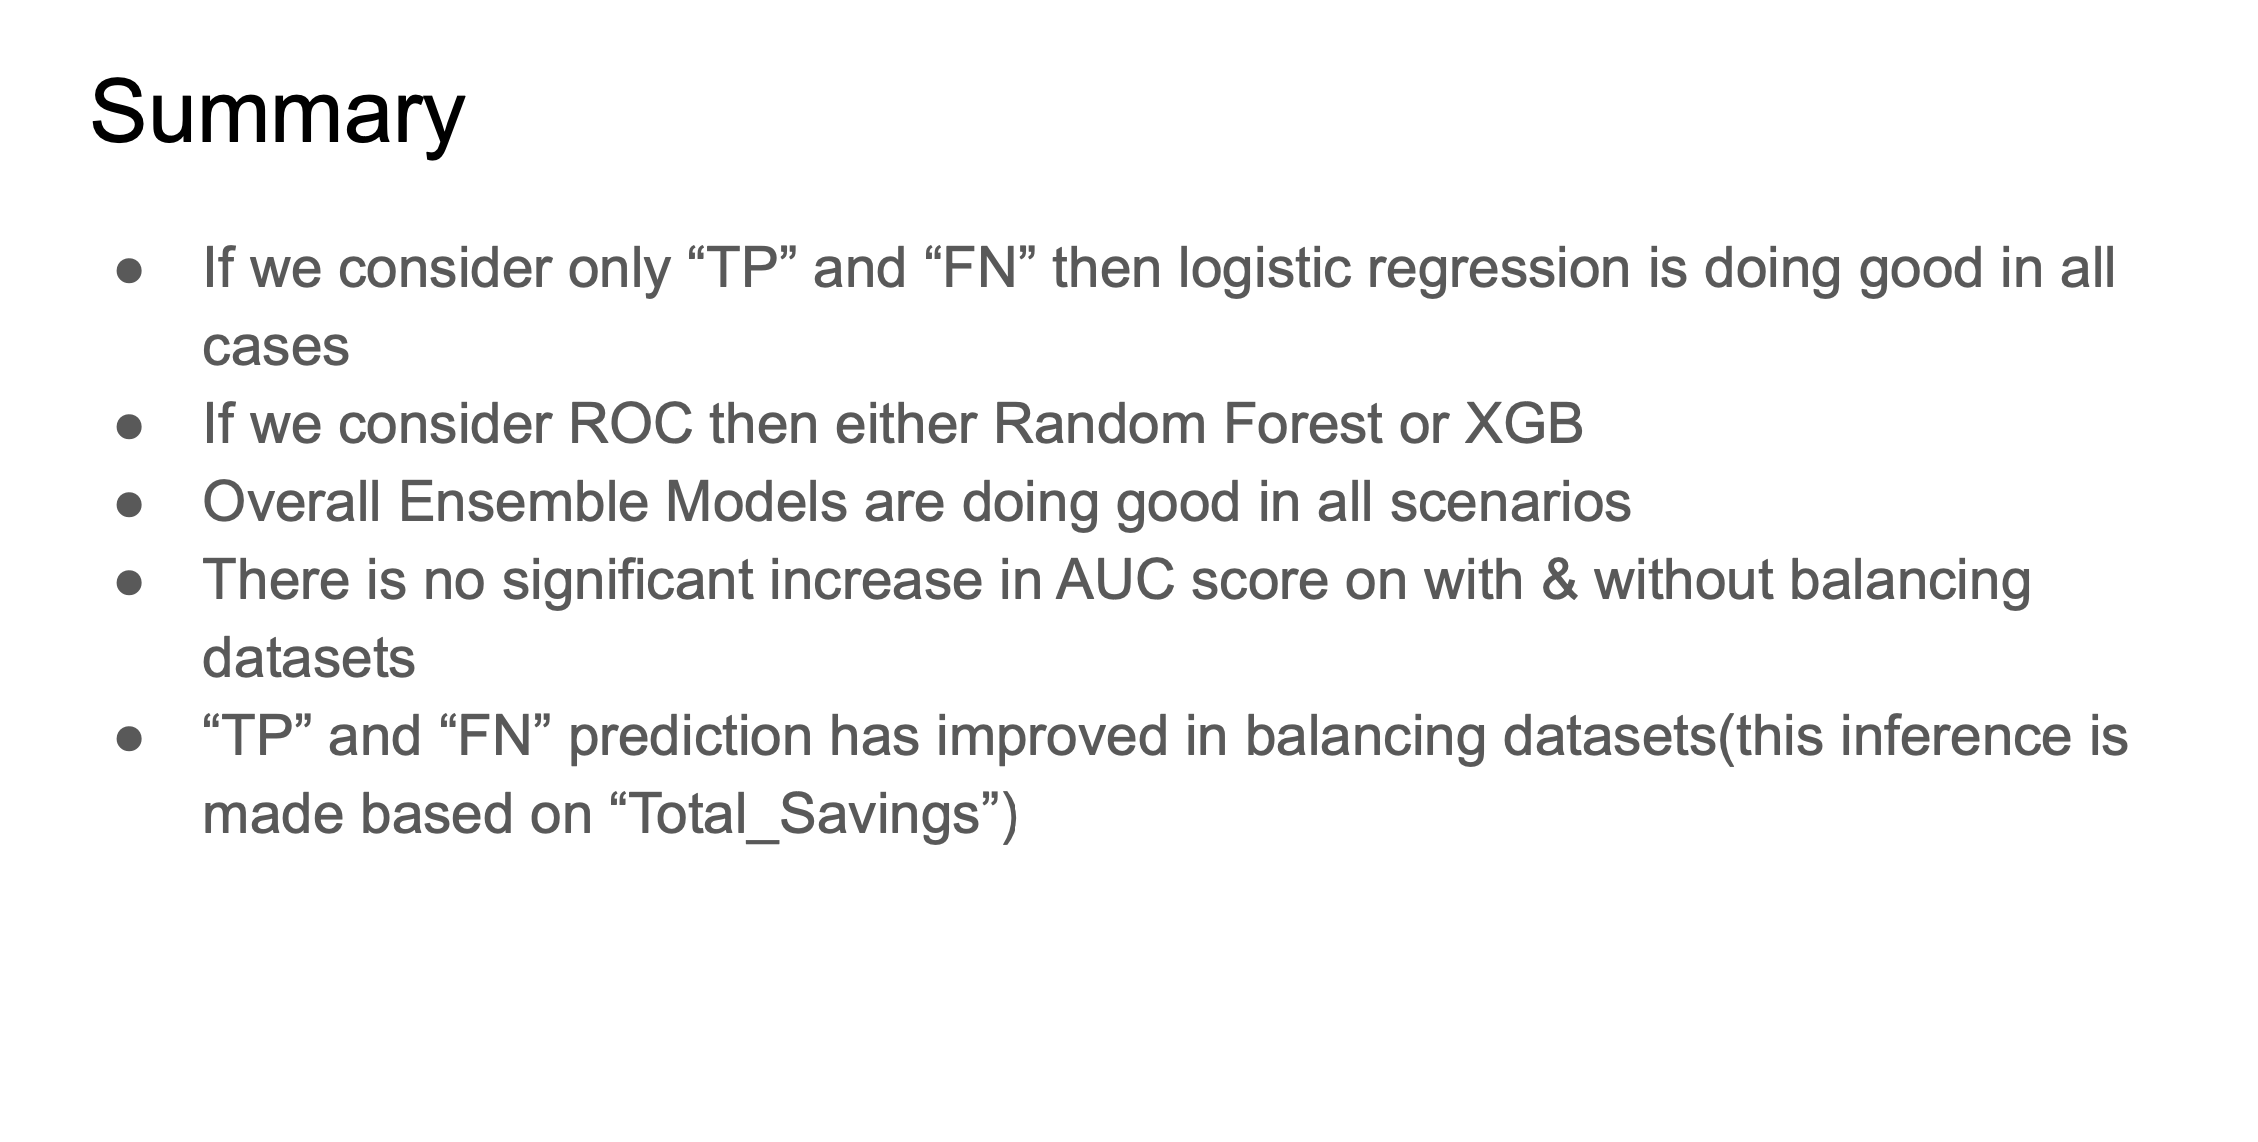

<br>